<a href="https://colab.research.google.com/github/vuchicago/Python/blob/master/MSA_Invest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####MOUNT DRIVE
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
###################### INSTALL TENSORFLOW 2.0 ##############################
!pip install tensorflow==2.0.0b1


     |████████████████████████████████| 87.9MB 51kB/s 
     |████████████████████████████████| 3.1MB 56.4MB/s 
     |████████████████████████████████| 501kB 51.1MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [3]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'2.0.0-beta1'

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime as dt

base_dir="/content/gdrive/My Drive/Python/MSA_Invest"
msa_dir=os.path.join(base_dir,"CAGDP11")
grad_boost_img=os.path.join(base_dir,"Gradient_boost_img")
LSTM_img=os.path.join(base_dir,"LSTM_img")
deep_learning_img=os.path.join(base_dir,"Deep_learning_img")
os.chdir(base_dir)
PCA="PCA_Winter_2019-20_State_Forecast.xlsx"

PCA_sheet=pd.ExcelFile(PCA)
PCA_sheet.sheet_names ##List of all the sheets within excel file

#########################################################################################


['Output',
 'Res',
 'West North Central',
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'East North Central',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'East South Central',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'Middle Atlantic',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'Pacific',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'South Atlantic',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'West South Central',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [0]:
sheet_keep=[
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [6]:
idx=0
df_pca=pd.DataFrame()
for states in sheet_keep:
  df=pd.read_excel(PCA,sheet_name=states,header=1)
  keep_indices=[4,7,11,18,21,29,32,36,40,48,51,53,56,61,62,63]
  df=df.iloc[keep_indices,:]
  df=df.T
  df=df.rename(columns=df.iloc[0]).drop(df.index[0])
  df.insert(loc=idx, column='State', value=states)
  df=df.rename(columns={"States":"State","- Unemployment Rate":"Unemployment Rate","Total Portland Cement ":"Total Portland Cement","Cement Per Capita ":"Cement Per Capita"})
  df_pca=pd.concat([df_pca,df],axis=0,sort=True)

df_pca.head()

- Unemployment Rate, %  ... Unemployment Rate (%)
2000                    NaN  ...                   NaN
2001                    NaN  ...             0.0333213
2002                    NaN  ...             0.0399316
2003                    NaN  ...             0.0449228
2004                    NaN  ...             0.0449686

[5 rows x 19 columns]

In [0]:
os.chdir(base_dir)
BED="CAGDP11__ALL_AREAS_2002_2018.csv"
df_bed=pd.read_csv(BED, encoding='latin-1')
column_keep=["MSA","State","Description_fixed", "2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017',"2018"]
df_bed=df_bed[column_keep][(pd.notna(df_bed["MSA"]))& (df_bed["MSA"]!='0')] ##get rid of NA's from geoname column

df_bed.head()

MSA State  ...   2017   2018
10846  Dover, DE    DE  ...   -0.5    1.2
10847  Dover, DE    DE  ...  -0.66      1
10848  Dover, DE    DE  ...   0.16  -0.11
10849  Dover, DE    DE  ...      0      0
10850  Dover, DE    DE  ...    (D)  -0.15

[5 rows x 20 columns]

In [0]:
df_bed=df_bed.melt(["MSA","State","Description_fixed"],var_name="Year",value_name="Value") ###Turns dataset into a flat file.  Each year column (2002-2018) unpivots into 1 column named 'Year'
df_bed["Value"]=df_bed["Value"].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan).astype(float)
df_bed=df_bed.groupby(["MSA","State","Description_fixed","Year"]).mean().reset_index()
df_bed.head()


MSA State                Description_fixed  Year     Value
0  Abilene, TX    TX  Accommodation and food services  2002 -0.116667
1  Abilene, TX    TX  Accommodation and food services  2003 -0.053333
2  Abilene, TX    TX  Accommodation and food services  2004 -0.136667
3  Abilene, TX    TX  Accommodation and food services  2005 -0.046667
4  Abilene, TX    TX  Accommodation and food services  2006 -0.010000

In [0]:
df_bed_piv=pd.pivot_table(df_bed,index=["MSA","State","Year"],columns="Description_fixed",values="Value",aggfunc=np.mean) #Re-pivots data where the description columns creates multiple columns bbased on grouping
df_bed_piv.head()

Description_fixed       Accommodation and food services  ...  Wholesale trade
MSA         State Year                                   ...                 
Abilene, TX TX    2002                        -0.116667  ...         0.383333
                  2003                        -0.053333  ...         0.583333
                  2004                        -0.136667  ...         0.976667
                  2005                        -0.046667  ...        -0.503333
                  2006                        -0.010000  ...         0.536667

[5 rows x 34 columns]

In [0]:
df_bed_piv.to_csv("df_bed_piv.csv")
df_pca.to_csv("df_pca.csv")


In [7]:
####################################################################################
import pandas as pd
import numpy as np


df_bed_draft=pd.read_csv("df_bed_piv.csv")
df_bed_draft.head()

MSA State  ...  Utilities  Wholesale trade
0  Abilene, TX    TX  ...   0.110000         0.383333
1  Abilene, TX    TX  ...  -0.105000         0.583333
2  Abilene, TX    TX  ...  -0.016667         0.976667
3  Abilene, TX    TX  ...   0.046667        -0.503333
4  Abilene, TX    TX  ...   0.546667         0.536667

[5 rows x 37 columns]

In [40]:
################################################ START HERE

State_acro={
'Colorado':'CO',
'Idaho':'ID',
'Montana':'MT',
'New Mexico':'NM',
'Nevada':'NV',
'Oregon':'OR',
'Utah':'UT',
'Washington':'WA',
'Wyoming':'WY',
'Iowa':'IA',
'Illinois':'IL',
'Kansas':'KS',
'Minnesota':'MN',
'Missouri':'MO',
'North Dakota':'ND',
'Nebraska':'NE',
'South Dakota':'SD',
'Wisconsin':'WI',
'Indiana':'IN',
'Kentucky':'KY',
'Michigan':'MI',
'Ohio':'OH',
'West Virginia':'WV',
'Connecticut':'CT',
'District of Columbia':'DC',
'Delaware':'DE',
'Massachusetts':'MA',
'Maryland':'MD',
'Maine':'ME',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New York':'NY',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'Virginia':'VA',
'Vermont':'VT',
'Alabama':'AL',
'Arkansas':'AR',
'Florida':'FL',
'Georgia':'GA',
'Louisiana':'LA',
'Mississippi':'MS',
'North Carolina':'NC',
'South Carolina':'SC',
'Tennessee':'TN',
'Texas':'TX',
'Oklahoma':'OK'}	


df_pca=pd.read_csv("df_pca.csv")
df_pca["State_acro"]=df_pca["State"].map(State_acro)
#df_pca=df_pca.rename(columns={"Unnamed: 0":"Year"})
df_pca.columns
normal_col=["Agricultural Cement","Commercial Cement Consumption","Commercial Construction Spending","Government Cement Consumption","Gross State Product, Real ($2012, Millions)",
            "Multi Family Permits","Public Construction Spending","Residential Cement Consumption","Residential Construction Spending","Single Family Permits","Total Construction Spending",
            "Total Portland Cement"]

keep_col=["Year",'Agricultural Cement',
       'Cement Intensity (MT/Mil$2009)', 'Cement Per Capita','Cement Per GSP (MT/Mil$2009)',
       'Commercial Cement Consumption', 'Commercial Construction Spending',
       'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits', 
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'State_acro']
df_pca=df_pca[keep_col]
df_pca=df_pca.rename(columns={"State_acro":"State"})
df_pca

Year Agricultural Cement  ... Unemployment Rate (%)  State
0     2000  147149.40318896345  ...                   NaN     IA
1     2001   79004.84769859431  ...              0.033321     IA
2     2002   115873.1995722488  ...              0.039932     IA
3     2003    185728.200635495  ...              0.044923     IA
4     2004  182451.22810265736  ...              0.044969     IA
...    ...                 ...  ...                   ...    ...
1295  2020   302290.1672969495  ...              0.034889     TX
1296  2021   302759.1416197087  ...              0.038185     TX
1297  2022   303499.5032569127  ...              0.042061     TX
1298  2023   303728.1253356687  ...              0.040975     TX
1299  2024  304871.26961635443  ...              0.039876     TX

[1300 rows x 18 columns]

In [24]:
df_dodge=pd.read_excel("Dodge Data_v2.xlsx",sheet_name="Dodge Data")
df_dodge=df_dodge[(df_dodge["Geo (MSA)"]!="Unassigned") & (df_dodge["Geo (MSA)"]!=0)]
dodge_keep=["Geo (MSA)","State","Time Period","Measure"]
df_dodge=df_dodge[dodge_keep]
df_dodge=df_dodge.rename(columns={"Time Period":"Year"})
df_dodge

Geo (MSA) State  Year  Measure
0     Abilene, TX    TX  2024   509855
1     Abilene, TX    TX  2023   441132
2     Abilene, TX    TX  2022   383349
3     Abilene, TX    TX  2021   394494
4     Abilene, TX    TX  2020   390782
...           ...   ...   ...      ...
7253     Yuma, AZ    AZ  2010  1110163
7254     Yuma, AZ    AZ  2009   163972
7255     Yuma, AZ    AZ  2008   457113
7256     Yuma, AZ    AZ  2007   418017
7257     Yuma, AZ    AZ  2006   522255

[7239 rows x 4 columns]

In [47]:
#####################MERGE PCA DATA WITH DODGE DATA
df_pca_dodge=pd.merge(df_dodge,df_pca,left_on=["State","Year"],right_on=["State","Year"],how='inner')
df_pca_dodge=df_pca_dodge.rename(columns={"Measure":"Dodge Starts"})
df_pca_dodge.head()

Geo (MSA)  ... Unemployment Rate (%)
0                Abilene, TX  ...              0.039876
1               Amarillo, TX  ...              0.039876
2      Austin-Round Rock, TX  ...              0.039876
3   Beaumont-Port Arthur, TX  ...              0.039876
4  Brownsville-Harlingen, TX  ...              0.039876

[5 rows x 20 columns]

In [36]:
!python3 --version

Python 3.6.9


In [98]:
df_complete=pd.merge(df_pca_dodge,df_bed_draft,how='left',left_on=["Geo (MSA)","Year"],right_on=["MSA","Year"])
df_complete=df_complete.rename(columns={'Private goods-producing industries 2/':'Private goods-producing industries','Private services-providing industries 3/':'Private services-providing industries'})
df_complete=df_complete.rename(columns={"State_x":"State"})
df_complete=df_complete.drop(["State_y"],axis=1)
df_complete_pca_test=df_complete[df_complete["Year"].astype(float)>2018] ### USED FOR PREDICTION LATER
df_complete_pca_test.to_csv("df_complete_pca_test.csv")
df_complete=df_complete[df_complete["Year"].astype(float)<2019]

df_complete.head()



Geo (MSA) State  ...  Utilities  Wholesale trade
144                Abilene, TX    TX  ...     -0.015         0.093333
145               Amarillo, TX    TX  ...      0.560         0.212500
146      Austin-Round Rock, TX    TX  ...      0.070        -0.070000
147   Beaumont-Port Arthur, TX    TX  ...      3.860         0.090000
148  Brownsville-Harlingen, TX    TX  ...     -0.030         0.100000

[5 rows x 55 columns]

In [0]:
df_pca_test.shape

(594, 17)

In [0]:
###### KEEP THESE COLUMNS FROM DF_COMPLETE
var_pca= ["Dodge Starts",
          'Cement Intensity (MT/Mil$2009)', ####PCA DATA
          'Cement Per Capita',
          'Cement Per GSP (MT/Mil$2009)',
          'Commercial Cement Consumption', 
          'Commercial Construction Spending',
          'Government Cement Consumption',
          'Gross State Product, Real ($2012, Millions)', 
          'Multi Family Permits',
          'Public Construction Spending', 
          'Residential Cement Consumption',
          'Residential Construction Spending', 
          'Single Family Permits', 
          'Total Construction Spending', 
          'Total Portland Cement',
          'Unemployment Rate (%)'
          ] 

var_bed=  ['Accommodation and food services', #####BUREAU OF ECONOMIC DEVELOPMENT DATA
          'Administrative and support and waste management and remediation services',
          'Agriculture, forestry, fishing and hunting',
          'All industry total (percent change)',
          'Arts, entertainment, and recreation',
          'Arts, entertainment, recreation, accommodation, and food services',
          'Construction', 
          'Durable goods manufacturing', 
          'Educational services',
          'Educational services, health care, and social assistance',
          'Finance and insurance',
          'Finance, insurance, real estate, rental, and leasing',
          'Government and government enterprises',
          'Health care and social assistance', 
          'Information',
          'Management of companies and enterprises', 
          'Manufacturing',
          'Manufacturing and information',
          'Mining, quarrying, and oil and gas extraction',
          'Natural resources and mining', 
          'Nondurable goods manufacturing',
          'Other services (except government and government enterprises)',
          'Private goods-producing industries', 
          'Private industries',
          'Private services-providing industries',
          'Professional and business services',
          'Professional, scientific, and technical services',
          'Real estate and rental and leasing', 
          'Retail trade', 'Trade',
          'Transportation and utilities', 
          'Transportation and warehousing',
          'Utilities', 
          'Wholesale trade']
var_keep=var_pca+var_bed

In [99]:
#########################################################DON'T RUN 
var_keep_complete=["MSA","Year"]+var_keep
df_final=df_complete[var_keep_complete]
for var in var_keep:
  df_final[var]=df_final[var].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_final[var]=df_final[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_final[var]=df_final[var].ffill() ##Forward fills data if NA
  df_final[var]=df_final[var].bfill()
  df_final[var]=df_final[var].astype(float)
  df_final[var]=df_final[var]*1.0
  
df_final=df_final.replace('(D)',np.nan)

df_final.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Index(['MSA', 'Year', 'Dodge Starts', 'Cement Intensity (MT/Mil$2009)',
       'Cement Per Capita', 'Cement Per GSP (MT/Mil$2009)',
       'Commercial Cement Consumption', 'Commercial Construction Spending',
       'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits',
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'All industry total (percent change)',
       'Arts, entertainment, and recreation',
       'Arts, entertainment, recreation, accommodation, and food services',
       'Construction', 'Durable goods manufacturing', 'Educational services',
       'Educational 

In [95]:
df_final

MSA  Year  ...  Utilities  Wholesale trade
144                 Abilene, TX  2018  ...  -0.015000         0.093333
145                Amarillo, TX  2018  ...   0.560000         0.212500
146       Austin-Round Rock, TX  2018  ...   0.070000        -0.070000
147    Beaumont-Port Arthur, TX  2018  ...   3.860000         0.090000
148   Brownsville-Harlingen, TX  2018  ...  -0.030000         0.100000
...                         ...   ...  ...        ...              ...
5638            Sioux Falls, SD  2008  ...   0.110000         0.170000
5639             Rapid City, SD  2007  ...   0.176667        -0.070000
5640            Sioux Falls, SD  2007  ...   0.020000         0.220000
5641             Rapid City, SD  2006  ...  -0.030000         0.133333
5642            Sioux Falls, SD  2006  ...  -0.003333         0.797500

[3861 rows x 52 columns]

In [0]:
df_final.to_csv("df_final.csv")

In [0]:
df_complete_pca_test=pd.read_csv("df_complete_pca_test.csv")
df_final=pd.read_csv("df_final.csv")

In [81]:
df_final

Unnamed: 0                        MSA  ...  Utilities  Wholesale trade
0            144                Abilene, TX  ...  -0.015000         0.093333
1            145               Amarillo, TX  ...   0.560000         0.212500
2            146      Austin-Round Rock, TX  ...   0.070000        -0.070000
3            147   Beaumont-Port Arthur, TX  ...   3.860000         0.090000
4            148  Brownsville-Harlingen, TX  ...  -0.030000         0.100000
...          ...                        ...  ...        ...              ...
3856        5638            Sioux Falls, SD  ...   0.110000         0.170000
3857        5639             Rapid City, SD  ...   0.176667        -0.070000
3858        5640            Sioux Falls, SD  ...   0.020000         0.220000
3859        5641             Rapid City, SD  ...  -0.030000         0.133333
3860        5642            Sioux Falls, SD  ...  -0.003333         0.797500

[3861 rows x 53 columns]

Empty DataFrame
Columns: []
Index: []

In [56]:
################################# CREATE TRAINING AND VALIDATION DATASET
df_final_rand=df_final.sample(frac=1,random_state=3) ###Samples data with same random state
df_train=df_final_rand[:np.int(.8*len(df_final_rand))]
df_val=df_final_rand[np.int(.8*len(df_final_rand)):]
print("Train has {} samples; val has {} samples".format(len(df_train),len(df_val)))



#################################  CREATE TEST DATASET 
df_pca_test=df_complete_pca_test[var_pca]
for var in var_pca:
  df_pca_test[var]=df_pca_test[var].replace('g',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_pca_test[var]=df_pca_test[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_pca_test[var]=df_pca_test[var].ffill() ##Forward fills data if NA
  df_pca_test[var]=df_pca_test[var].bfill()

df_pca_test=df_pca_test.astype(float) ###CREATE PREDICTIONS


Train has 3088 samples; val has 773 samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [57]:
df_pca_test

Dodge Starts  ...  Unemployment Rate (%)
0         509855.0  ...               0.039876
1        1191168.0  ...               0.039876
2       12406757.0  ...               0.039876
3        1410725.0  ...               0.039876
4         955054.0  ...               0.039876
...            ...  ...                    ...
1777      873802.0  ...               0.033806
1778      466751.0  ...               0.032426
1779      860874.0  ...               0.032426
1780      595527.0  ...               0.028051
1781      946368.0  ...               0.028051

[1782 rows x 16 columns]

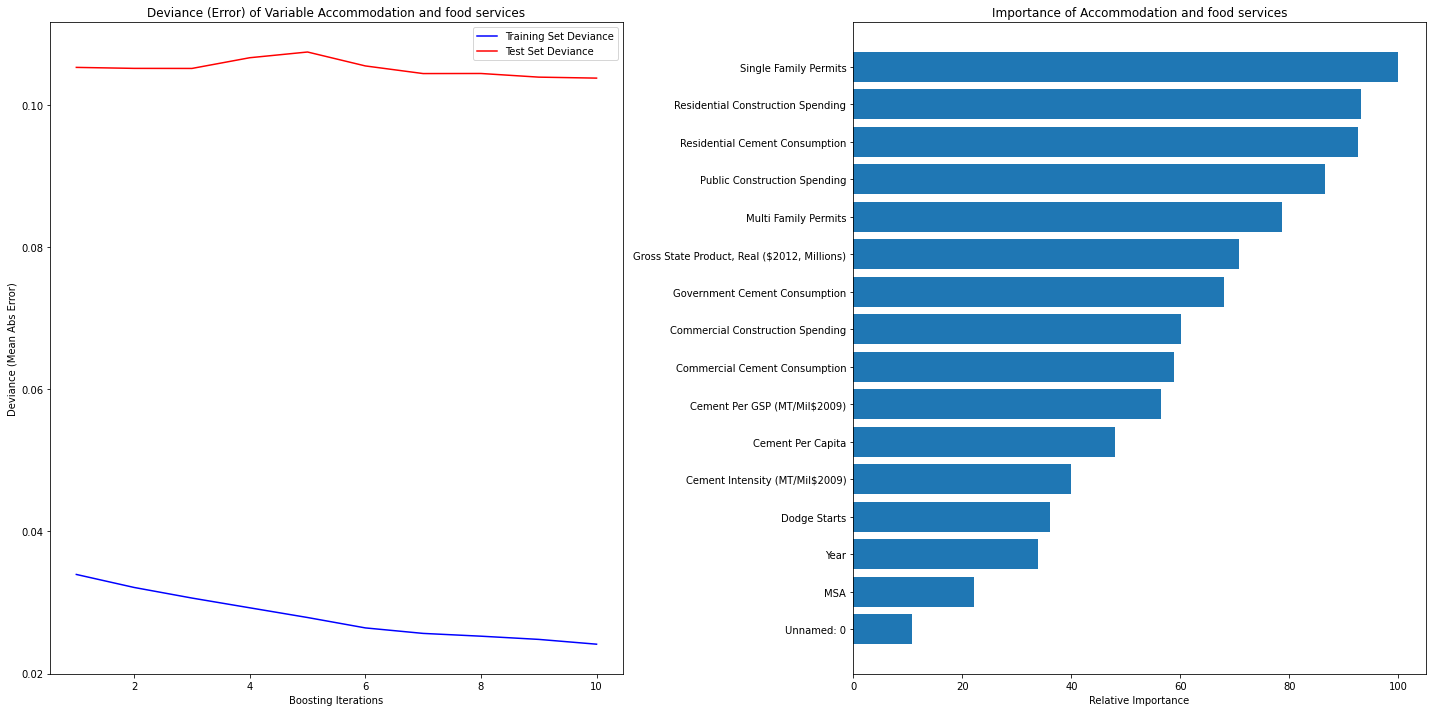

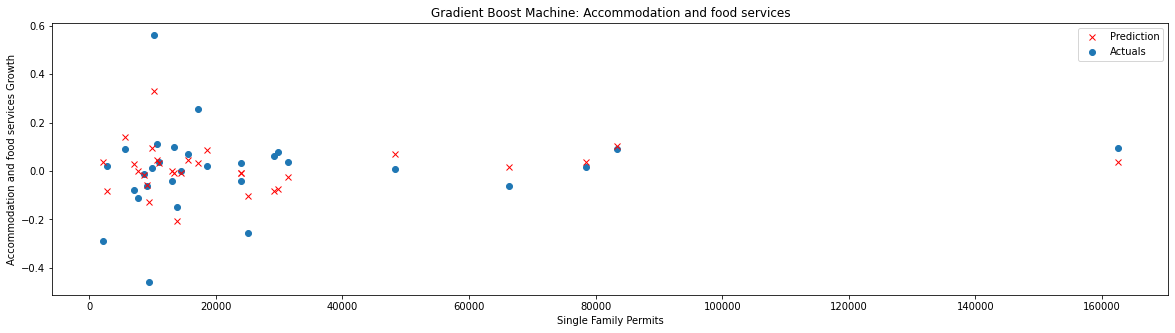

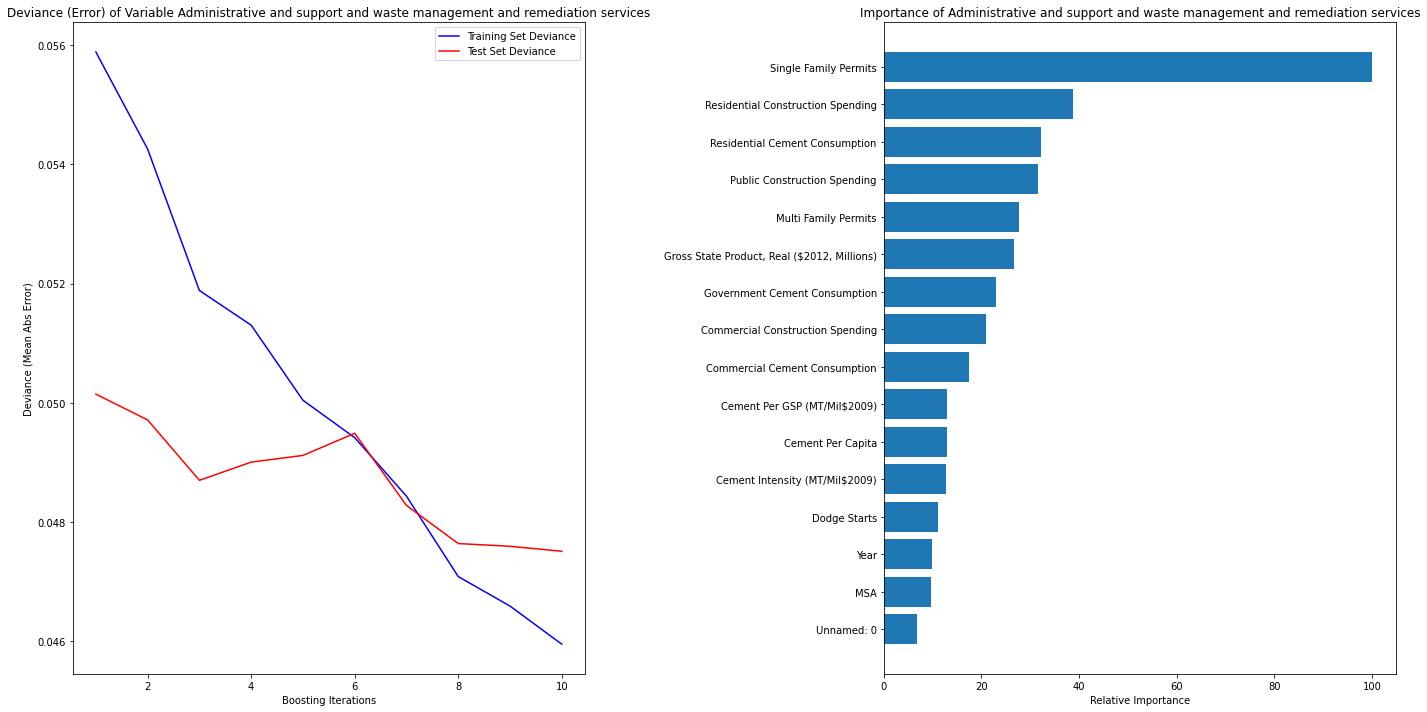

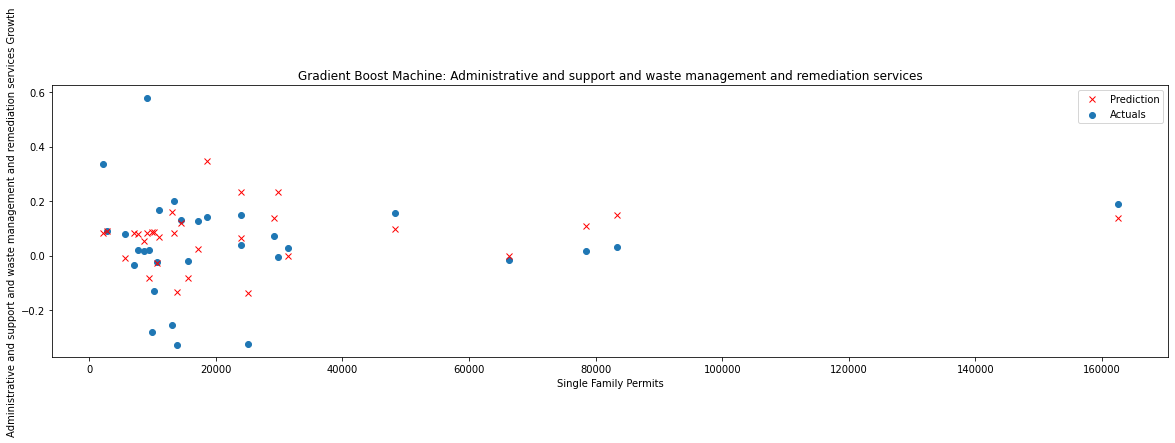

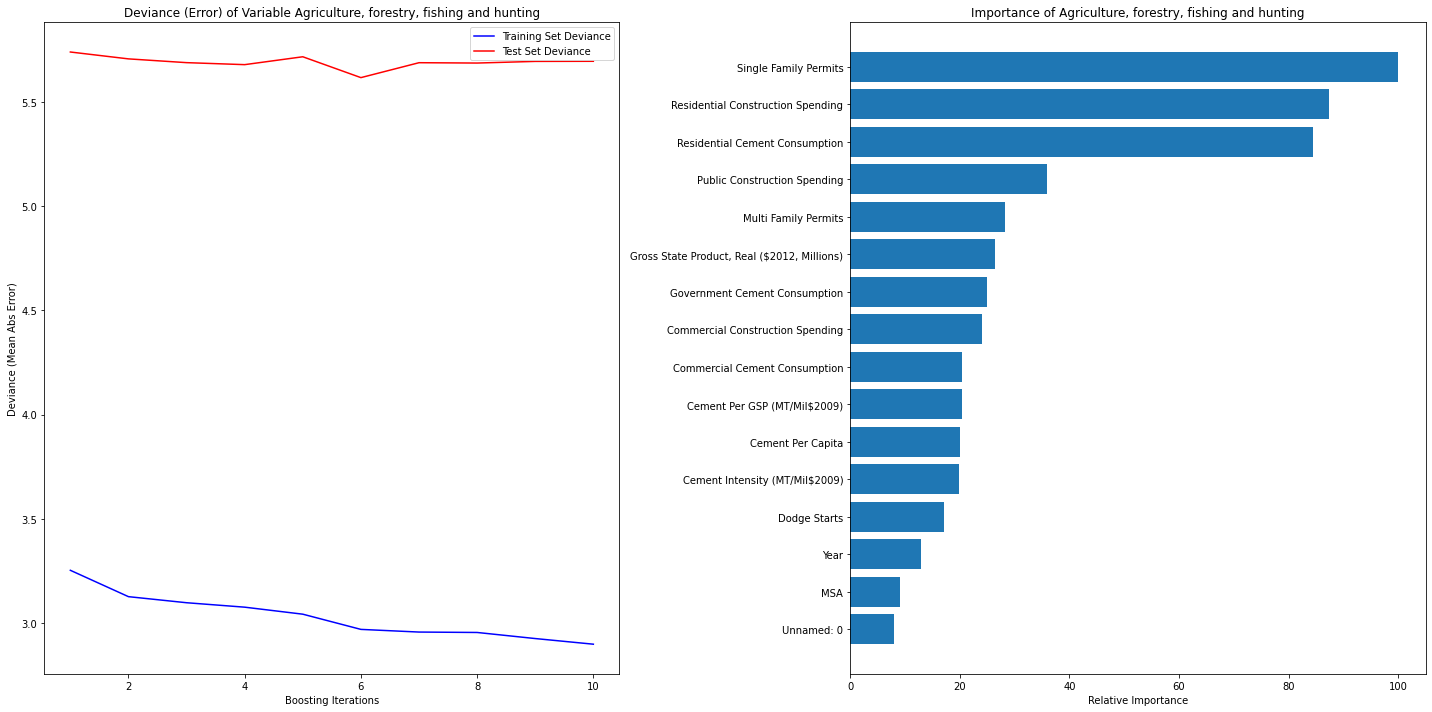

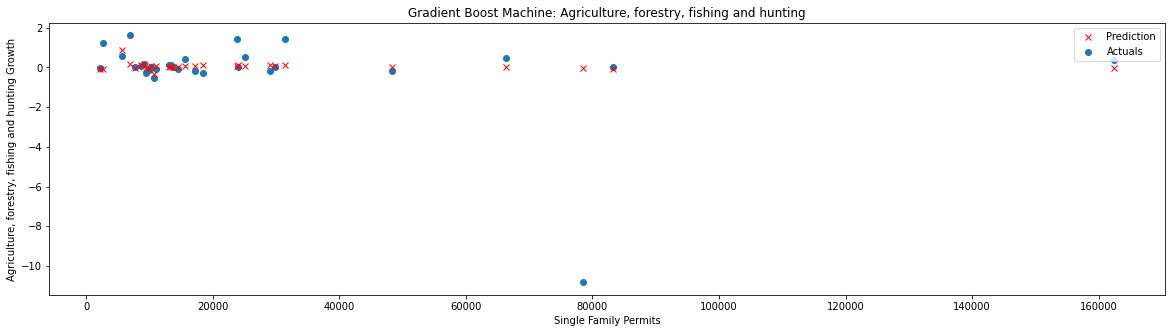

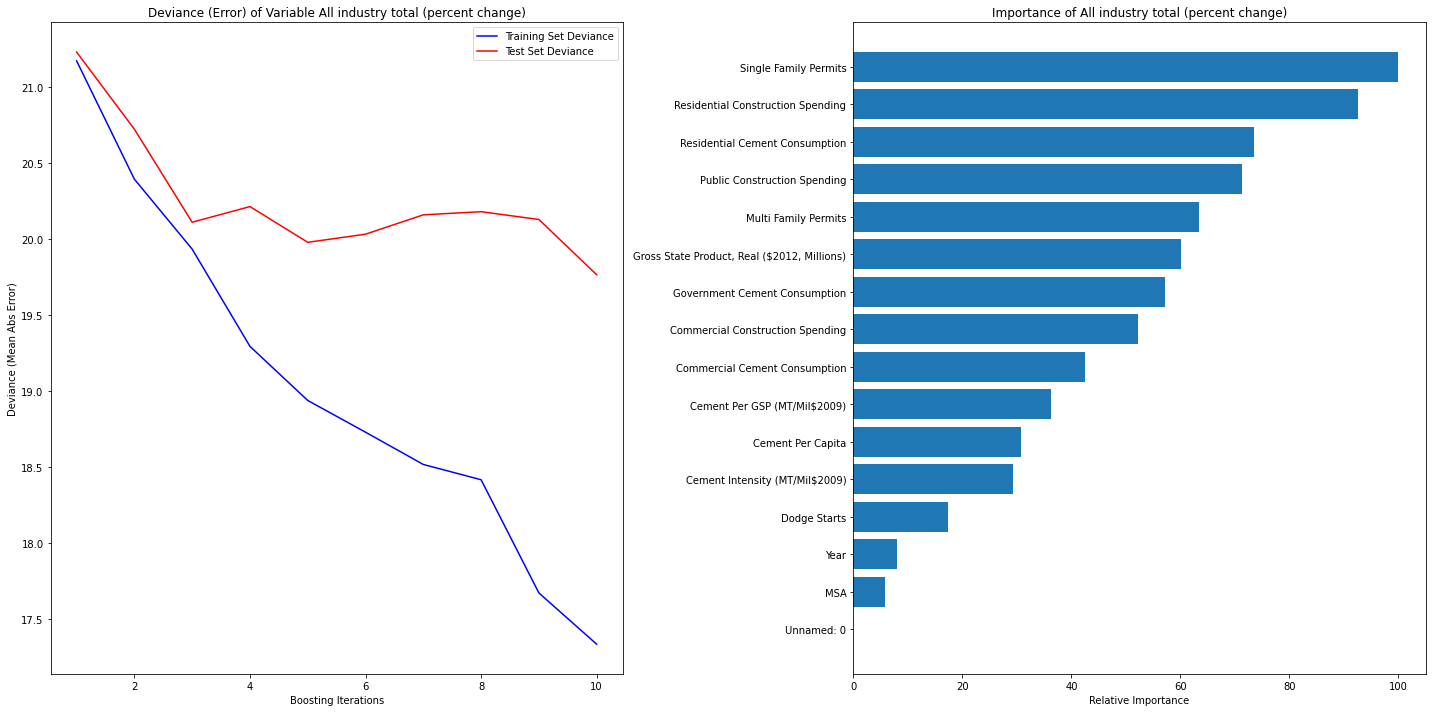

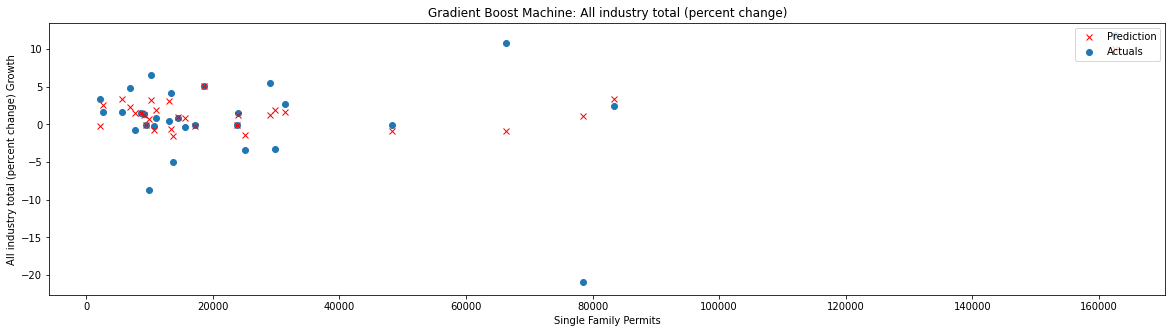

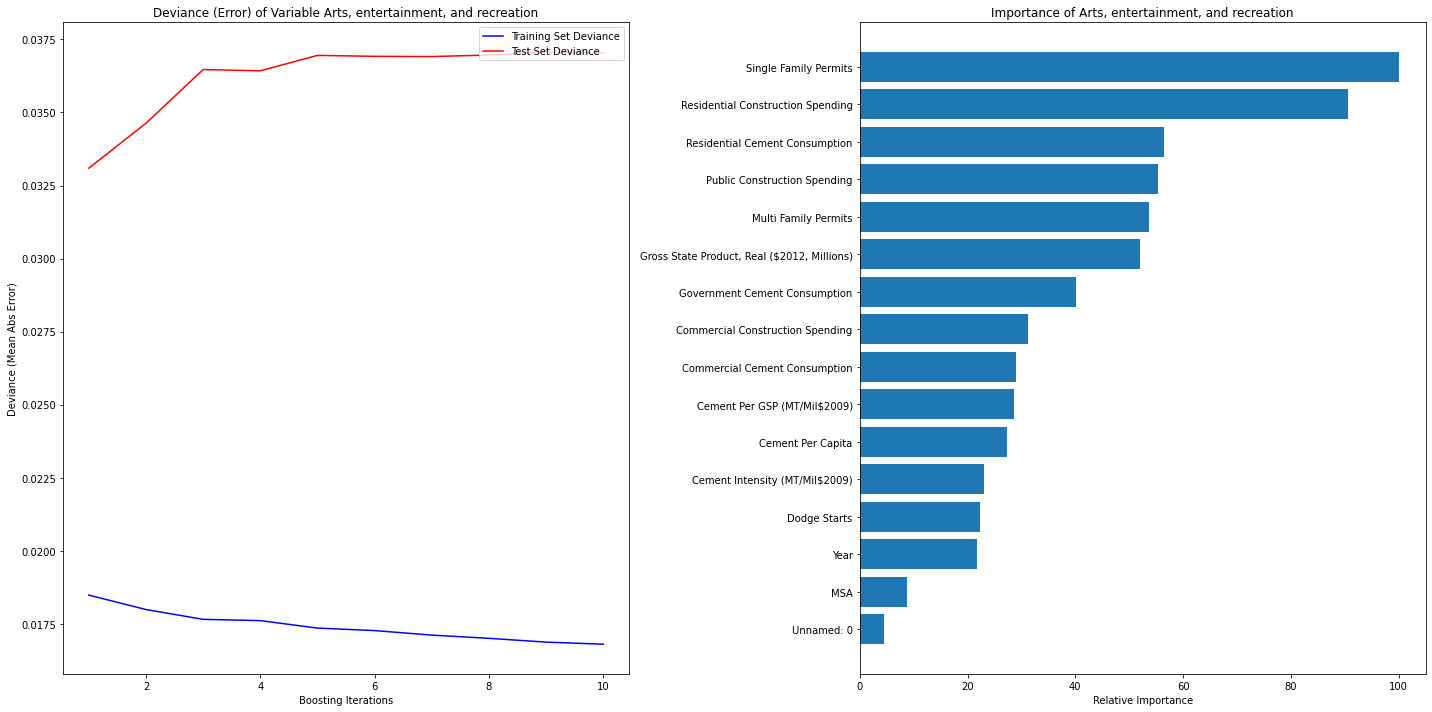

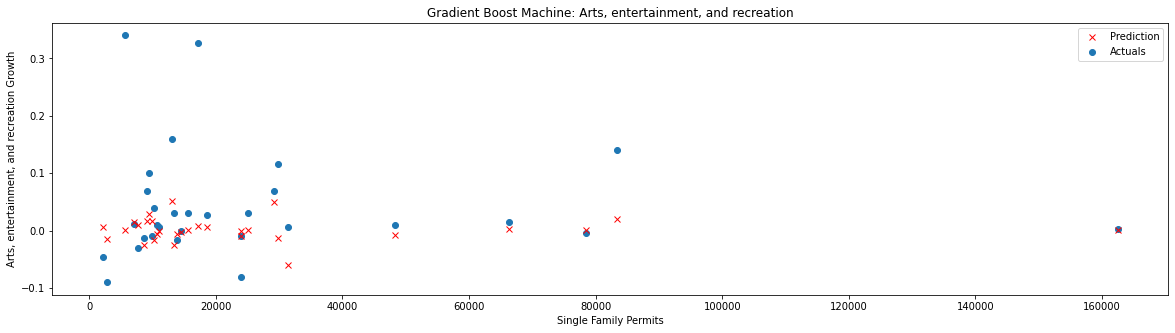

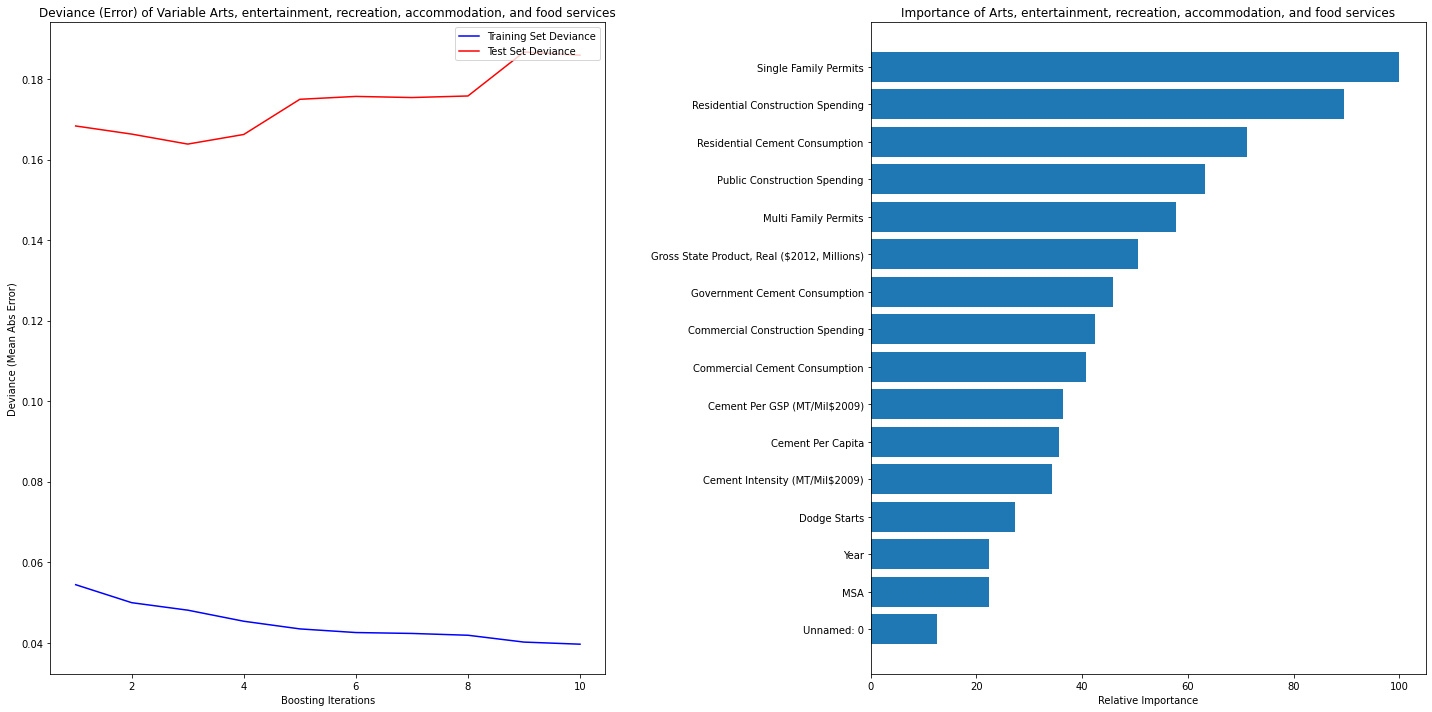

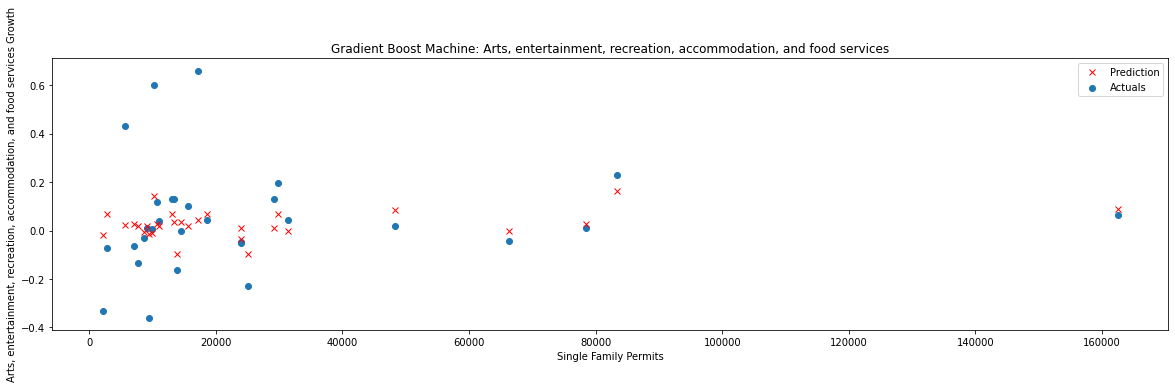

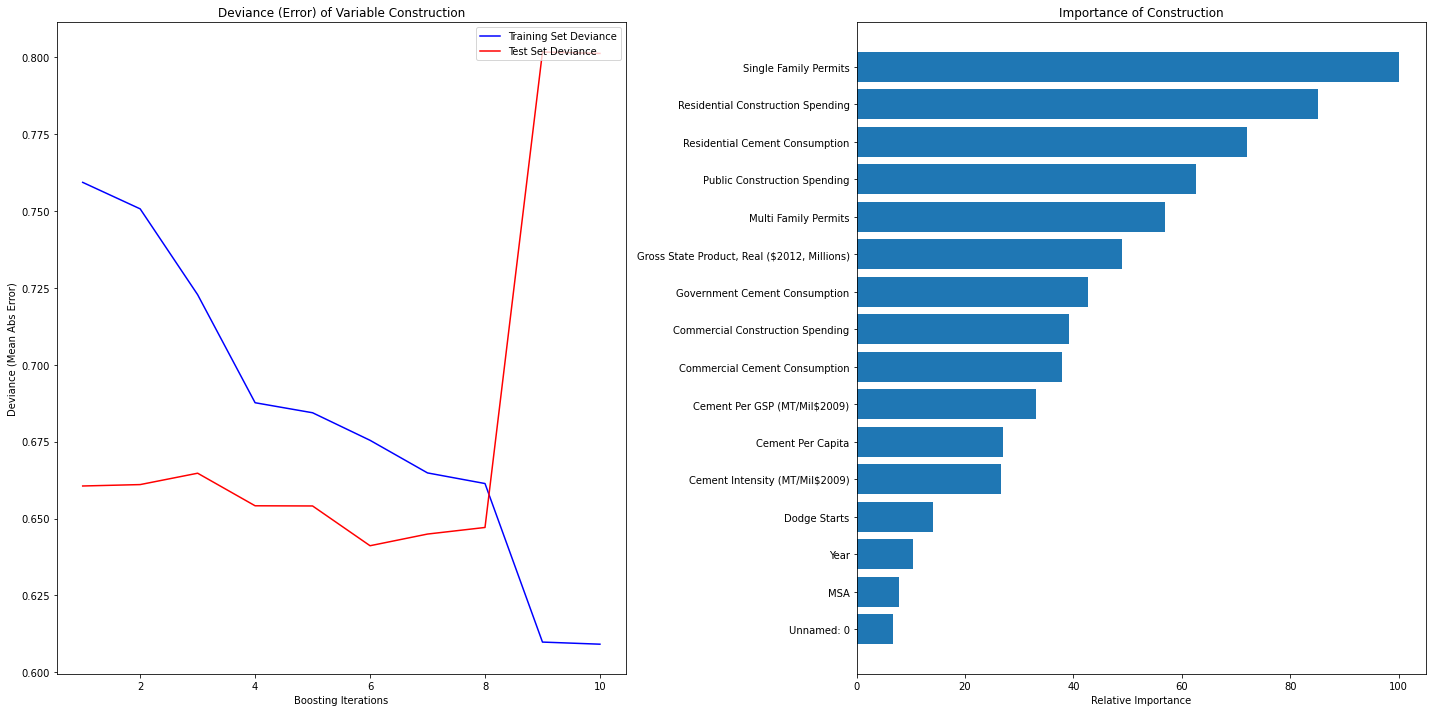

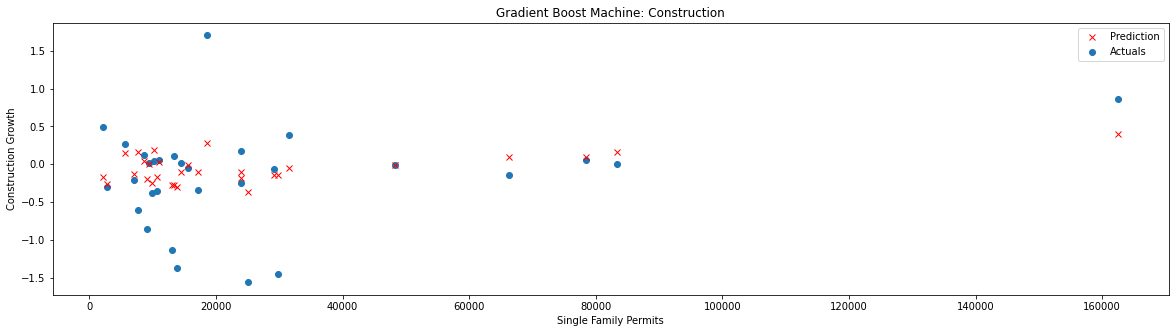

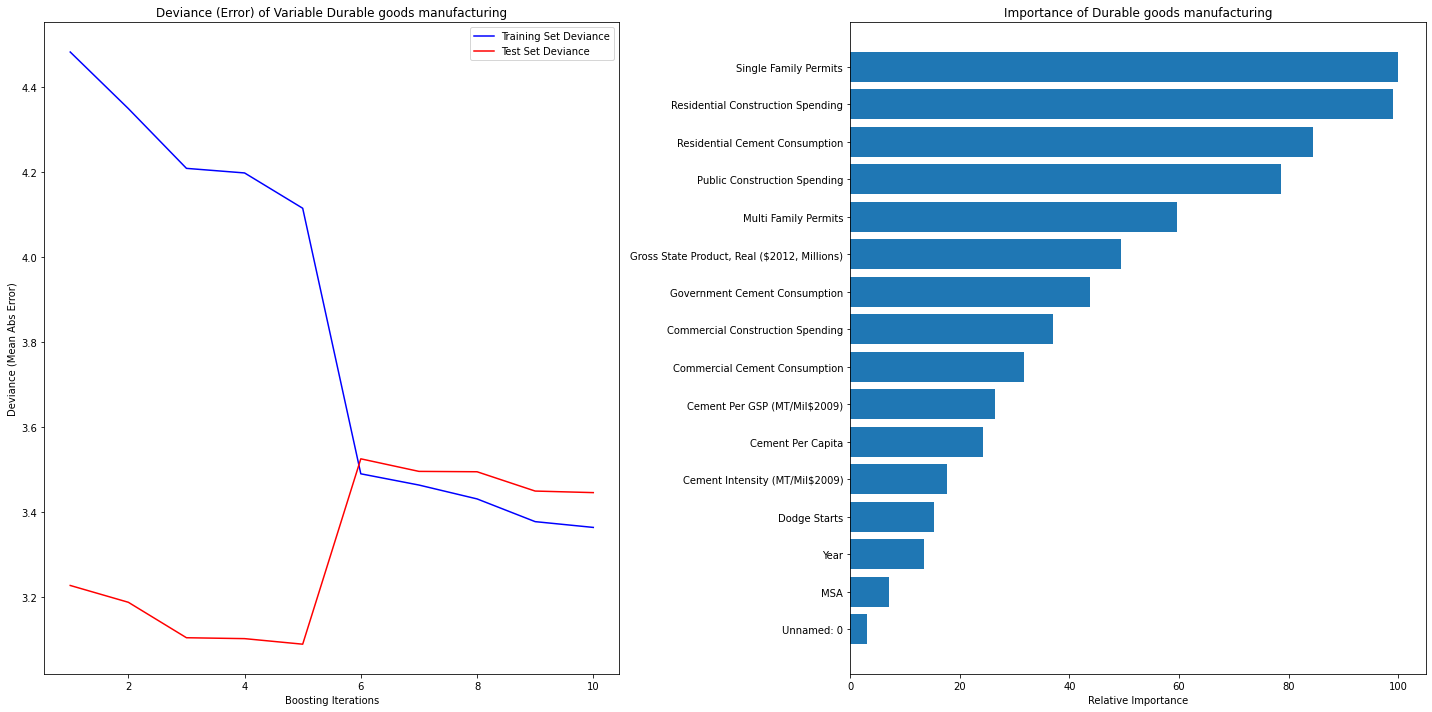

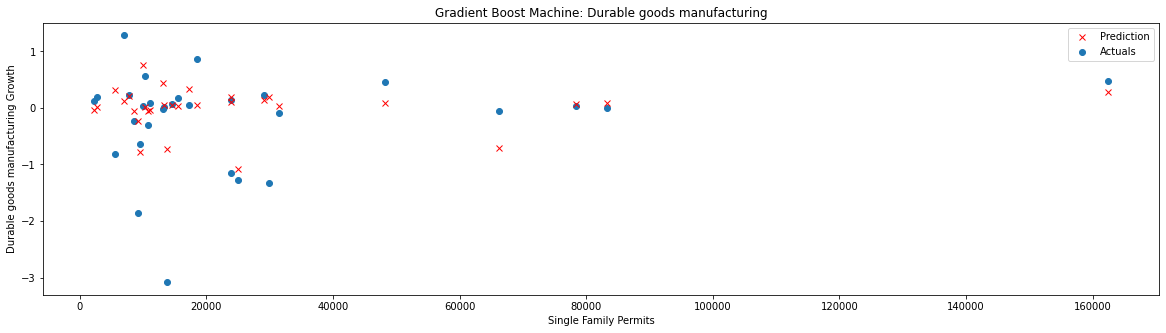

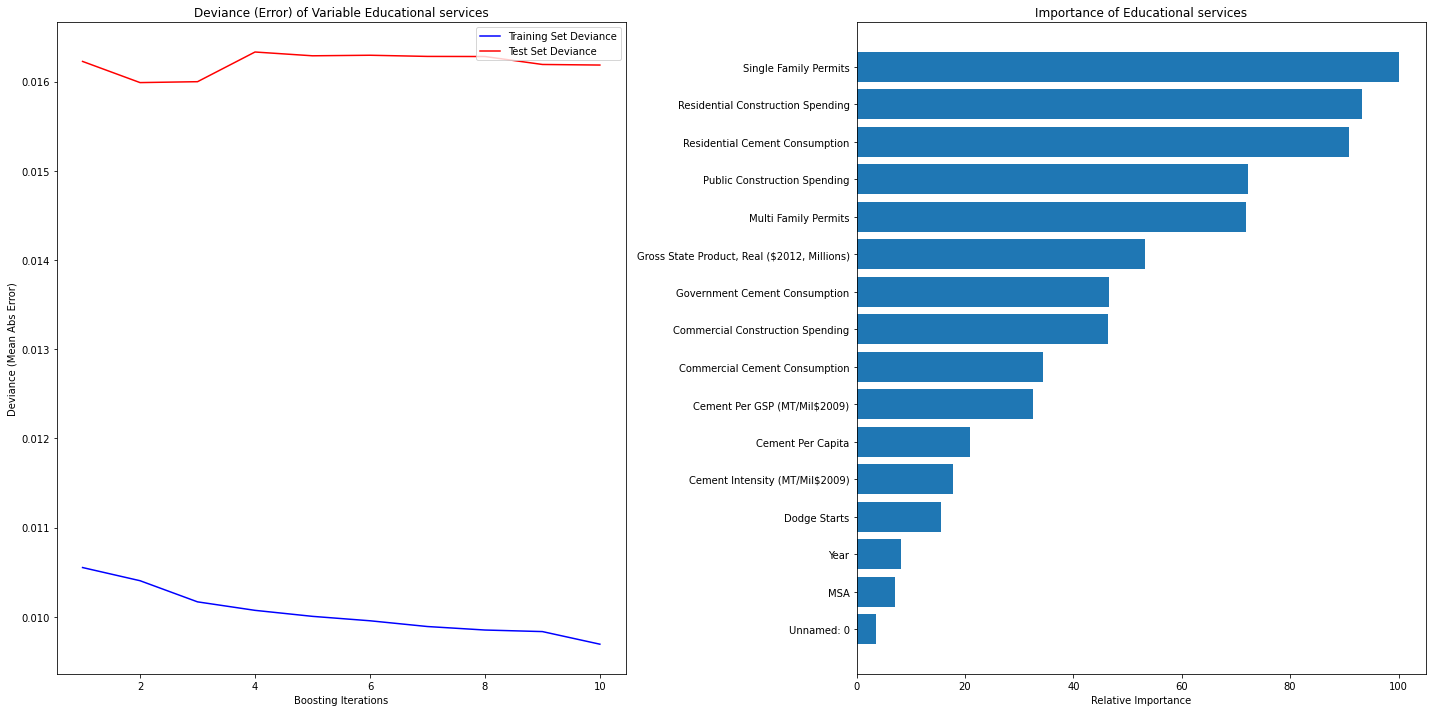

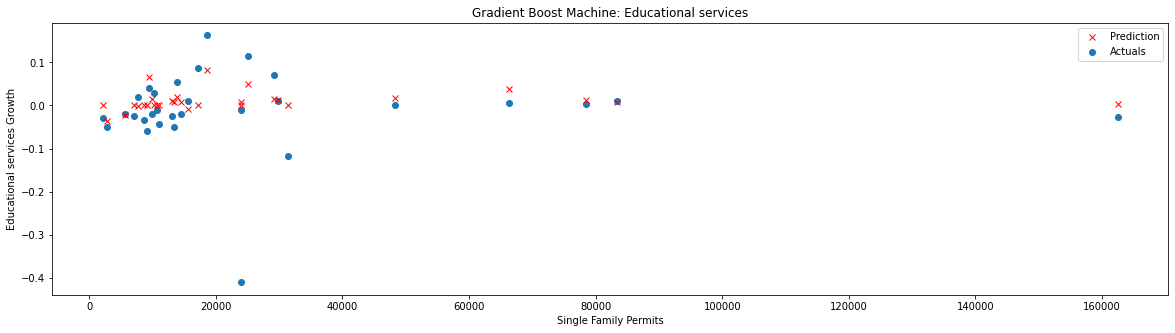

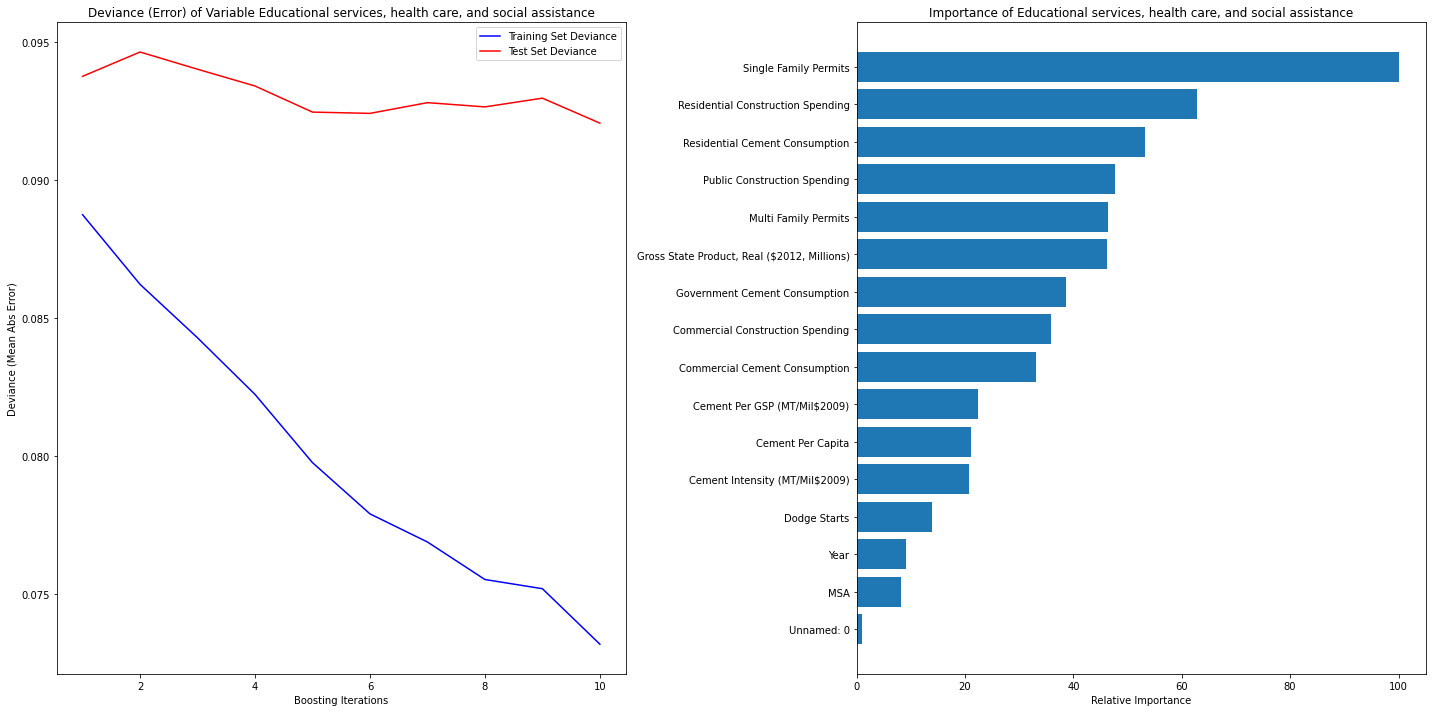

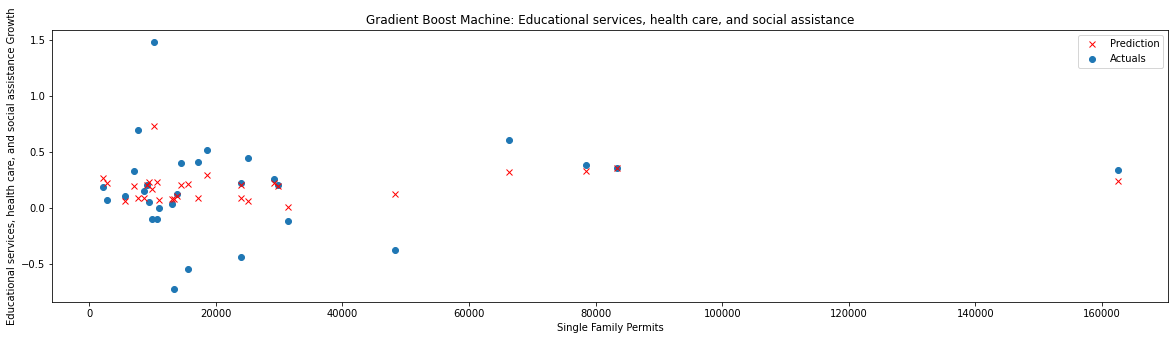

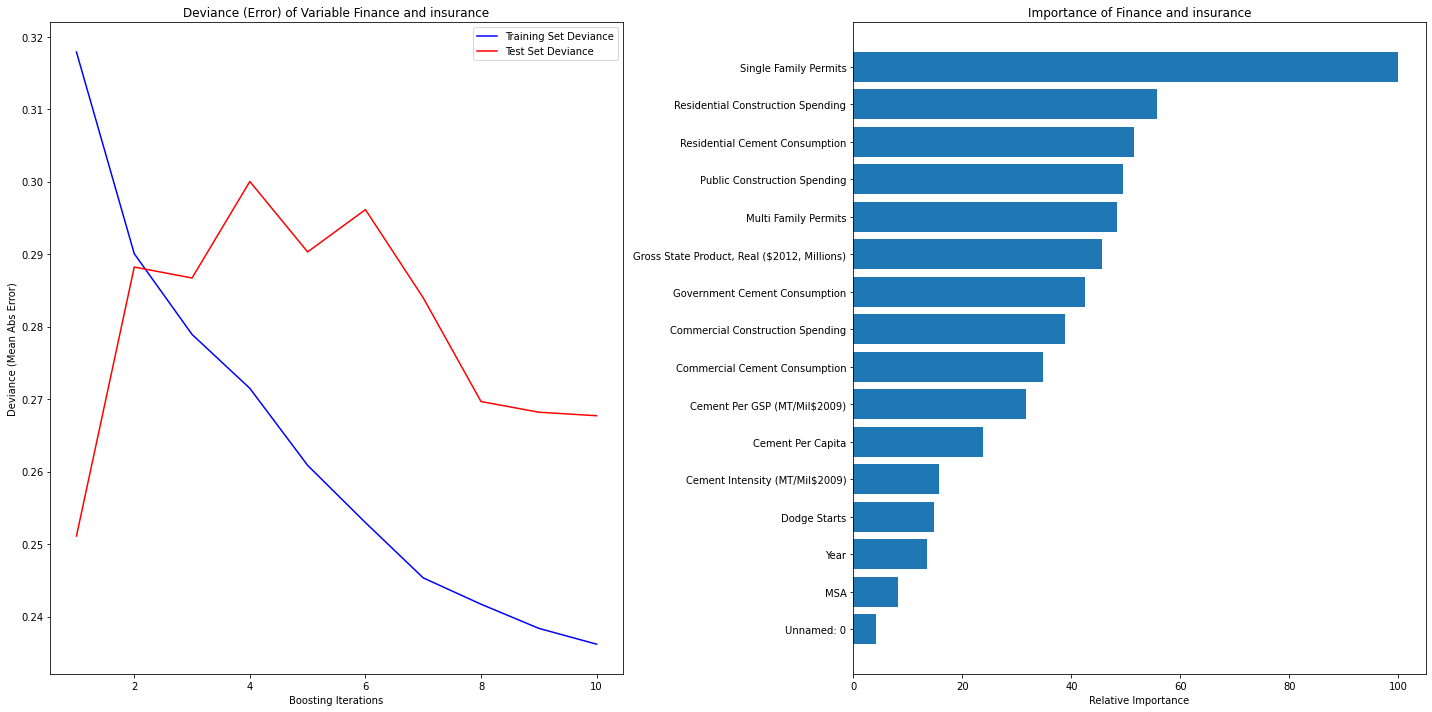

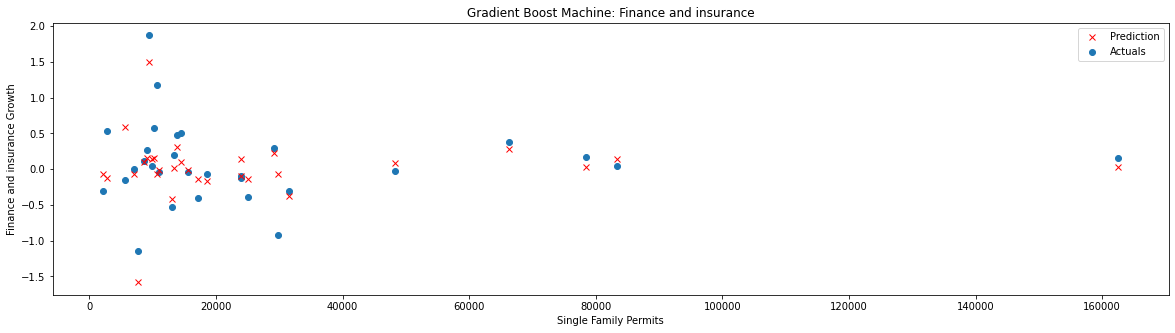

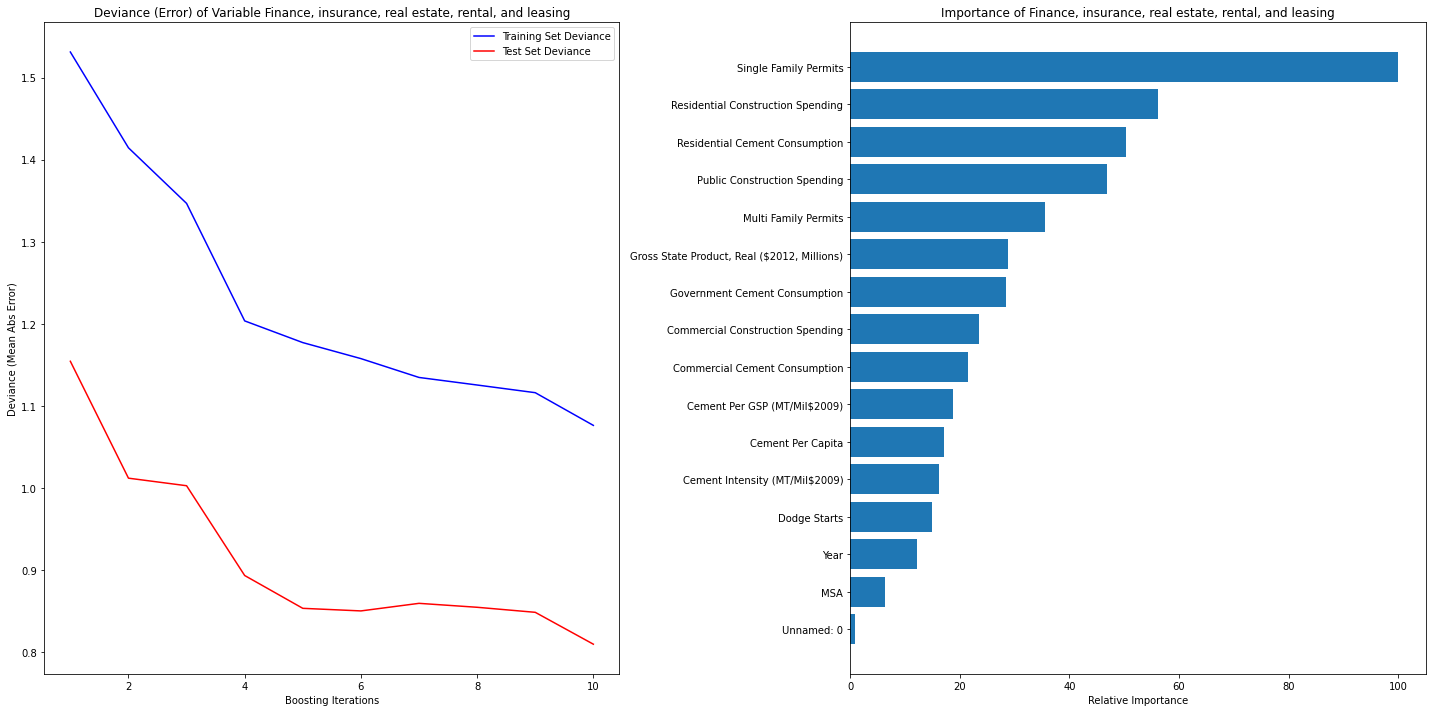

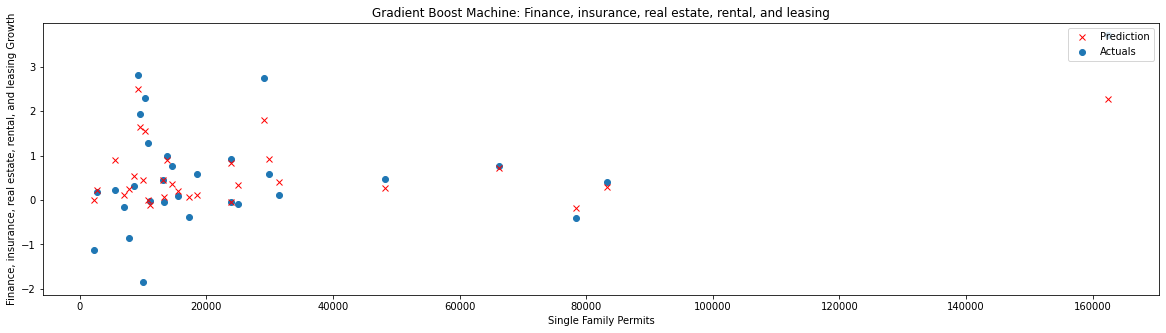

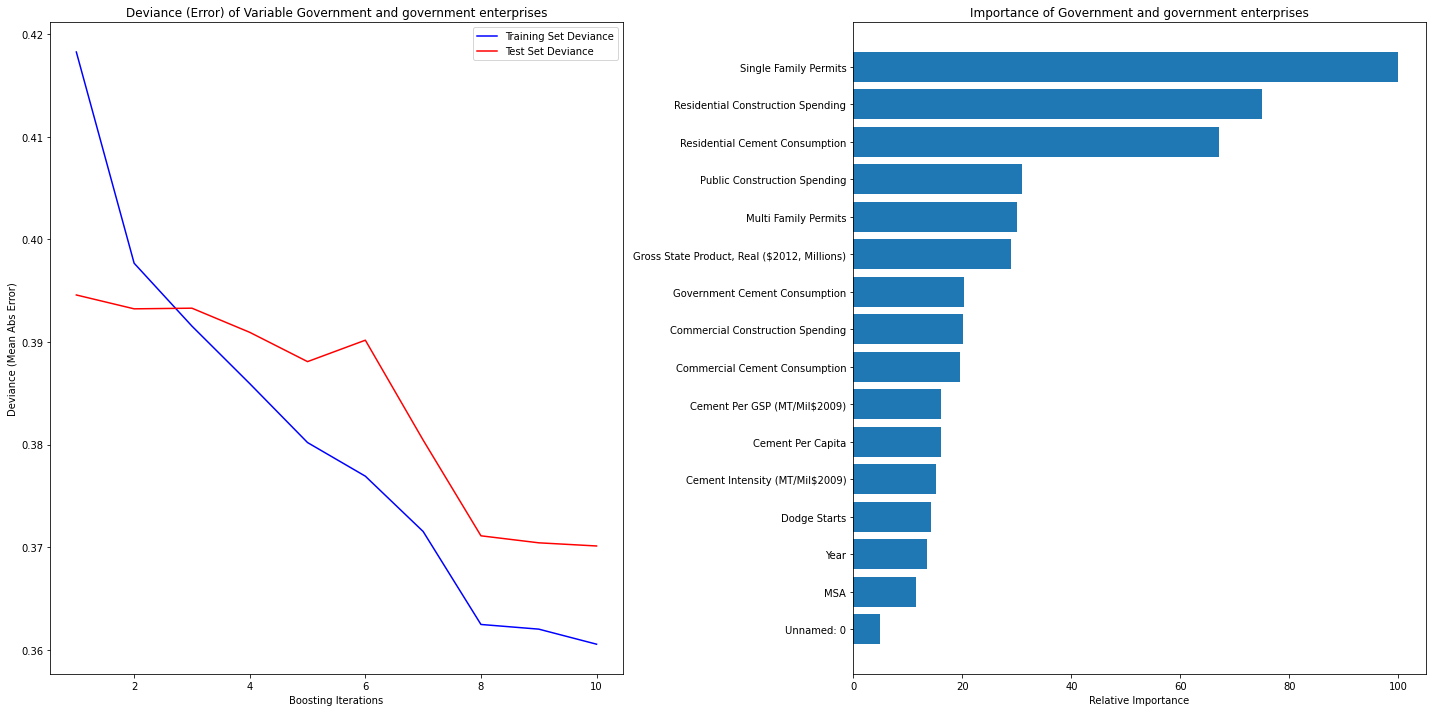

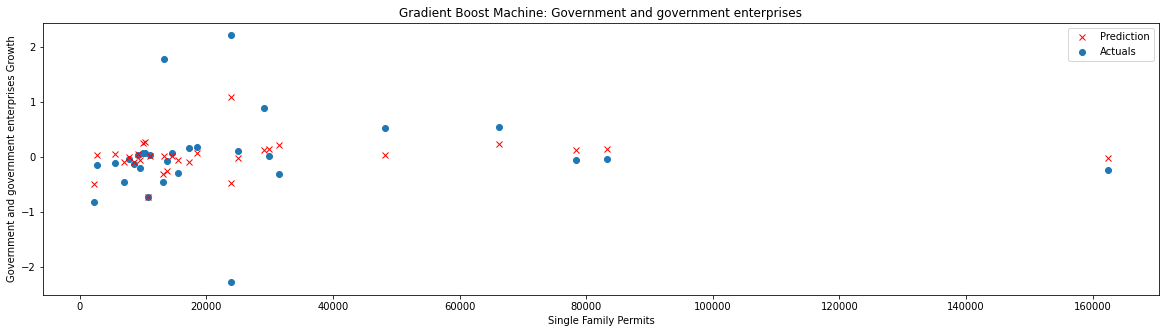

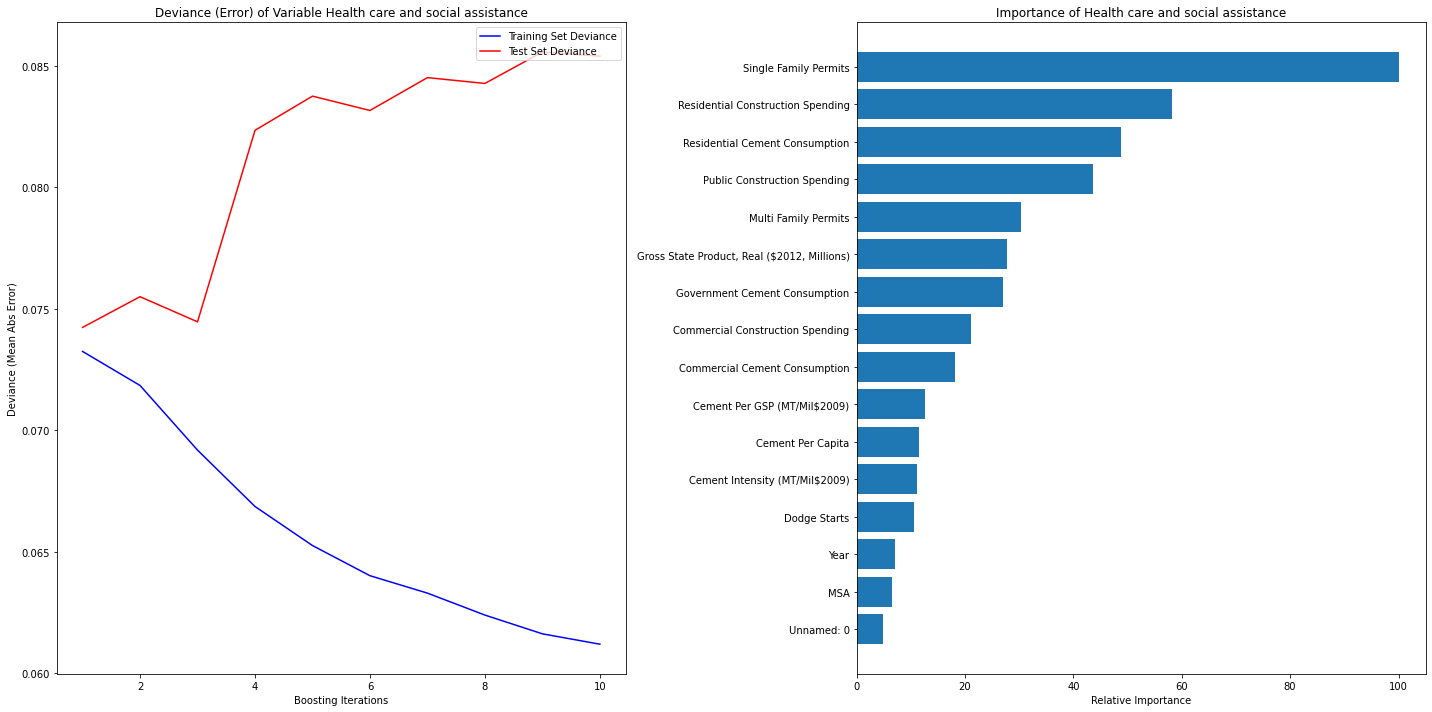

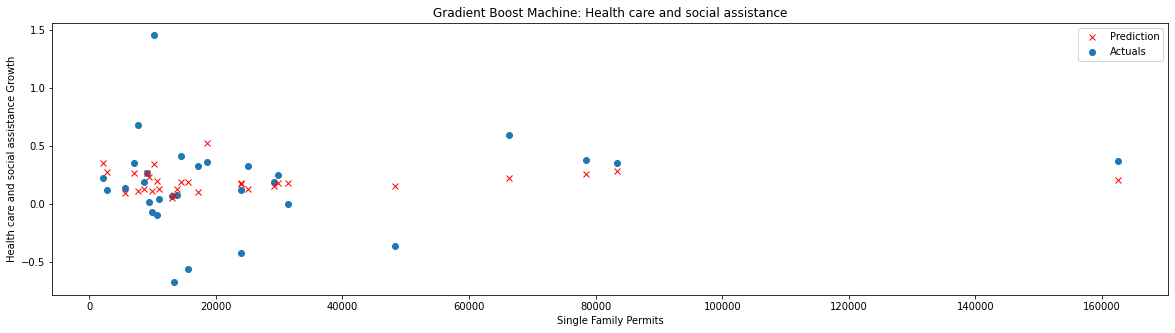

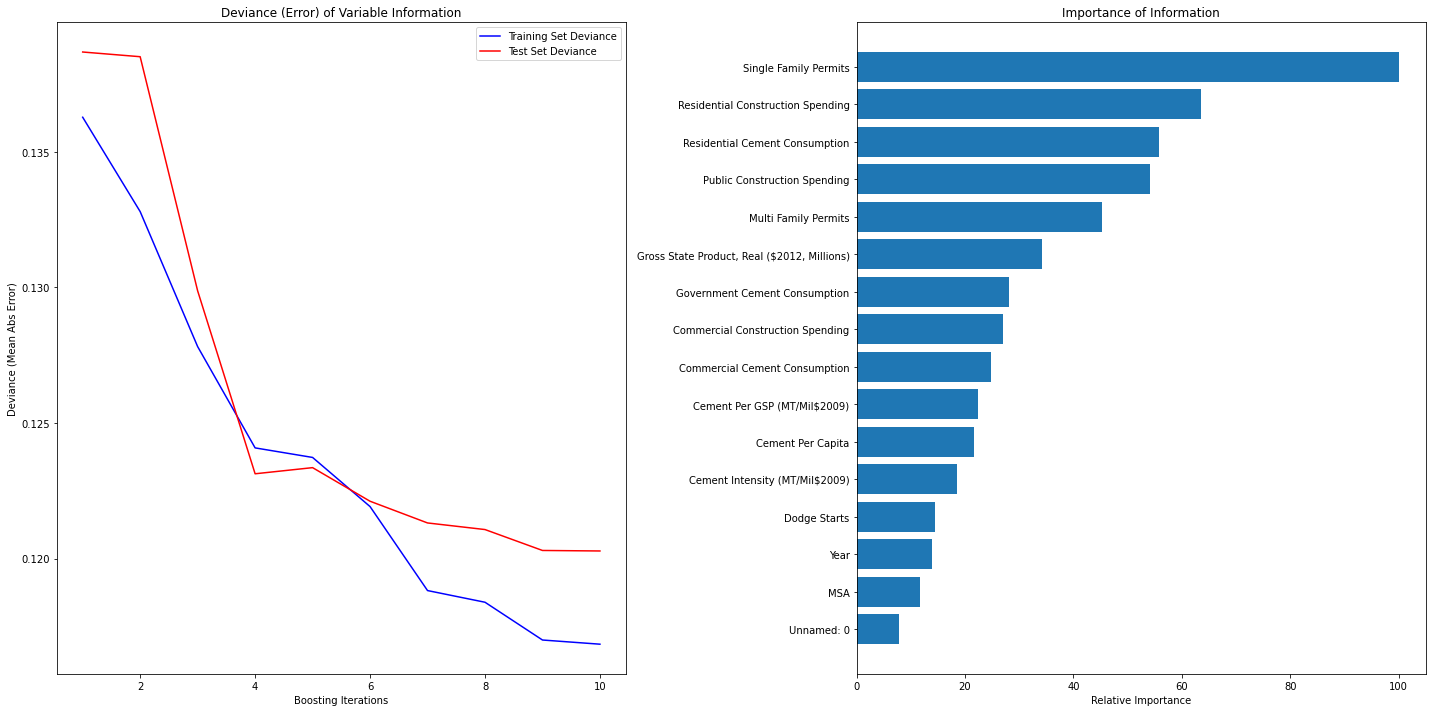

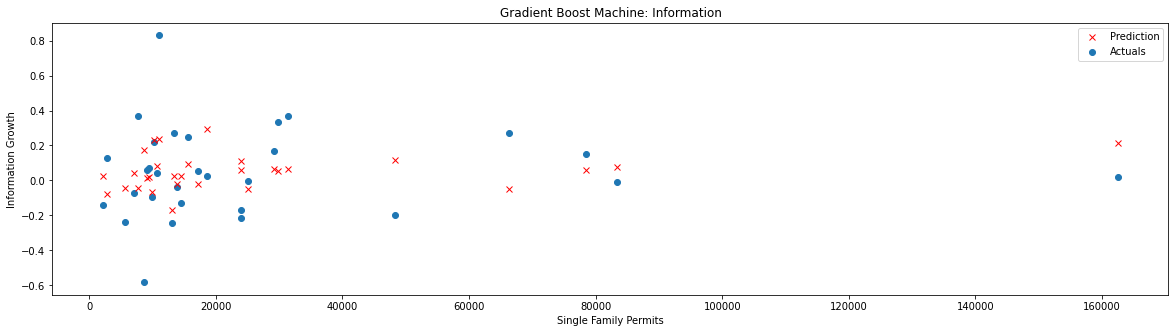

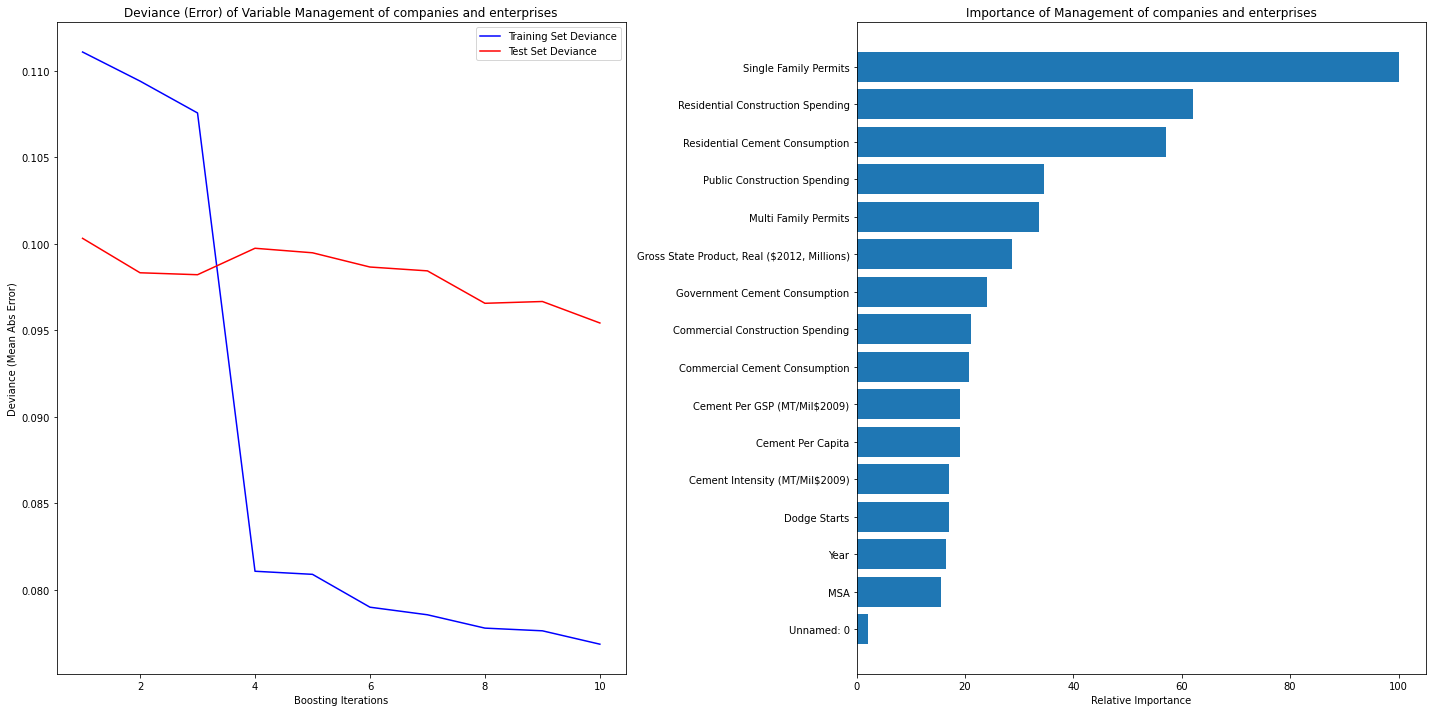

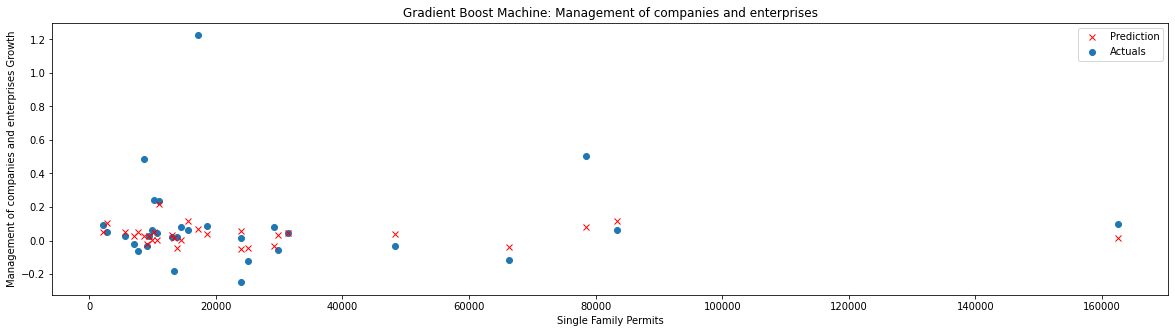

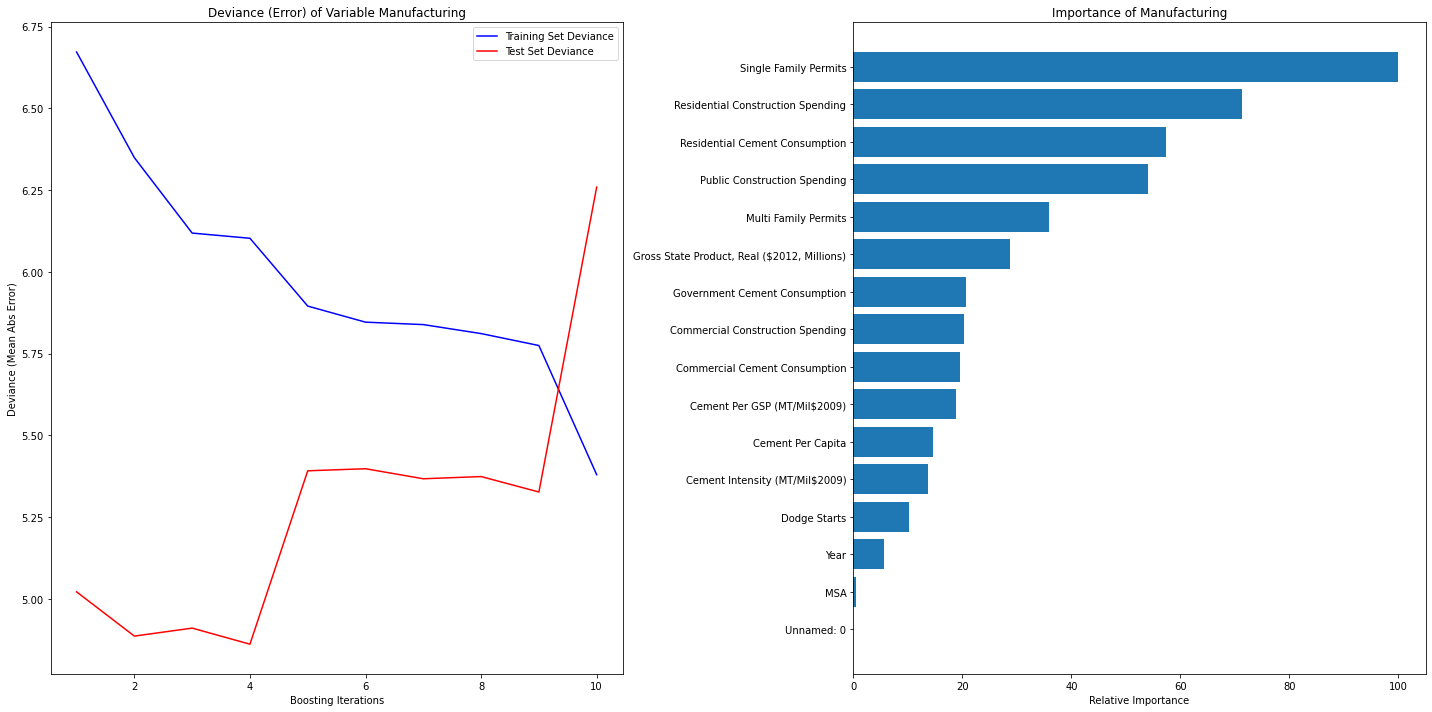

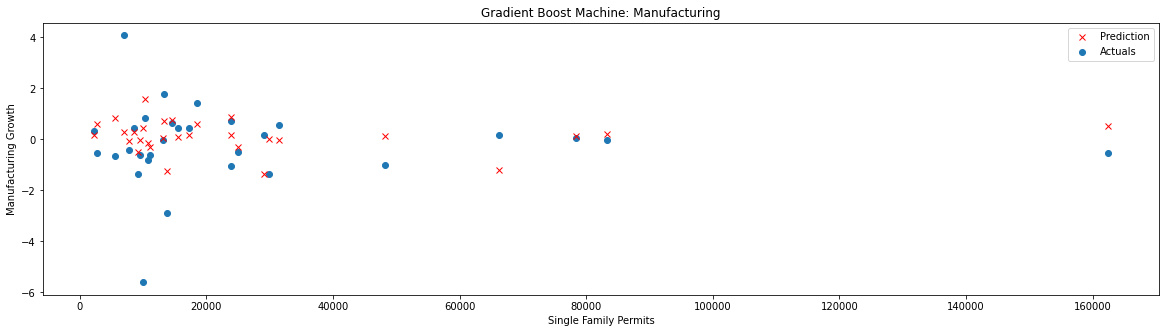

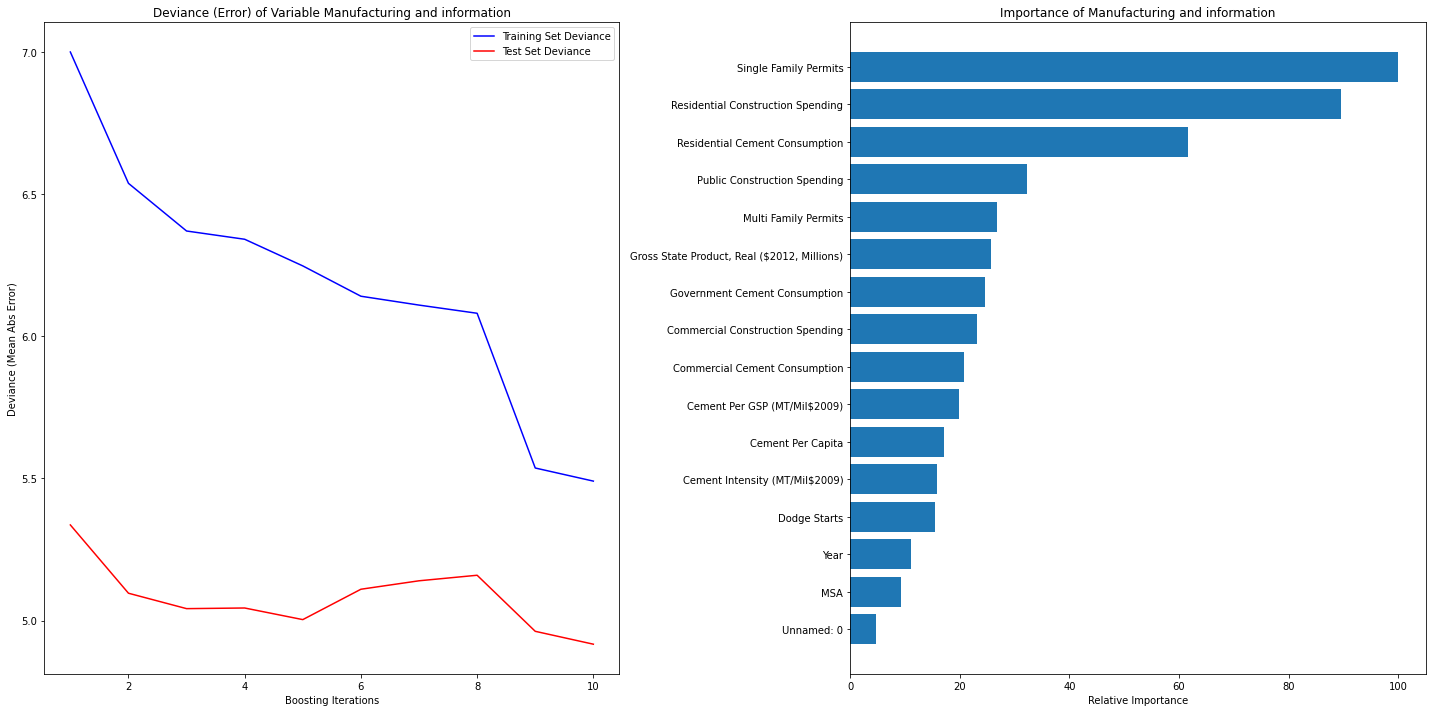

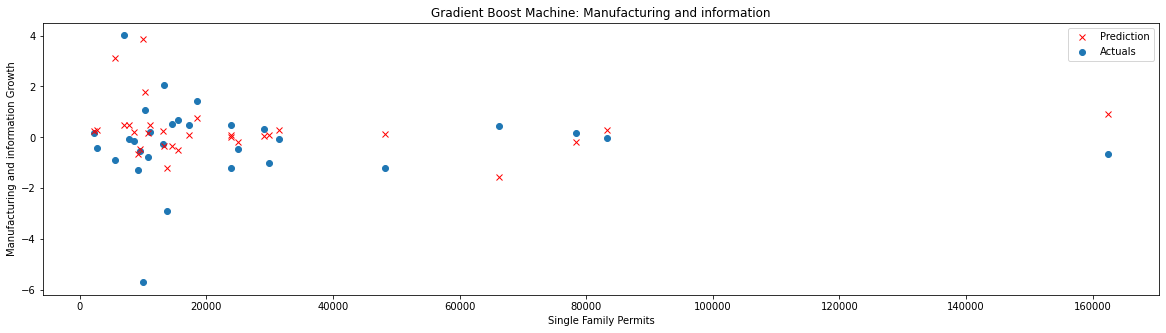

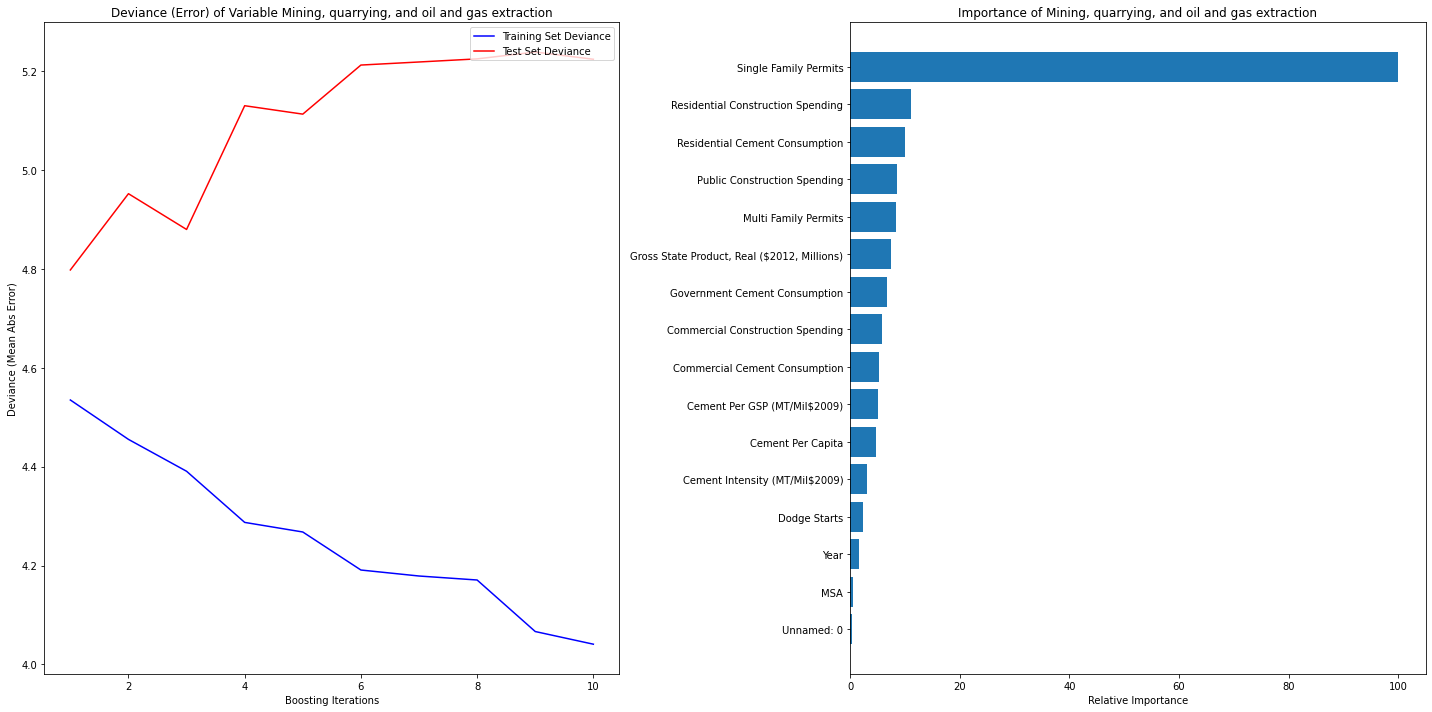

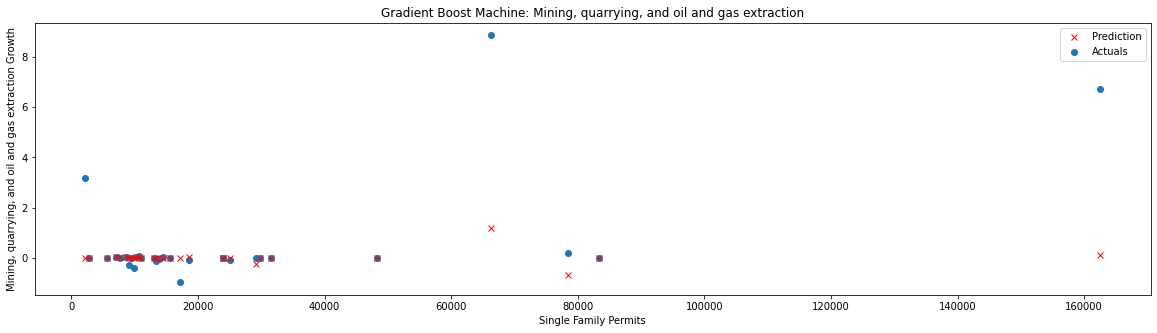

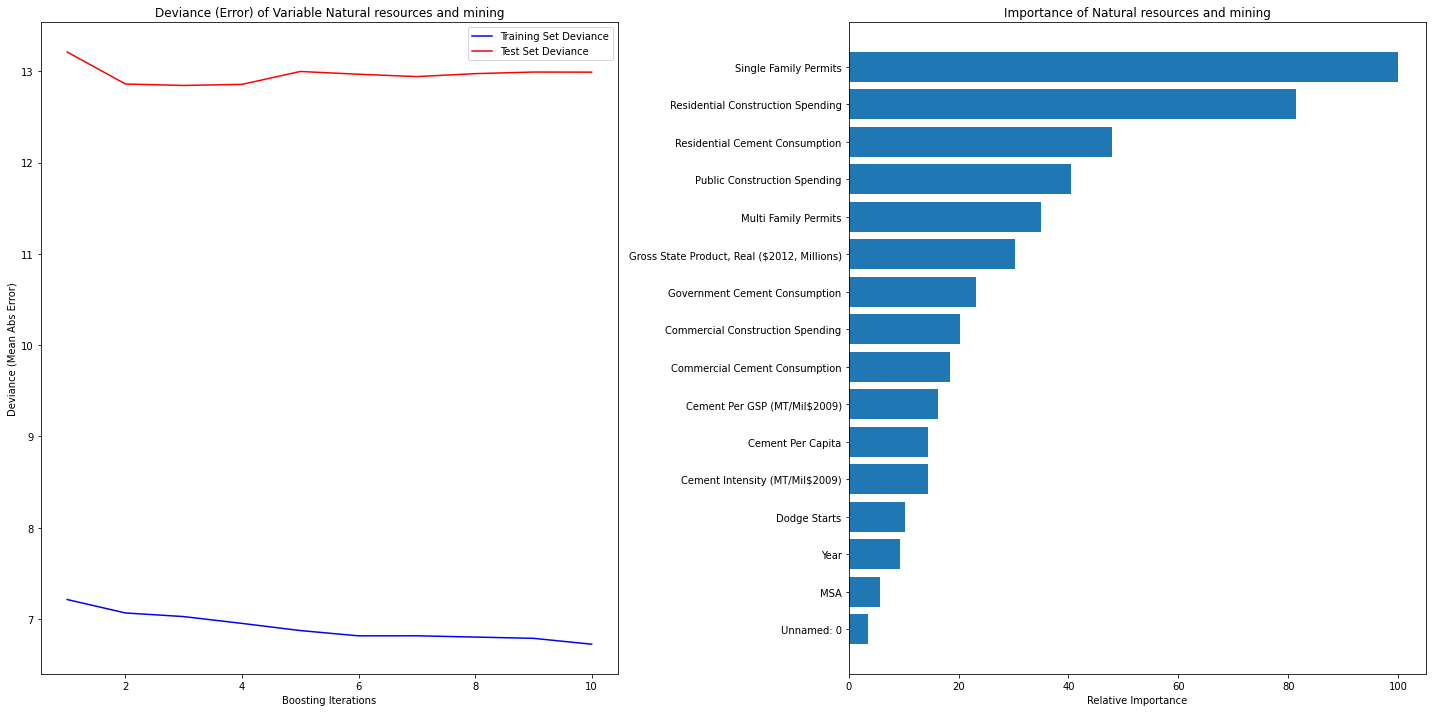

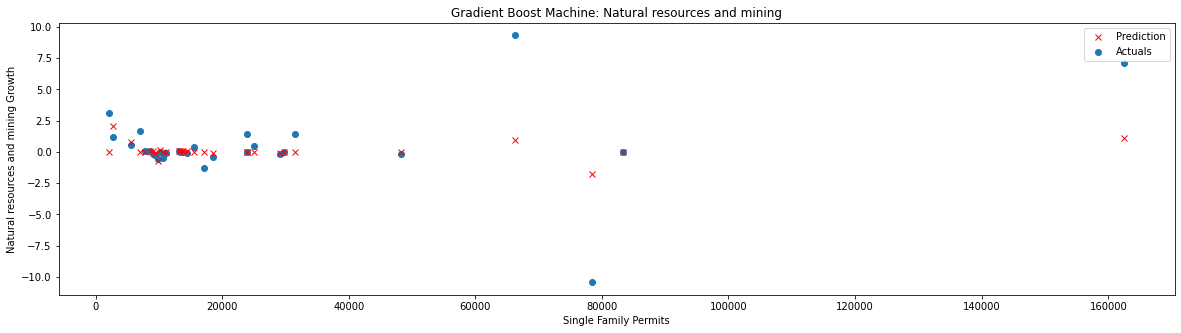

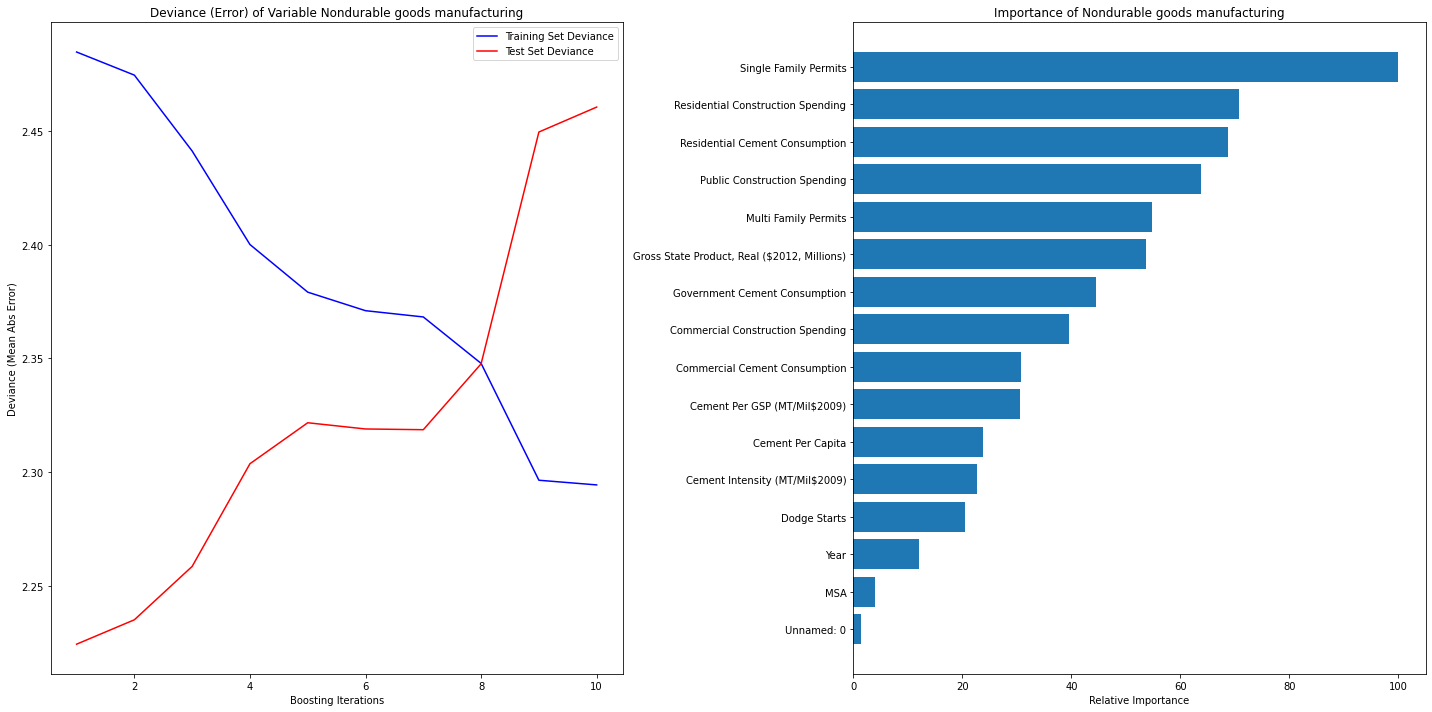

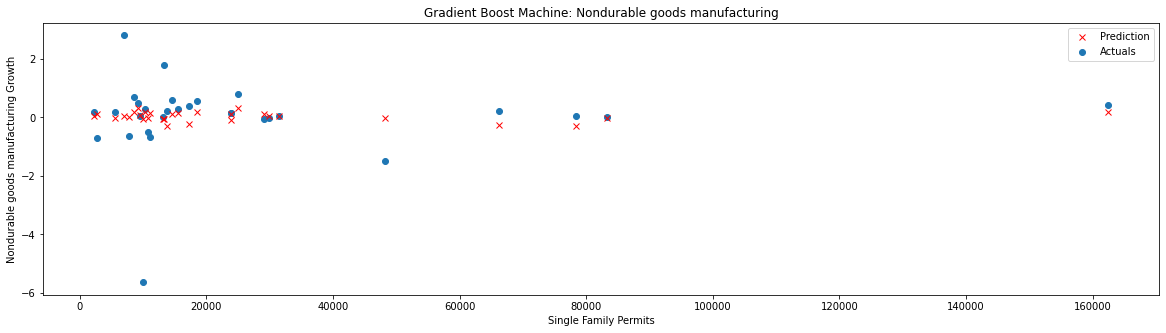

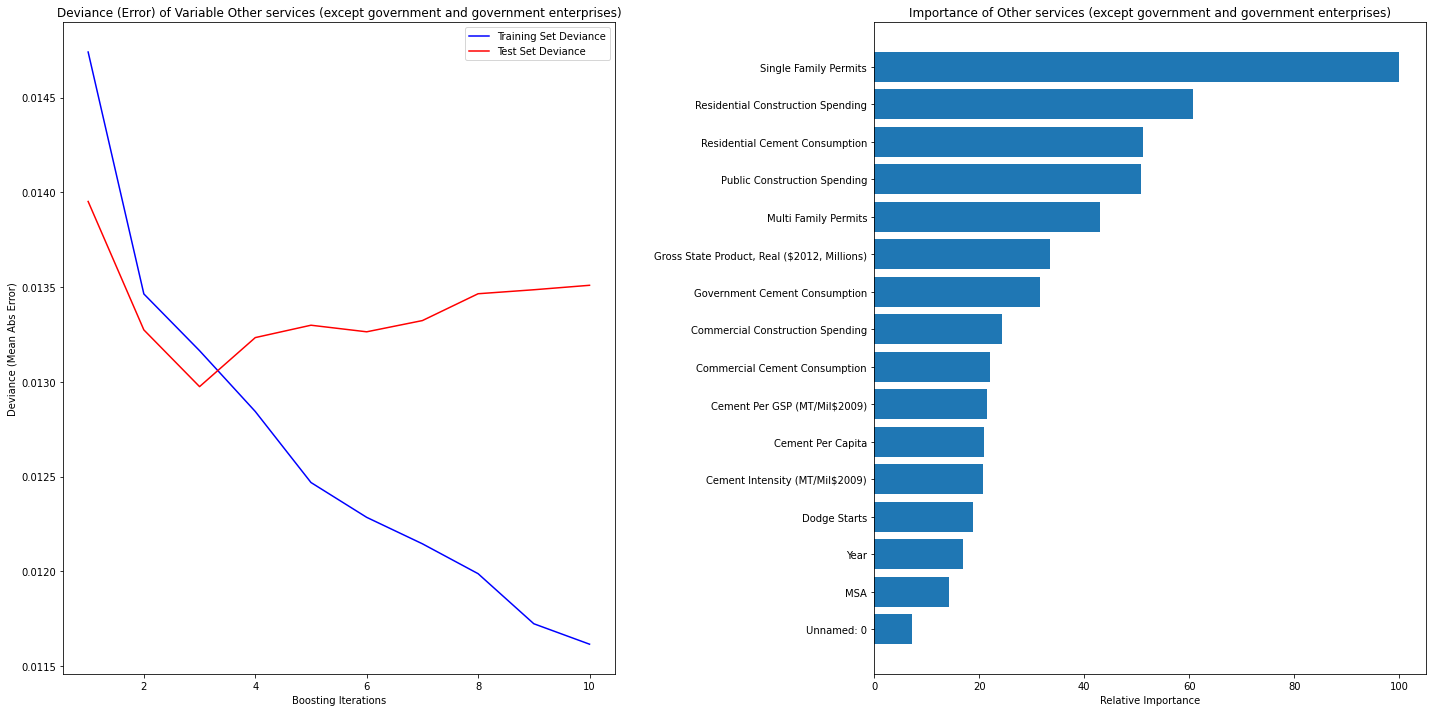

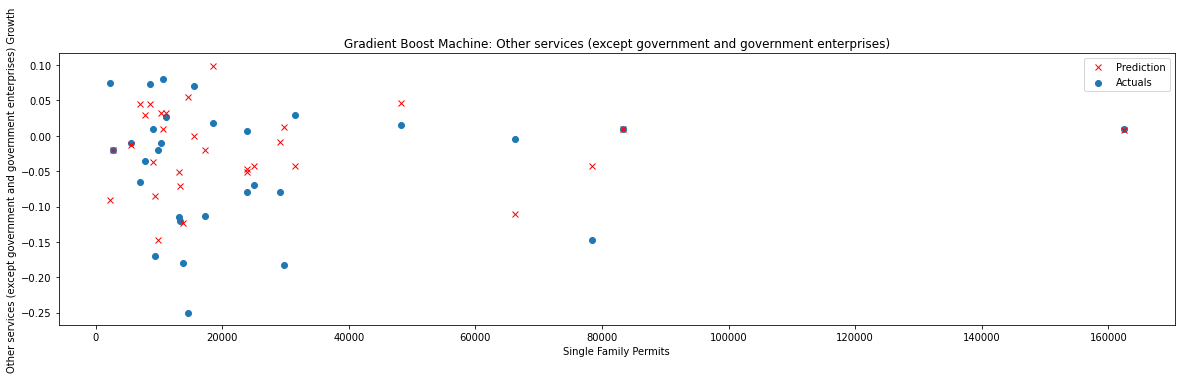

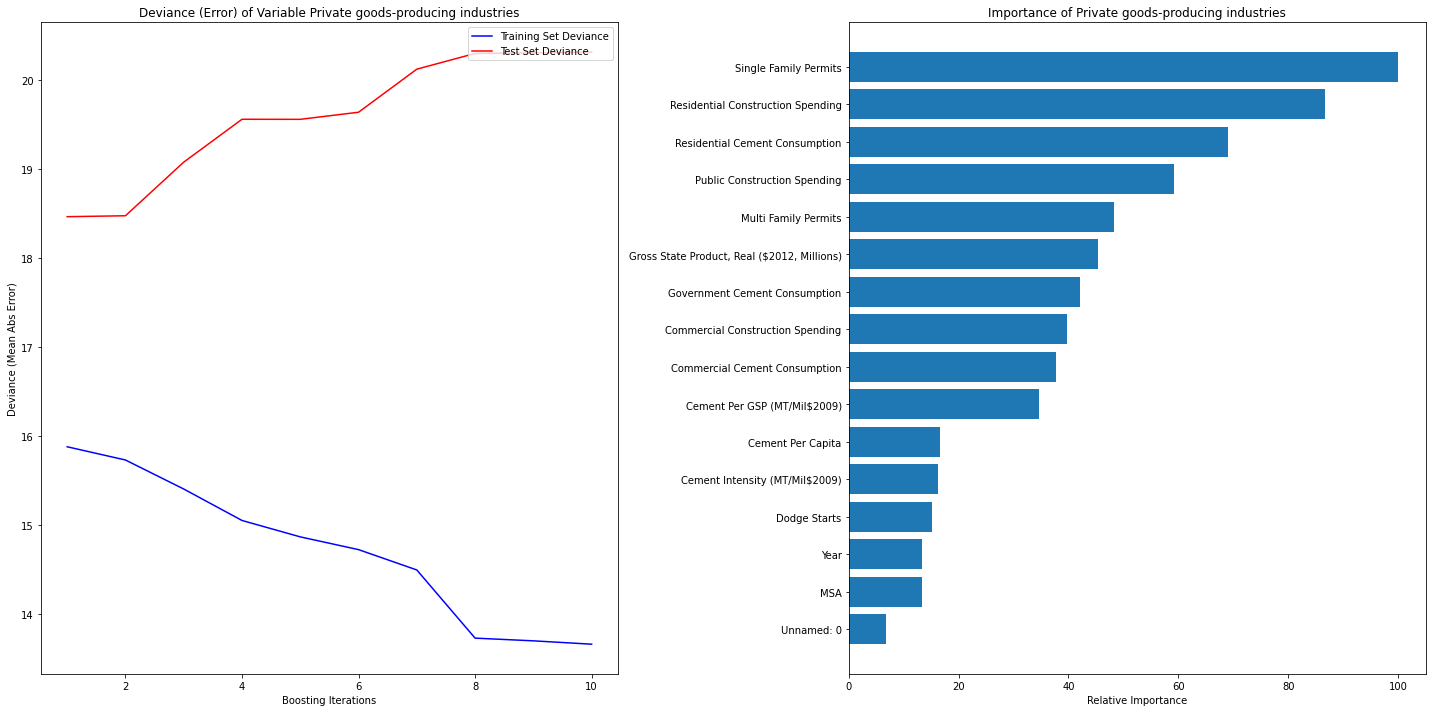

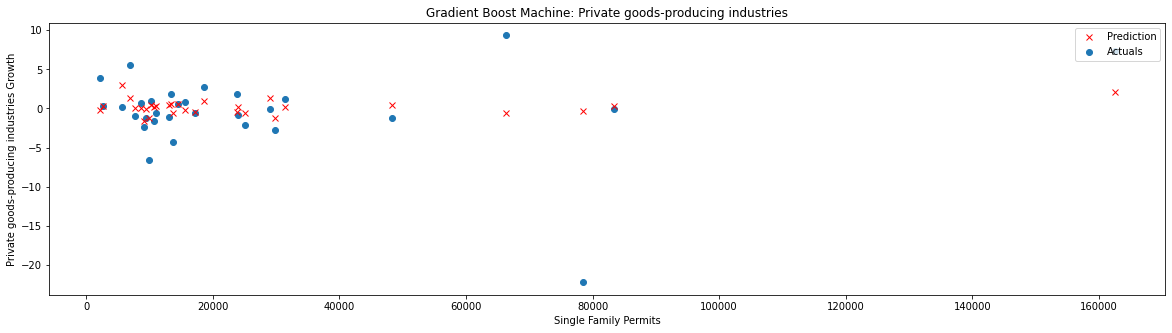

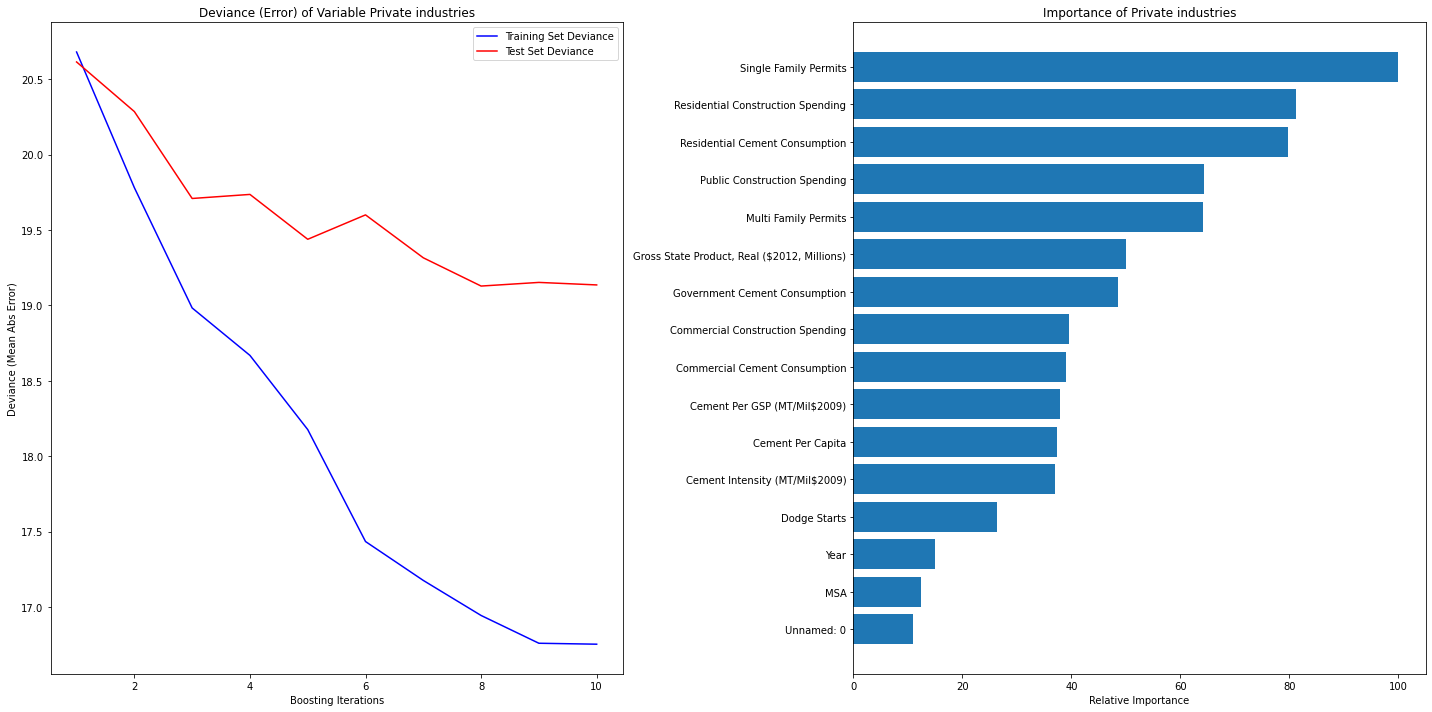

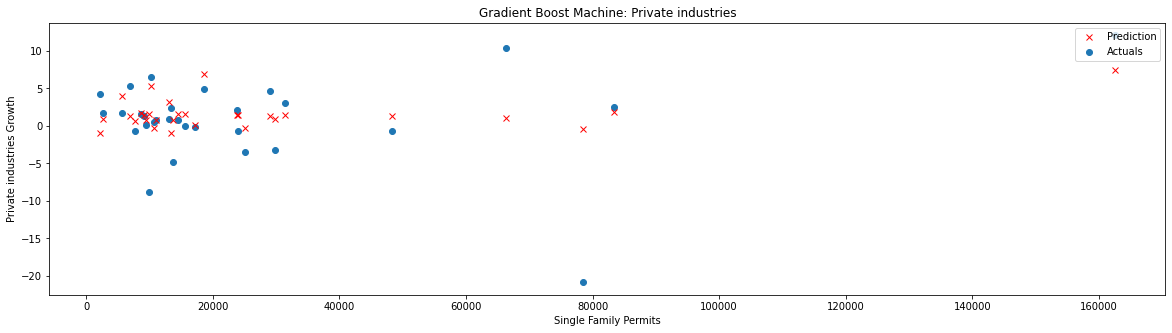

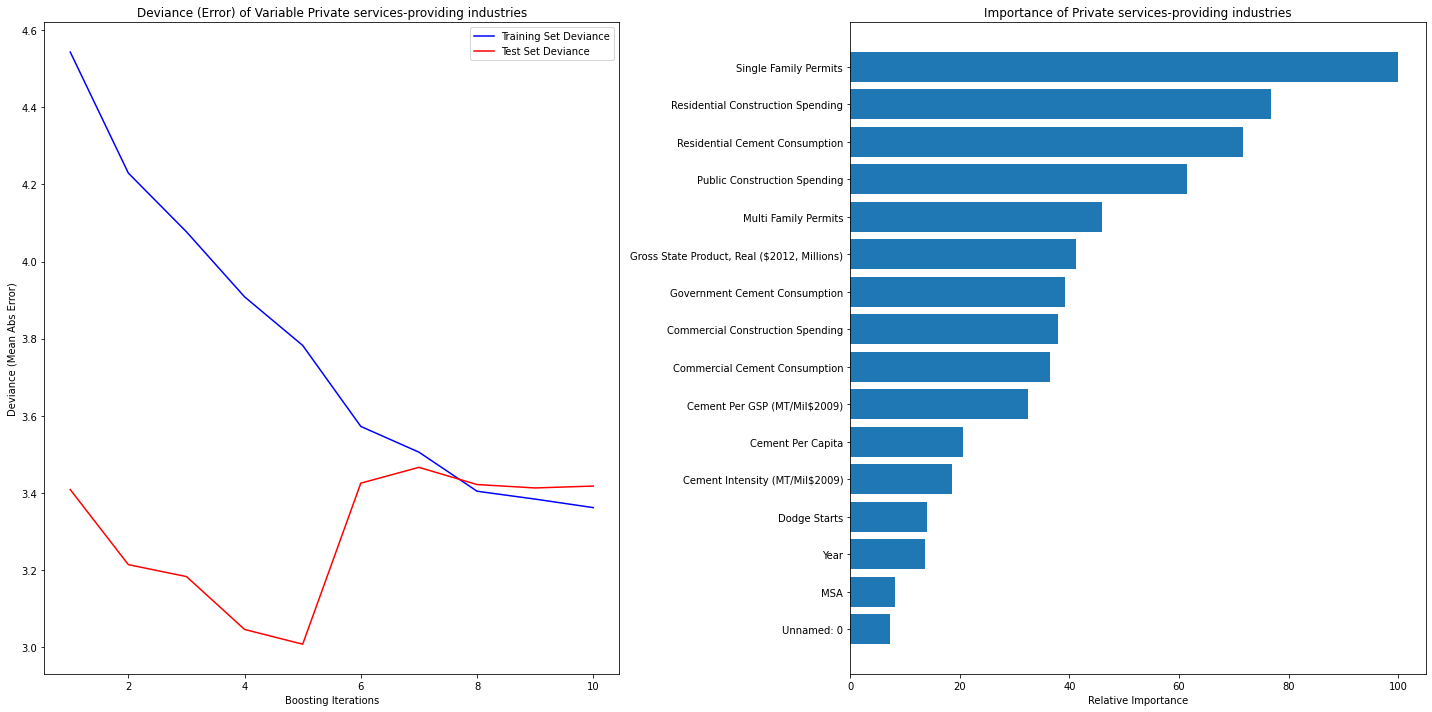

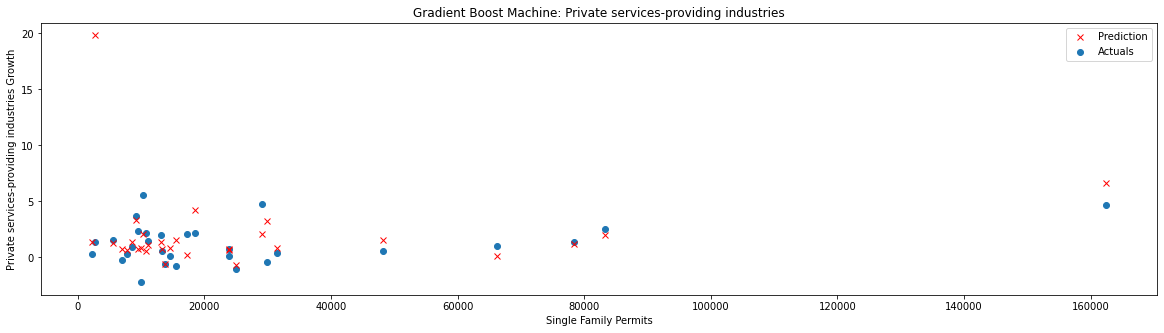

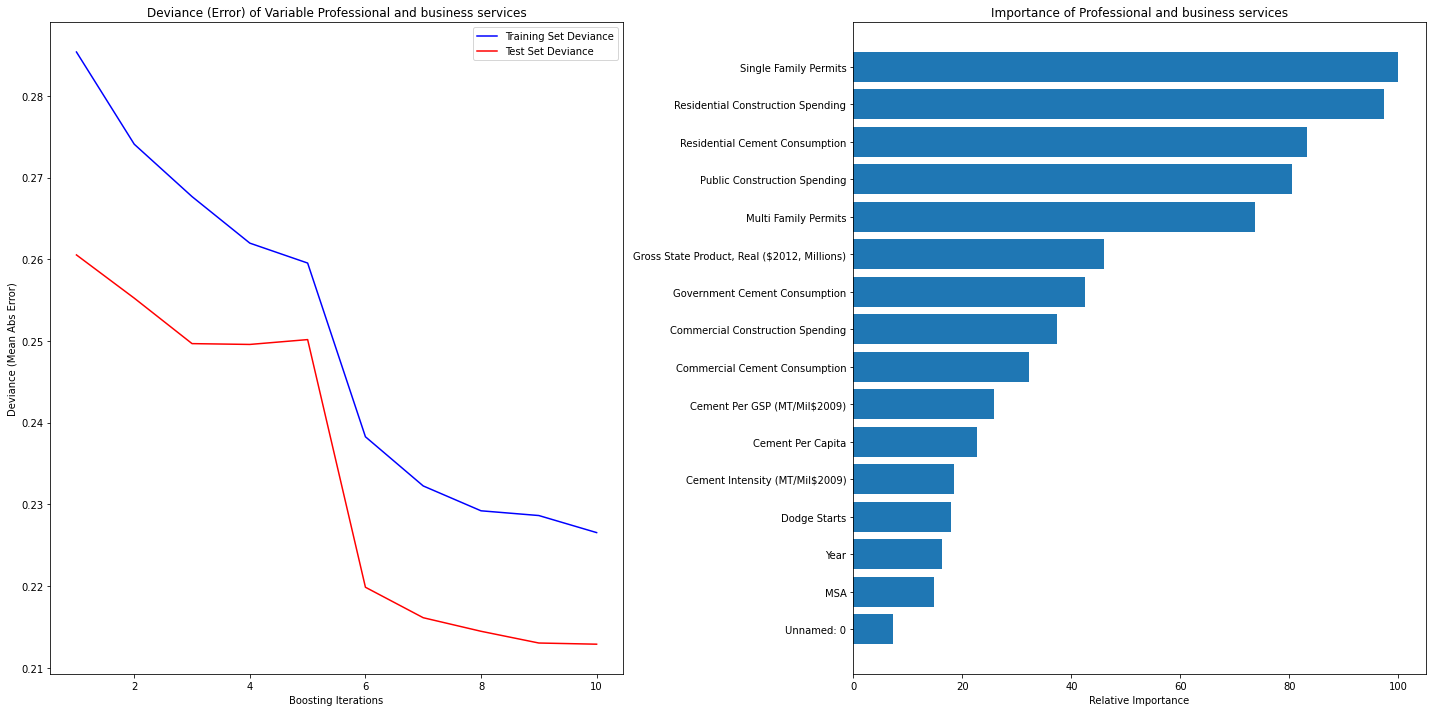

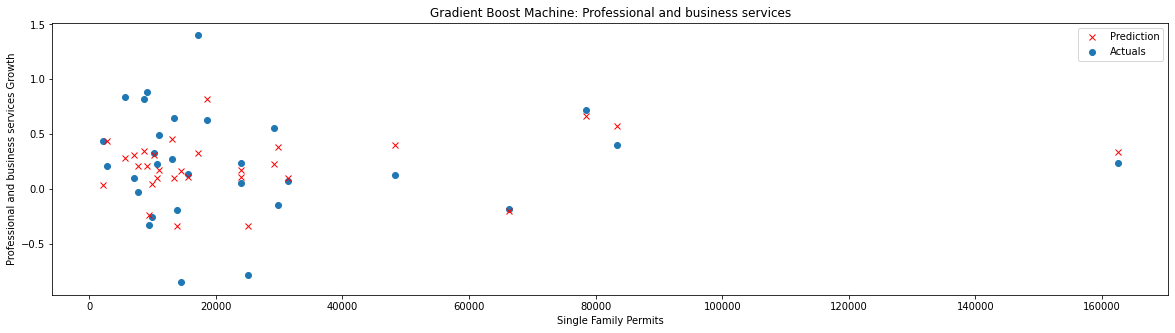

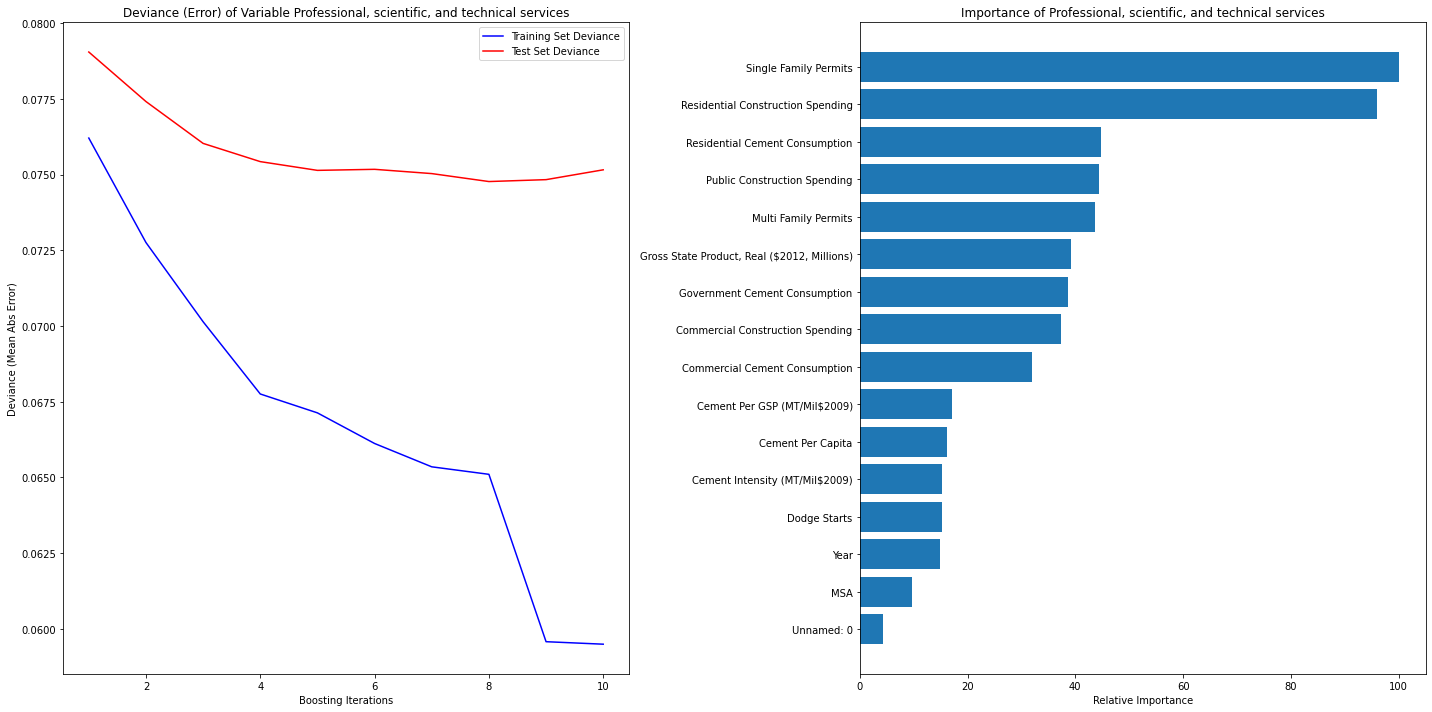

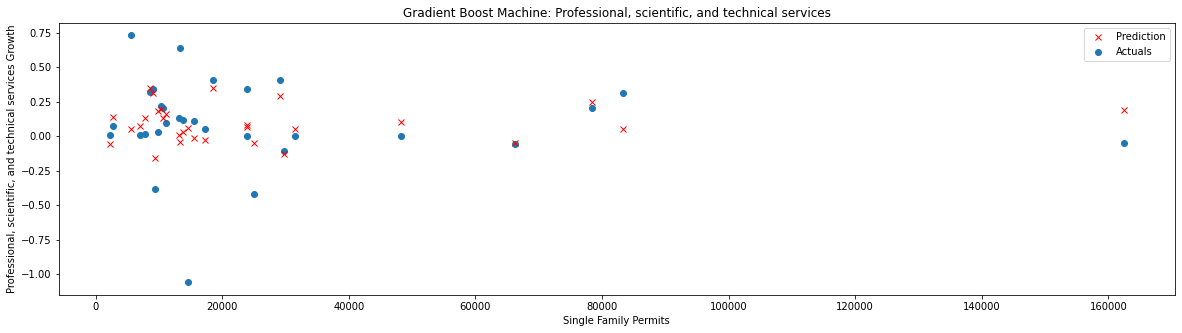

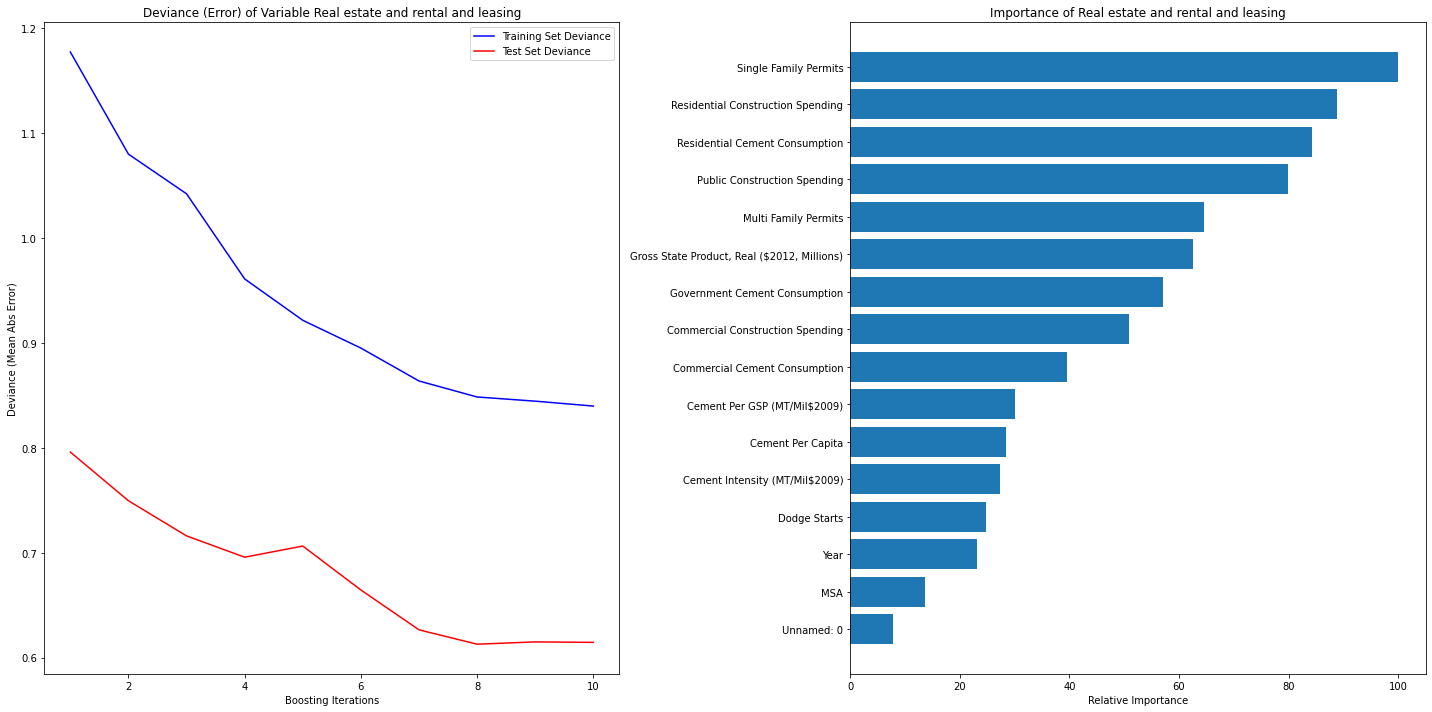

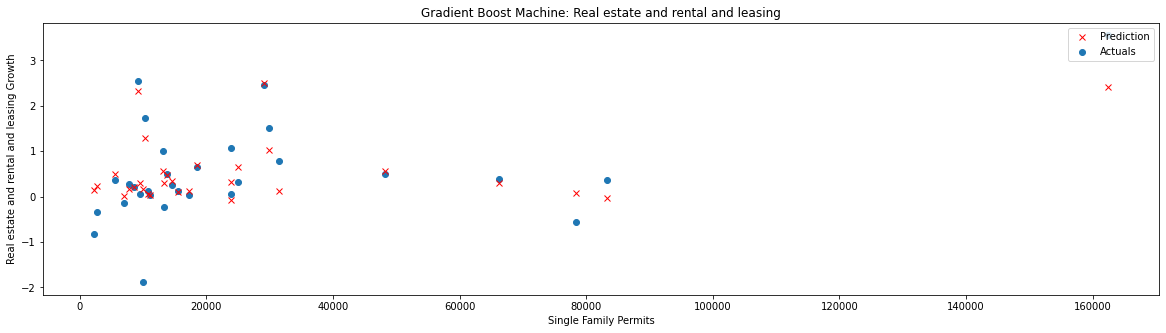

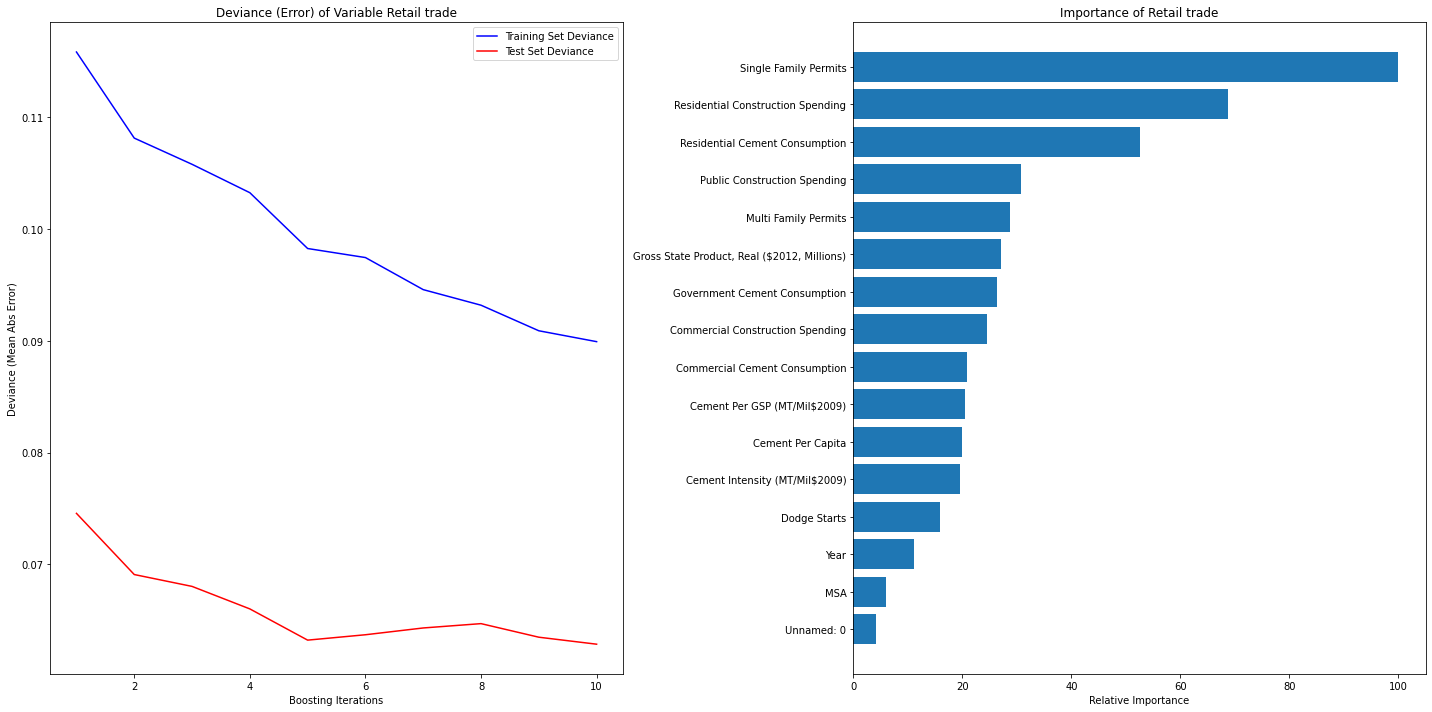

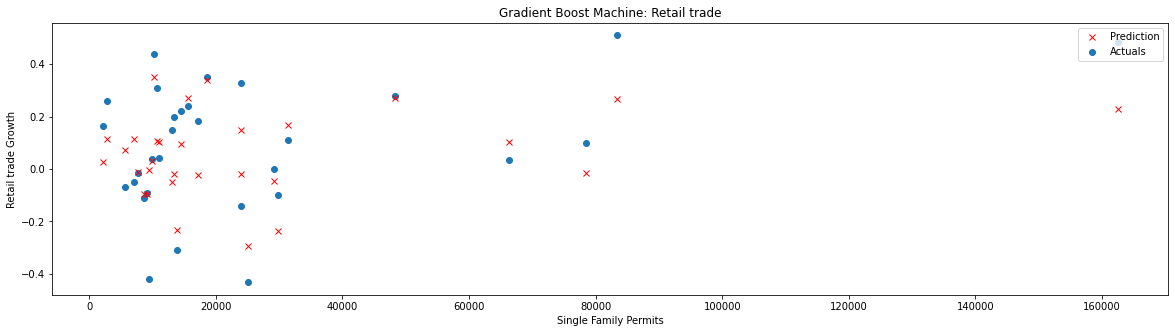

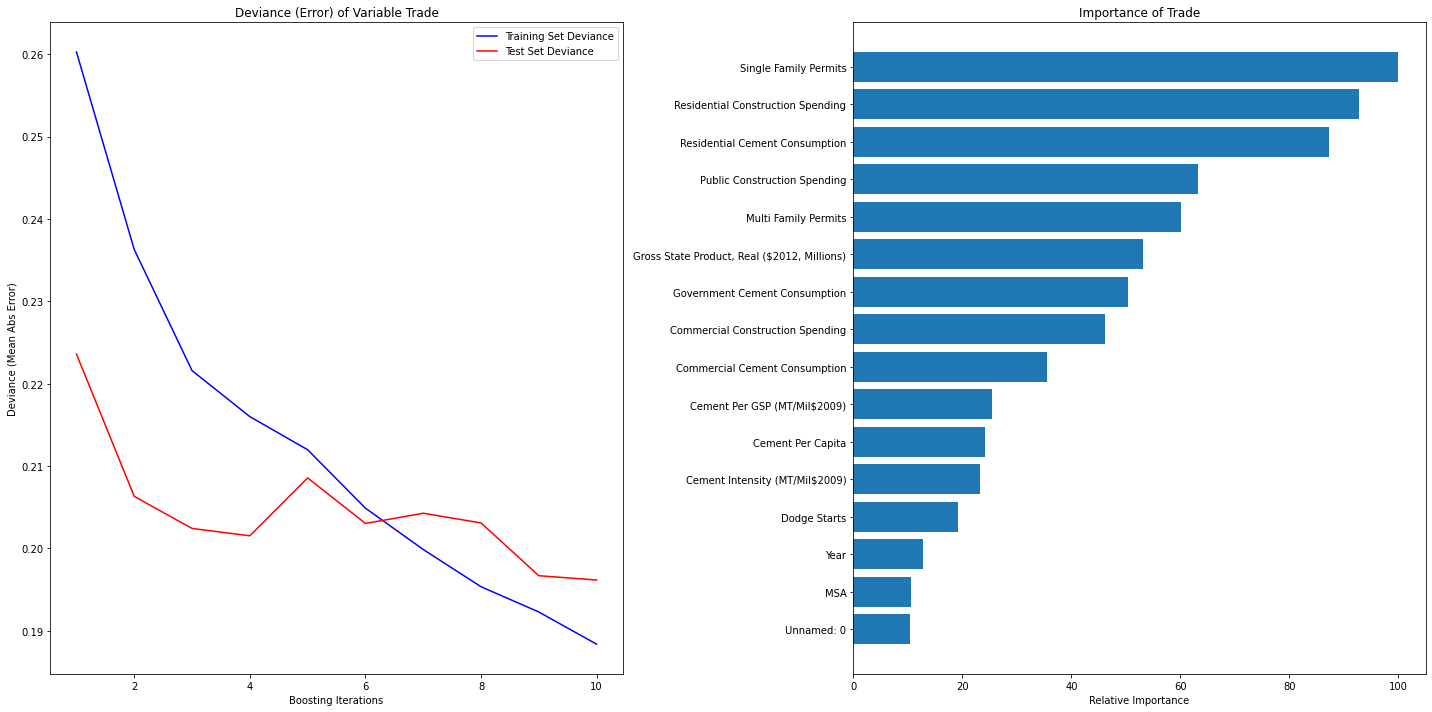

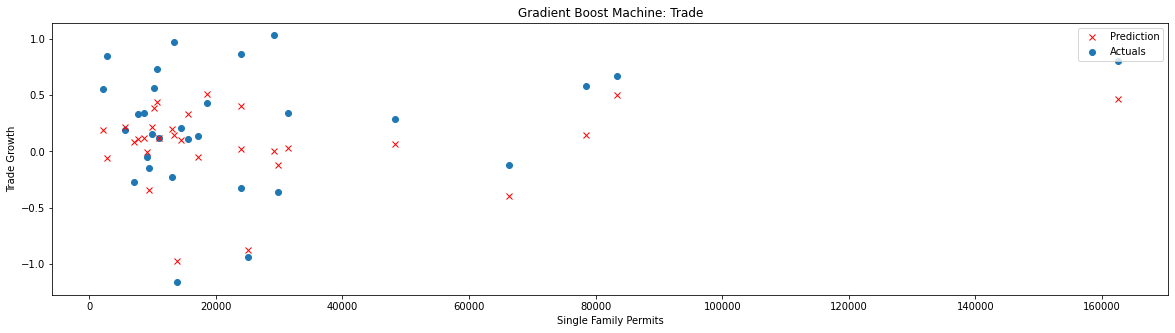

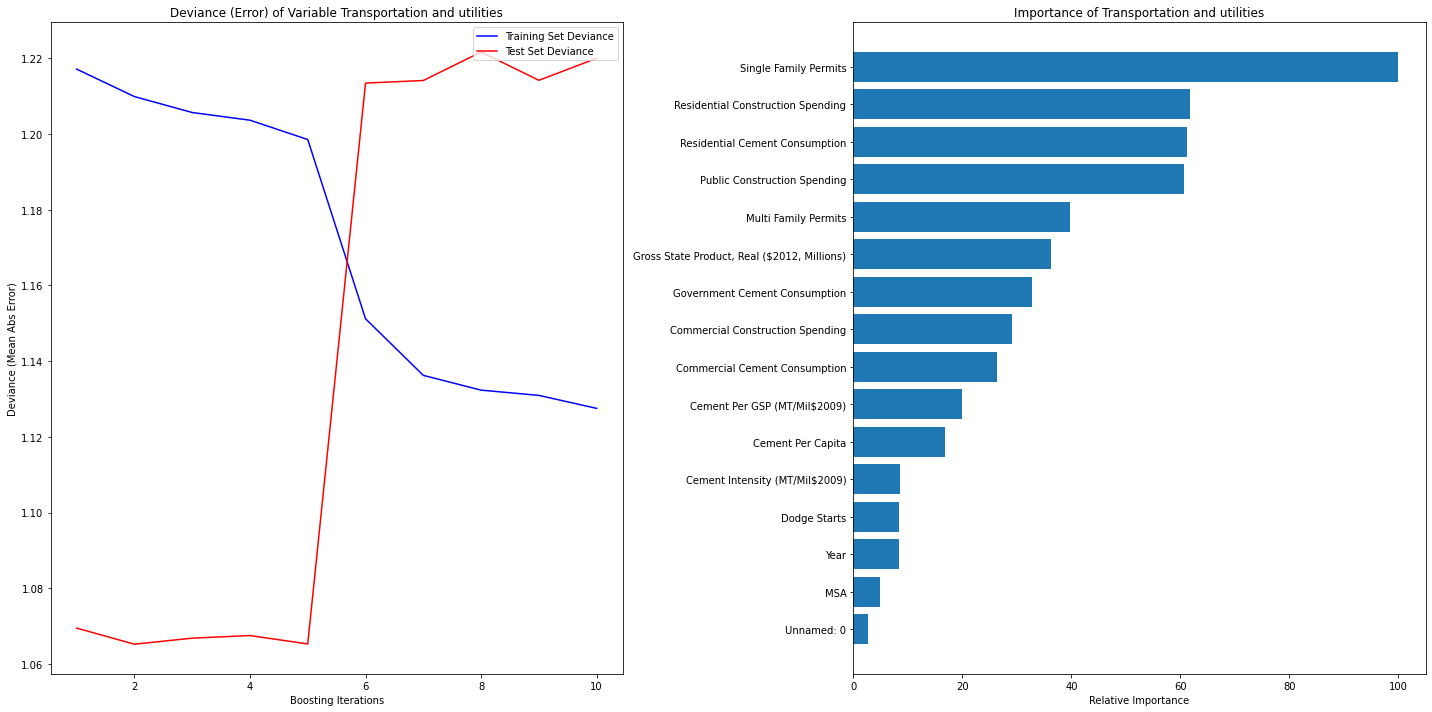

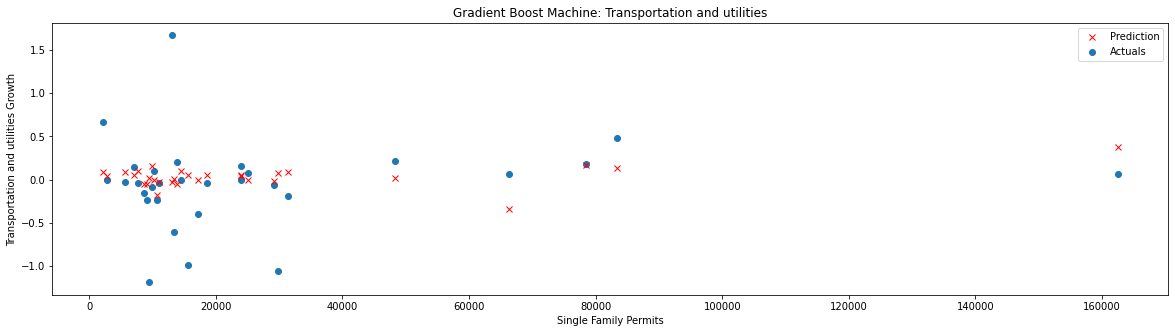

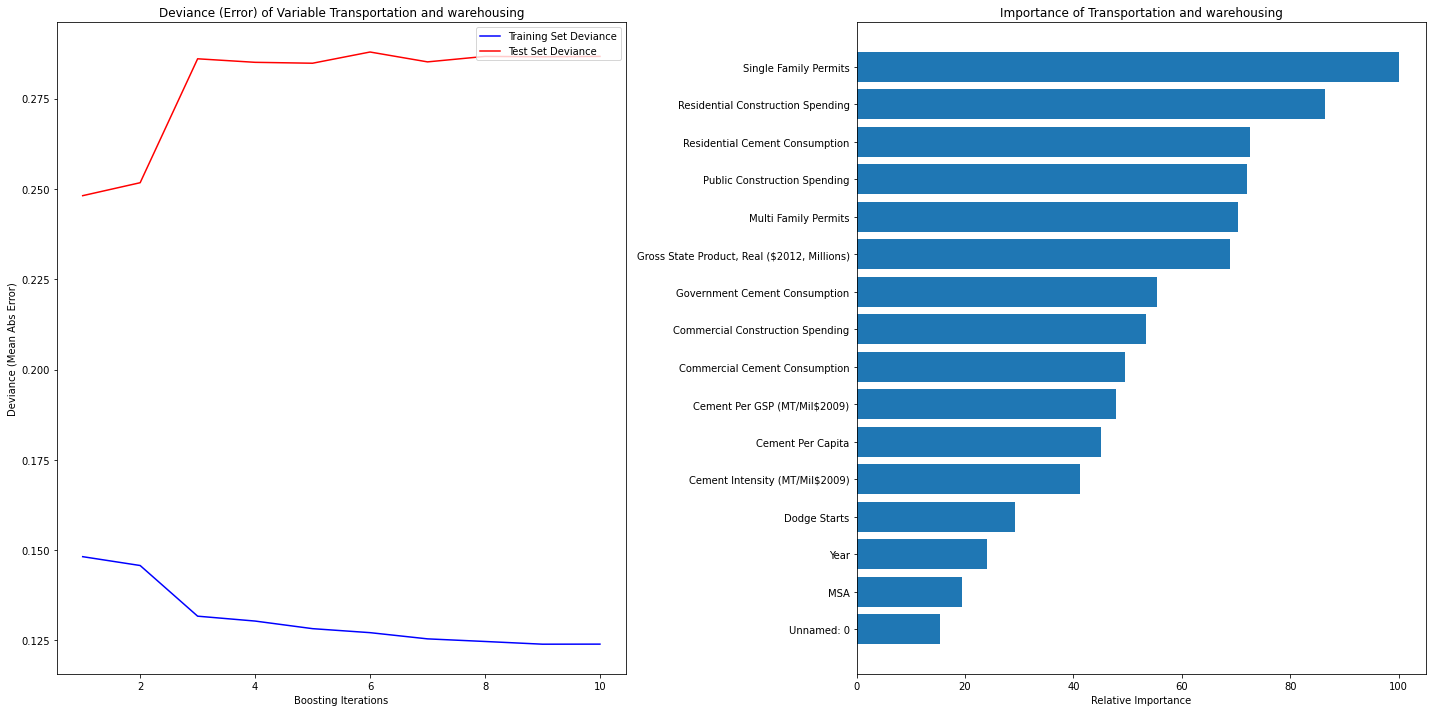

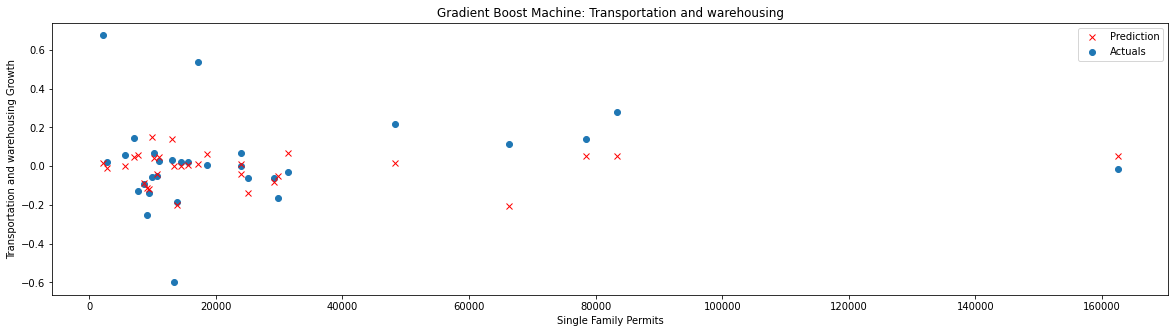

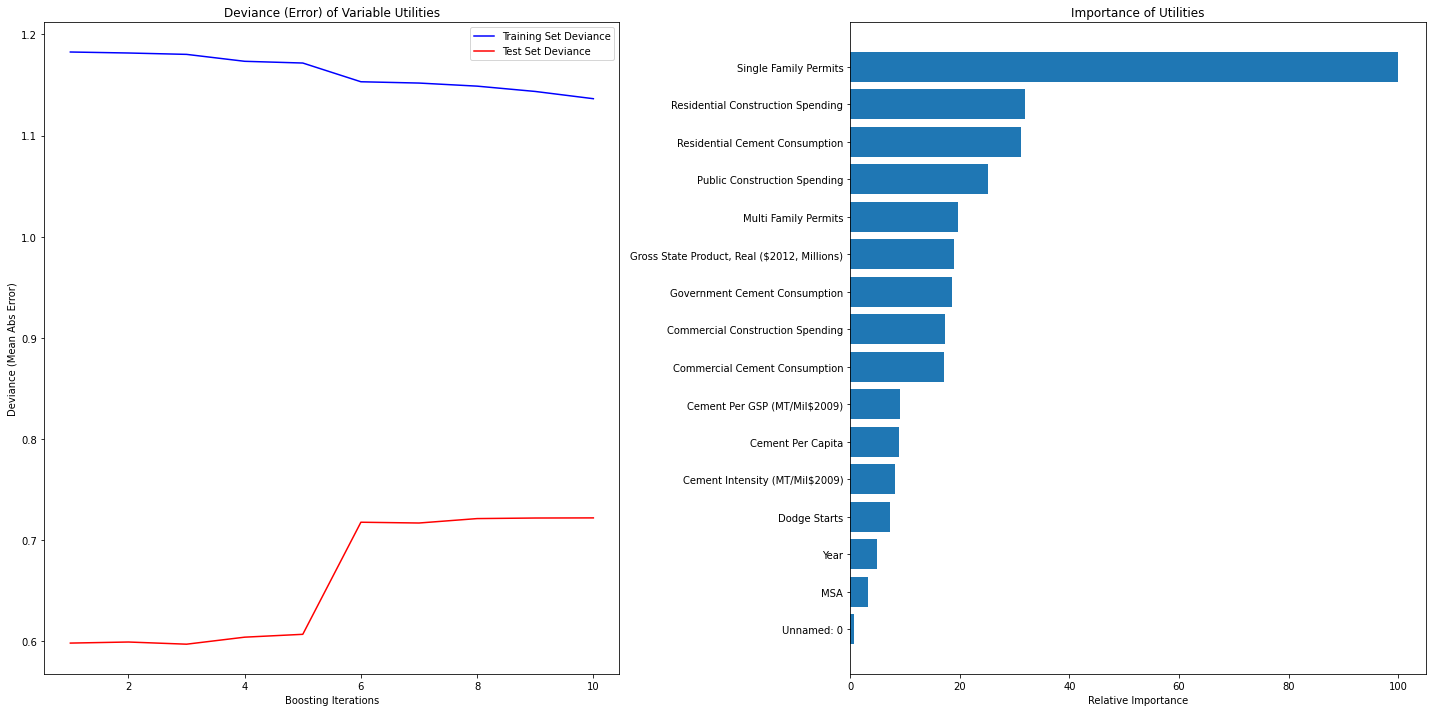

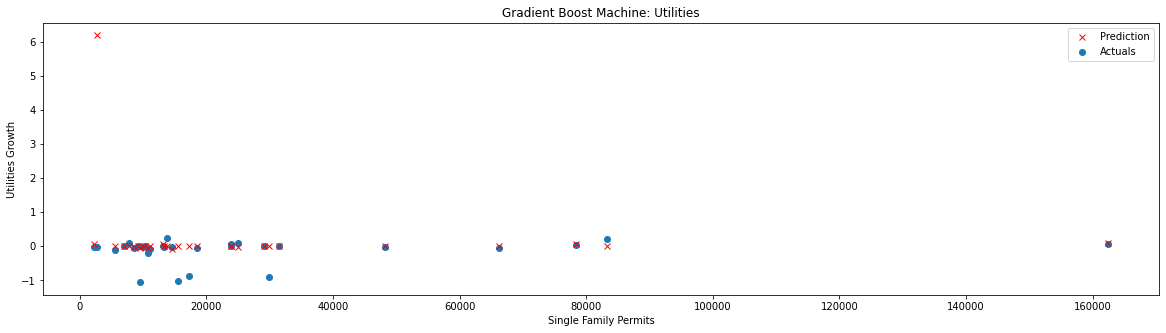

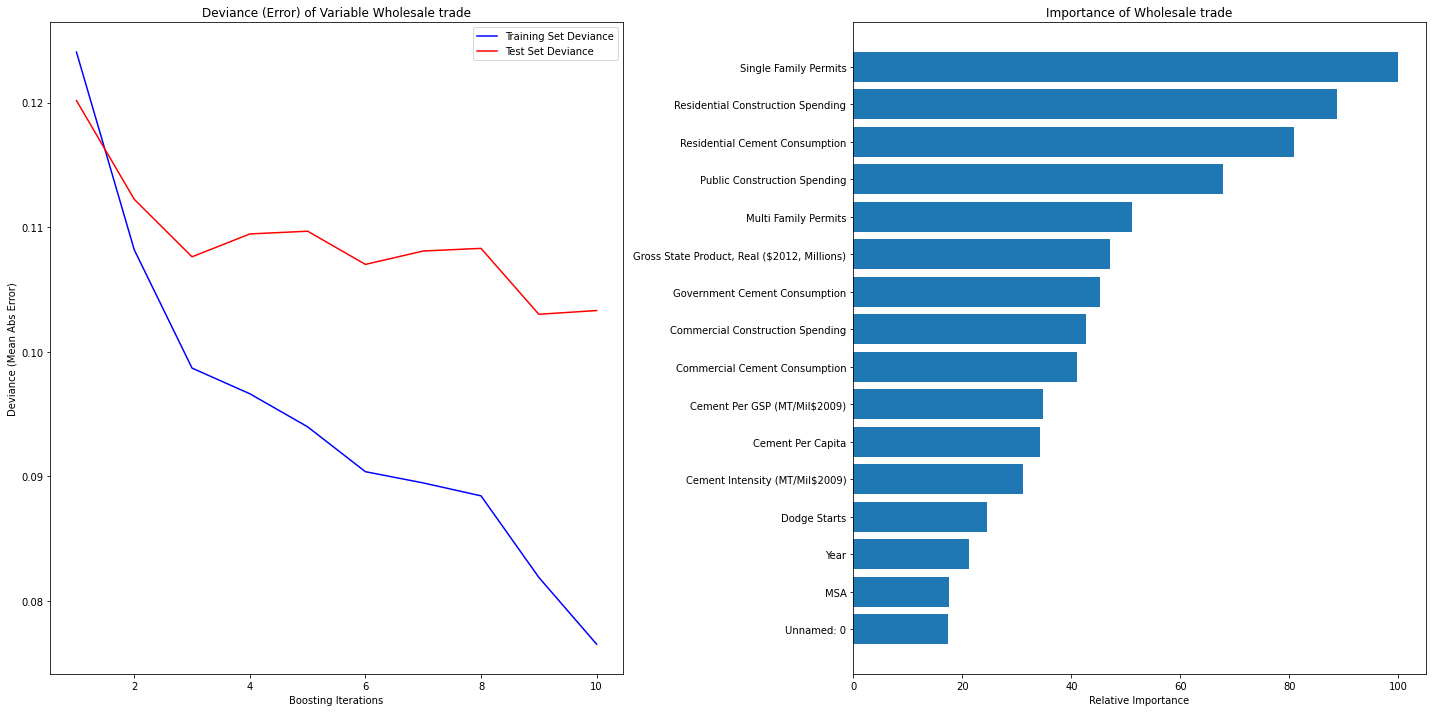

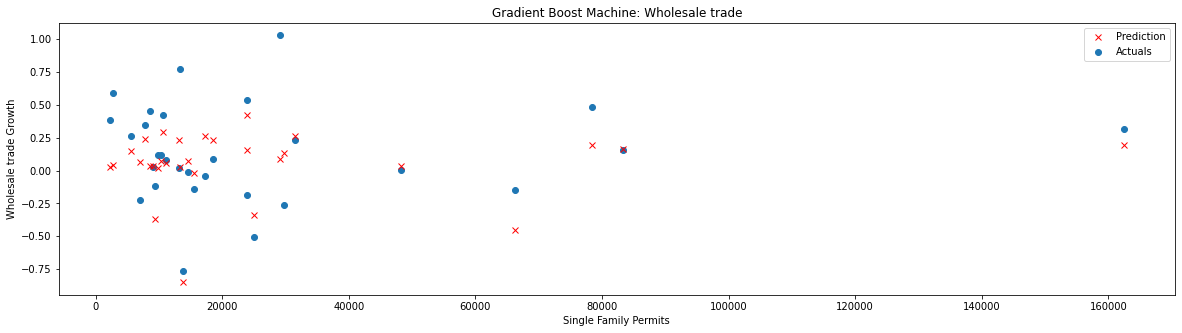

In [132]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#var=['Cement Per Capita','Commercial Construction Spending',"Unemployment Rate (%)",'Gross State Product, Real ($2012, Millions)','Transportation and utilities','Transportation and warehousing',]

#label="Construction"
os.chdir(grad_boost_img) ###CHANGE DIRECTORY OF IMAGES
########################################
params = {
    'n_estimators': 10,
    'max_depth': 4,
    'learning_rate': .9,
    'criterion': 'mae'}
#########################################
var=var_pca
df_pred_grad_boost=pd.DataFrame()
for label in var_bed:
  df_train_var=df_train[var_pca]
  df_train_label=df_train[label]
  df_val_var=df_val[var_pca]
  df_val_label=df_val[label]
  
  clf = ensemble.GradientBoostingRegressor(**params)
  clf.fit(df_train_var, df_train_label)
  # compute test set deviance
  test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

  for i, y_pred in enumerate(clf.staged_predict(df_val_var)):
      test_score[i] = clf.loss_(df_val_label, y_pred)

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title('Deviance (Error) of Variable {}'.format(label))
  plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
  plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
  plt.legend(loc='upper right')
  plt.xlabel('Boosting Iterations')
  plt.ylabel('Deviance (Mean Abs Error)')
  #axes=plt.gca()
  #axes.set_ylim([0,1.8])

# #############################################################################
# Plot feature importance
#plt.figure(figsize=(10,5))
  feature_importance = clf.feature_importances_
# make importances relative to max importance
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplot(1, 2, 2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, df_final.columns)
  plt.xlabel('Relative Importance')
  plt.title('Importance of {}'.format(label))
  plt.tight_layout()

  plt.savefig("Gradient_boost_{}.png".format(label))
  plt.show()

  #'Total Construction Spending',
  plt_var='Single Family Permits'
  plt.figure(figsize=(20, 5))
  plt.title('Gradient Boost Machine: {}'.format(label))
  plt.scatter(df_val[plt_var][0:30], df_val_label[0:30],label="Actuals")
  plt.plot(df_val[plt_var][0:30], clf.predict(df_val_var[0:30]),'x',color='r',label="Prediction")
  plt.xlabel(plt_var)
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Gradient_boost_predictions_{}.png".format(label))
  plt.show()
  clf.fit(df_final_rand[var_pca], df_final_rand[label])
  df_pred_grad_boost=pd.concat([df_pred_grad_boost,pd.DataFrame(clf.predict(df_pca_test),columns=[label])],axis=1)
  

In [0]:
df_pred_grad_boost_final=pd.concat([df_complete_pca_test.reset_index()[["Year","Geo (MSA)","State"]],df_pred_grad_boost,],axis=1)
df_pred_grad_boost_final=df_pred_grad_boost_final.sort_values(["Geo (MSA)","Year"])

In [134]:
os.chdir(base_dir)
df_pred_grad_boost_final.to_csv("df_pred_gb_v2.csv",index=False)
df_pred_grad_boost_final

Year         Geo (MSA)  ... Utilities  Wholesale trade
120  2019       Abilene, TX  ...  0.016375         0.287021
96   2020       Abilene, TX  ...  0.050568         0.316721
72   2021       Abilene, TX  ...  0.050568         0.316721
48   2022       Abilene, TX  ...  0.050568         0.343358
24   2023       Abilene, TX  ...  0.050568         0.343358
..    ...               ...  ...       ...              ...
535  2020  York-Hanover, PA  ...  0.010000         0.054612
519  2021  York-Hanover, PA  ...  0.010000         0.054612
503  2022  York-Hanover, PA  ...  0.010000         0.054612
487  2023  York-Hanover, PA  ...  0.010000         0.054612
471  2024  York-Hanover, PA  ...  0.010000         0.054612

[1782 rows x 37 columns]

In [135]:
mean_squared_error(df_val_label,clf.predict(df_val_var))

0.08990573578589628

In [0]:
######################################### DATA PREP FOR DEEP NEURAL NETWORKS & LSTM

df_train_label=df_train[label] ###Training data label
df_val_label=df_val[label] #Validation label
df_train_array=np.array(df_train[var_pca]) ##Train data numpy array
df_val_array=np.array(df_val[var_pca]) #Validation data numpy array
df_pca_test_array=np.array(df_pca_test)

dt=tf.expand_dims(df_train_array,axis=-1)
dv=tf.expand_dims(df_val_array,axis=-1)

dt_whole=tf.expand_dims(np.array(df_final_rand[var_pca]),axis=-1) ####Used to train entire dataset


dtest=tf.expand_dims(df_pca_test_array,axis=-1)

In [66]:
dv[0:30].shape
#df_val[label][0:30].shape

TensorShape([30, 16, 1])

ERROR! Session/line number was not unique in database. History logging moved to new session 60
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 3s 855us/sample - loss: 0.0193 - mae: 0.1229 - val_loss: 0.0664 - val_mae: 0.2584
Epoch 2/30
3088/3088 [==============================] - 1s 394us/sample - loss: 0.0193 - mae: 0.1229 - val_loss: 0.0664 - val_mae: 0.2584
Epoch 3/30
3088/3088 [==============================] - 1s 391us/sample - loss: 0.0193 - mae: 0.1229 - val_loss: 0.0664 - val_mae: 0.2583
Epoch 4/30
3088/3088 [==============================] - 1s 386us/sample - loss: 0.0193 - mae: 0.1229 - val_loss: 0.0664 - val_mae: 0.2583
Epoch 5/30
3088/3088 [==============================] - 1s 390us/sample - loss: 0.0193 - mae: 0.1229 - val_loss: 0.0664 - val_mae: 0.2583
Epoch 6/30
3088/3088 [==============================] - 1s 385us/sample - loss: 0.0193 - mae: 0.1229 - val_loss: 0.0664 - val_mae: 0.2583
Epoch 7/30
3088/3088 [========

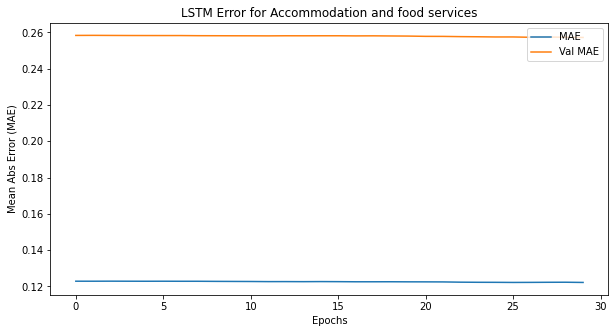

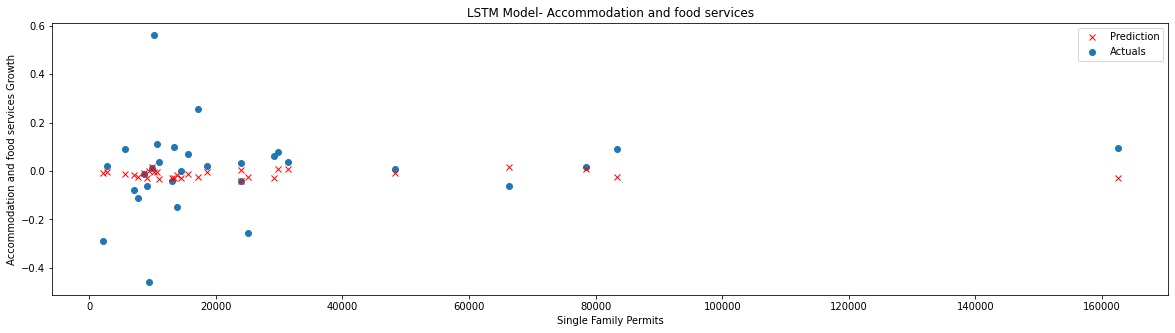

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 485us/sample - loss: 0.0214 - mae: 0.1239
Epoch 2/30
3861/3861 [==============================] - 1s 353us/sample - loss: 0.0214 - mae: 0.1238
Epoch 3/30
3861/3861 [==============================] - 1s 333us/sample - loss: 0.0214 - mae: 0.1237
Epoch 4/30
3861/3861 [==============================] - 1s 321us/sample - loss: 0.0214 - mae: 0.1236
Epoch 5/30
3861/3861 [==============================] - 1s 336us/sample - loss: 0.0213 - mae: 0.1231
Epoch 6/30
3861/3861 [==============================] - 1s 335us/sample - loss: 0.0213 - mae: 0.1229
Epoch 7/30
3861/3861 [==============================] - 1s 335us/sample - loss: 0.0213 - mae: 0.1225
Epoch 8/30
3861/3861 [==============================] - 1s 334us/sample - loss: 0.0212 - mae: 0.1222
Epoch 9/30
3861/3861 [==============================] - 1s 336us/sample - loss: 0.0212 - mae: 0.1218
Epoch 10/30
3861/3861 [==============================] - 1s 339us/sam

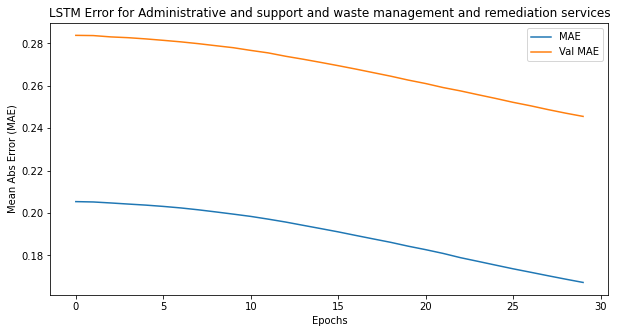

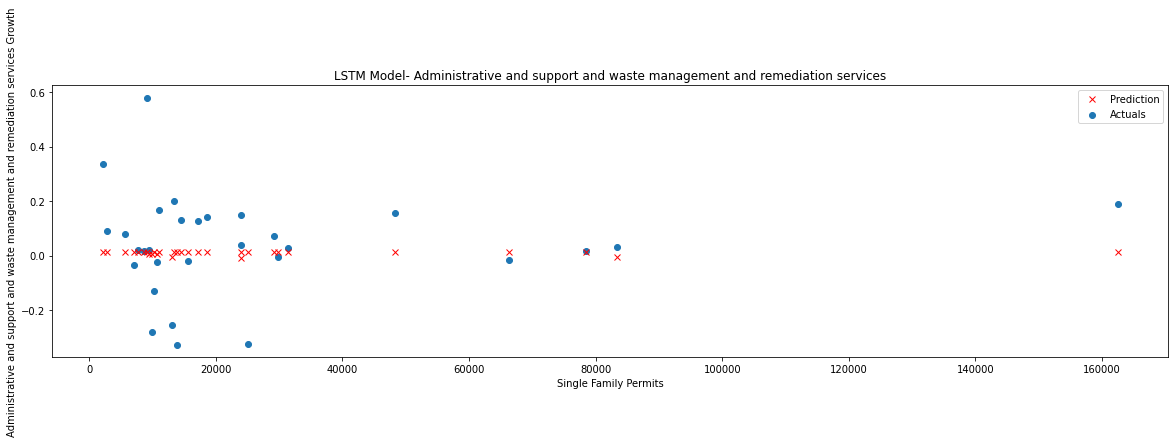

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 429us/sample - loss: 0.0289 - mae: 0.1638
Epoch 2/30
3861/3861 [==============================] - 1s 330us/sample - loss: 0.0286 - mae: 0.1622
Epoch 3/30
3861/3861 [==============================] - 1s 331us/sample - loss: 0.0282 - mae: 0.1608
Epoch 4/30
3861/3861 [==============================] - 1s 312us/sample - loss: 0.0279 - mae: 0.1595
Epoch 5/30
3861/3861 [==============================] - 1s 326us/sample - loss: 0.0276 - mae: 0.1583
Epoch 6/30
3861/3861 [==============================] - 1s 322us/sample - loss: 0.0274 - mae: 0.1573
Epoch 7/30
3861/3861 [==============================] - 1s 326us/sample - loss: 0.0272 - mae: 0.1566
Epoch 8/30
3861/3861 [==============================] - 1s 328us/sample - loss: 0.0270 - mae: 0.1561
Epoch 9/30
3861/3861 [==============================] - 1s 323us/sample - loss: 0.0269 - mae: 0.1558
Epoch 10/30
3861/3861 [==============================] - 1s 335us/sam

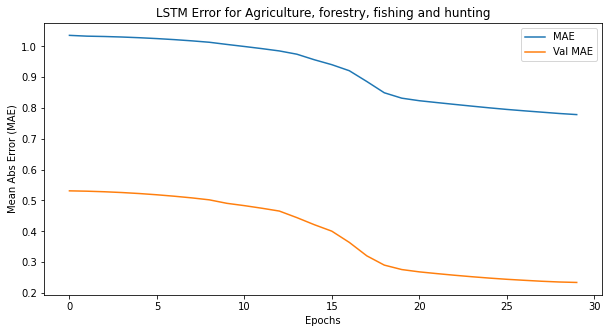

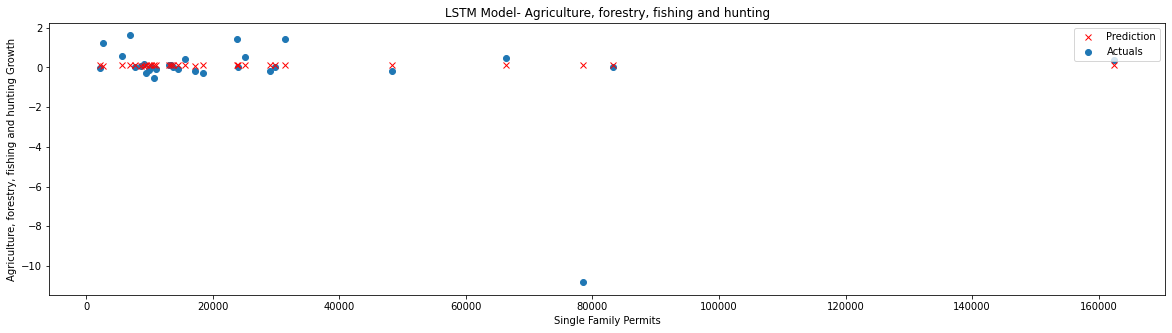

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 424us/sample - loss: 0.5386 - mae: 0.7966
Epoch 2/30
3861/3861 [==============================] - 1s 319us/sample - loss: 0.5378 - mae: 0.7933
Epoch 3/30
3861/3861 [==============================] - 1s 312us/sample - loss: 0.5373 - mae: 0.7908
Epoch 4/30
3861/3861 [==============================] - 1s 322us/sample - loss: 0.5370 - mae: 0.7890
Epoch 5/30
3861/3861 [==============================] - 1s 312us/sample - loss: 0.5370 - mae: 0.7883
Epoch 6/30
3861/3861 [==============================] - 1s 307us/sample - loss: 0.5374 - mae: 0.7896
Epoch 7/30
3861/3861 [==============================] - 1s 312us/sample - loss: 0.5382 - mae: 0.7935
Epoch 8/30
3861/3861 [==============================] - 1s 320us/sample - loss: 0.5396 - mae: 0.7985
Epoch 9/30
3861/3861 [==============================] - 1s 317us/sample - loss: 0.5408 - mae: 0.8030
Epoch 10/30
3861/3861 [==============================] - 1s 308us/sam

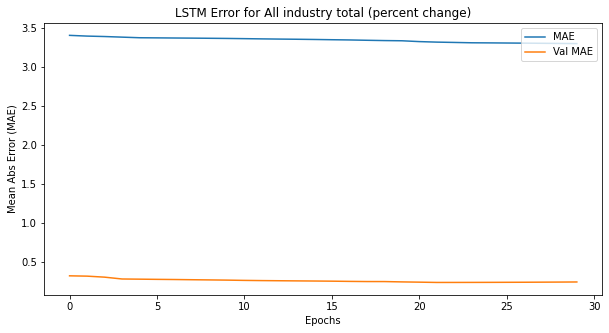

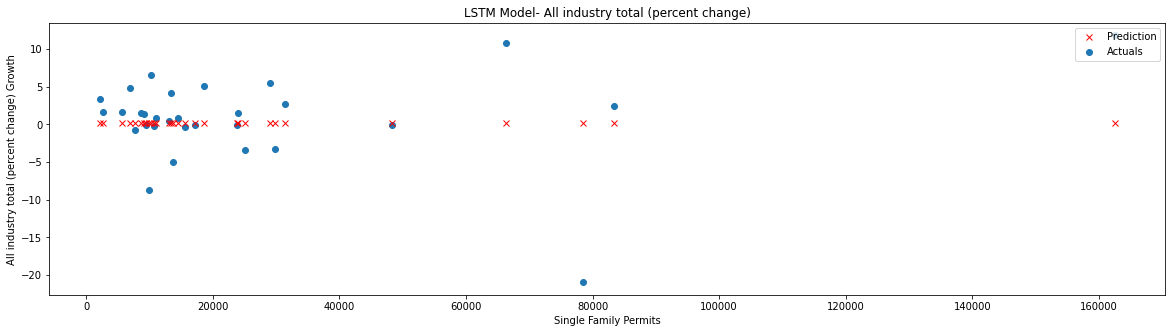

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 392us/sample - loss: 2.8017 - mae: 3.2659
Epoch 2/30
3861/3861 [==============================] - 1s 304us/sample - loss: 2.7993 - mae: 3.2634
Epoch 3/30
3861/3861 [==============================] - 1s 307us/sample - loss: 2.7968 - mae: 3.2607
Epoch 4/30
3861/3861 [==============================] - 1s 310us/sample - loss: 2.7940 - mae: 3.2578
Epoch 5/30
3861/3861 [==============================] - 1s 313us/sample - loss: 2.7912 - mae: 3.2549
Epoch 6/30
3861/3861 [==============================] - 1s 310us/sample - loss: 2.7888 - mae: 3.2524
Epoch 7/30
3861/3861 [==============================] - 1s 307us/sample - loss: 2.7866 - mae: 3.2500
Epoch 8/30
3861/3861 [==============================] - 1s 307us/sample - loss: 2.7842 - mae: 3.2476
Epoch 9/30
3861/3861 [==============================] - 1s 297us/sample - loss: 2.7818 - mae: 3.2452
Epoch 10/30
3861/3861 [==============================] - 1s 312us/sam

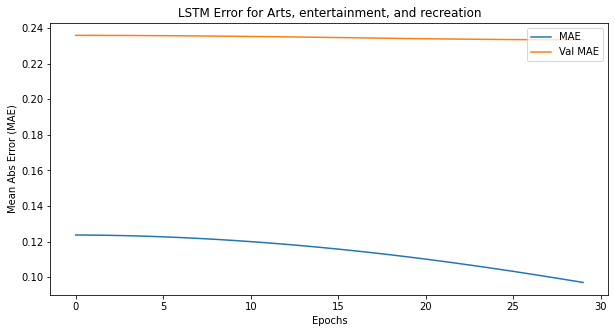

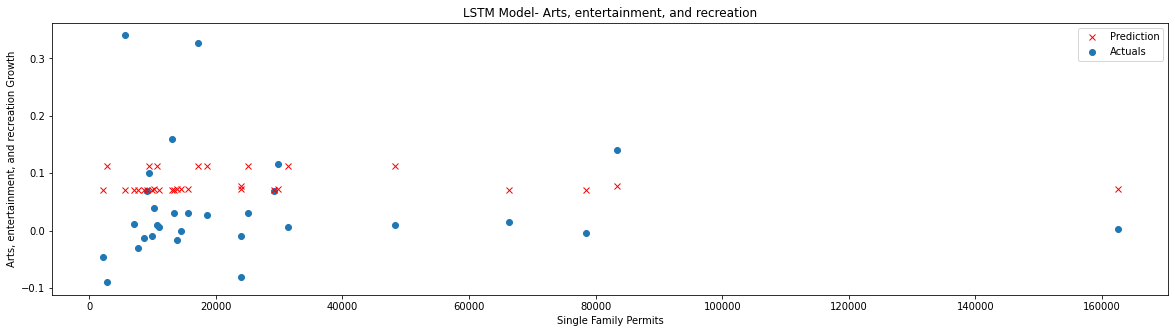

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 417us/sample - loss: 0.0125 - mae: 0.0968
Epoch 2/30
3861/3861 [==============================] - 1s 302us/sample - loss: 0.0123 - mae: 0.0949
Epoch 3/30
3861/3861 [==============================] - 1s 300us/sample - loss: 0.0122 - mae: 0.0929
Epoch 4/30
3861/3861 [==============================] - 1s 300us/sample - loss: 0.0120 - mae: 0.0909
Epoch 5/30
3861/3861 [==============================] - 1s 305us/sample - loss: 0.0118 - mae: 0.0889
Epoch 6/30
3861/3861 [==============================] - 1s 297us/sample - loss: 0.0117 - mae: 0.0869
Epoch 7/30
3861/3861 [==============================] - 1s 305us/sample - loss: 0.0115 - mae: 0.0850
Epoch 8/30
3861/3861 [==============================] - 1s 302us/sample - loss: 0.0114 - mae: 0.0830
Epoch 9/30
3861/3861 [==============================] - 1s 302us/sample - loss: 0.0112 - mae: 0.0811
Epoch 10/30
3861/3861 [==============================] - 1s 299us/sam

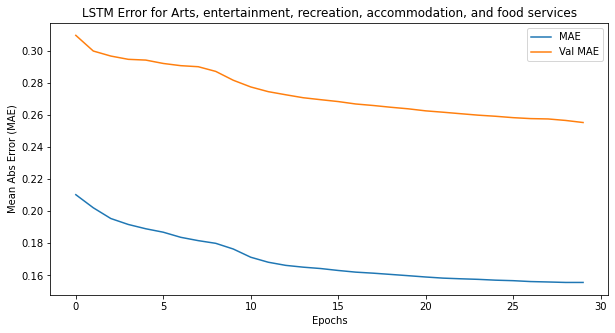

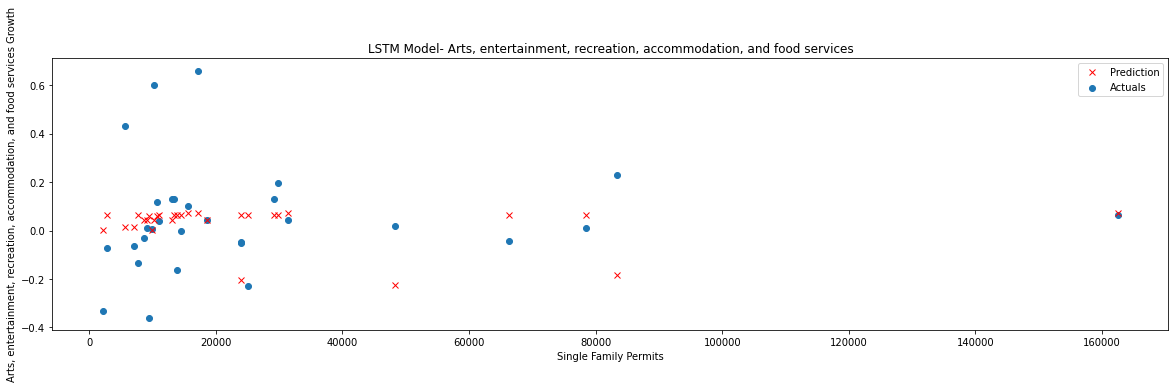

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 407us/sample - loss: 0.0347 - mae: 0.1593
Epoch 2/30
3861/3861 [==============================] - 1s 309us/sample - loss: 0.0347 - mae: 0.1595
Epoch 3/30
3861/3861 [==============================] - 1s 298us/sample - loss: 0.0349 - mae: 0.1602
Epoch 4/30
3861/3861 [==============================] - 1s 304us/sample - loss: 0.0353 - mae: 0.1621
Epoch 5/30
3861/3861 [==============================] - 1s 297us/sample - loss: 0.0358 - mae: 0.1652
Epoch 6/30
3861/3861 [==============================] - 1s 306us/sample - loss: 0.0364 - mae: 0.1679
Epoch 7/30
3861/3861 [==============================] - 1s 302us/sample - loss: 0.0368 - mae: 0.1698
Epoch 8/30
3861/3861 [==============================] - 1s 307us/sample - loss: 0.0375 - mae: 0.1730
Epoch 9/30
3861/3861 [==============================] - 1s 298us/sample - loss: 0.0373 - mae: 0.1732
Epoch 10/30
3861/3861 [==============================] - 1s 300us/sam

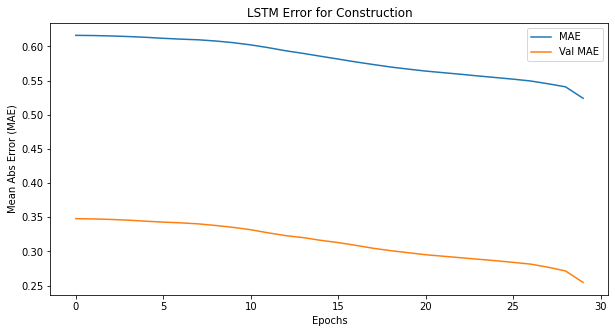

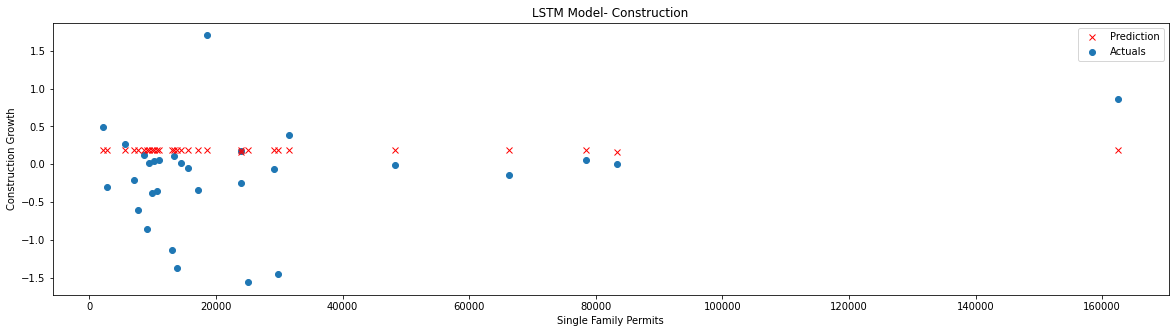

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 410us/sample - loss: 0.2315 - mae: 0.5129
Epoch 2/30
3861/3861 [==============================] - 1s 317us/sample - loss: 0.2301 - mae: 0.5102
Epoch 3/30
3861/3861 [==============================] - 1s 316us/sample - loss: 0.2287 - mae: 0.5075
Epoch 4/30
3861/3861 [==============================] - 1s 324us/sample - loss: 0.2273 - mae: 0.5048
Epoch 5/30
3861/3861 [==============================] - 1s 325us/sample - loss: 0.2259 - mae: 0.5021
Epoch 6/30
3861/3861 [==============================] - 1s 315us/sample - loss: 0.2245 - mae: 0.4994
Epoch 7/30
3861/3861 [==============================] - 1s 321us/sample - loss: 0.2232 - mae: 0.4968
Epoch 8/30
3861/3861 [==============================] - 1s 321us/sample - loss: 0.2218 - mae: 0.4939
Epoch 9/30
3861/3861 [==============================] - 1s 321us/sample - loss: 0.2056 - mae: 0.4632
Epoch 10/30
3861/3861 [==============================] - 1s 341us/sam

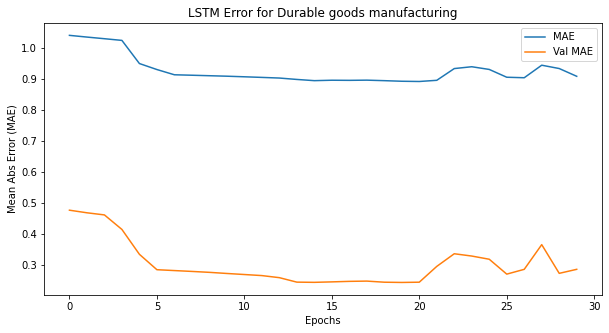

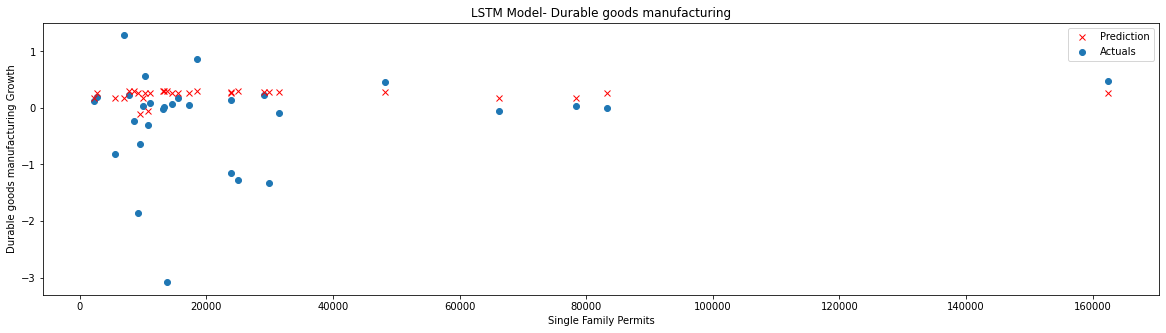

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 408us/sample - loss: 0.5935 - mae: 0.9057
Epoch 2/30
3861/3861 [==============================] - 1s 315us/sample - loss: 0.5933 - mae: 0.9053
Epoch 3/30
3861/3861 [==============================] - 1s 305us/sample - loss: 0.5916 - mae: 0.9013
Epoch 4/30
3861/3861 [==============================] - 1s 307us/sample - loss: 0.5889 - mae: 0.8932
Epoch 5/30
3861/3861 [==============================] - 1s 317us/sample - loss: 0.5880 - mae: 0.8919
Epoch 6/30
3861/3861 [==============================] - 1s 318us/sample - loss: 0.5861 - mae: 0.8838
Epoch 7/30
3861/3861 [==============================] - 1s 317us/sample - loss: 0.5838 - mae: 0.8761
Epoch 8/30
3861/3861 [==============================] - 1s 316us/sample - loss: 0.5846 - mae: 0.8775
Epoch 9/30
3861/3861 [==============================] - 1s 311us/sample - loss: 0.5872 - mae: 0.8829
Epoch 10/30
3861/3861 [==============================] - 1s 312us/sam

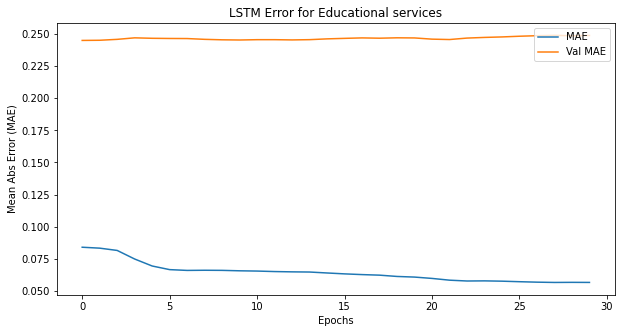

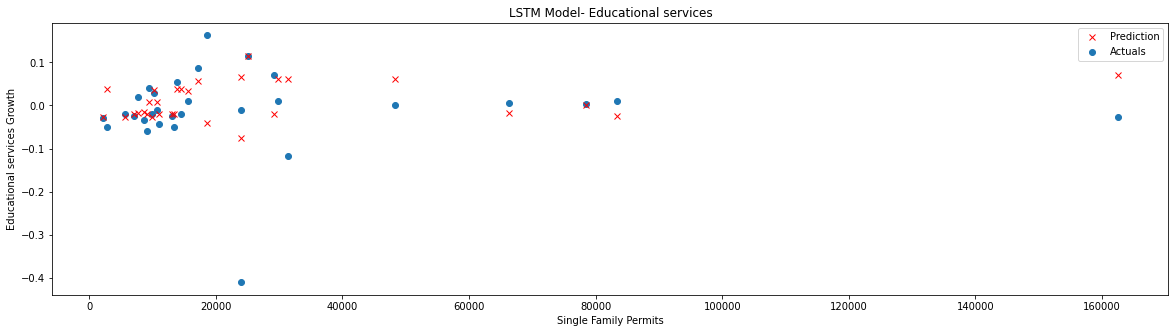

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 414us/sample - loss: 0.0060 - mae: 0.0567
Epoch 2/30
3861/3861 [==============================] - 1s 319us/sample - loss: 0.0060 - mae: 0.0567
Epoch 3/30
3861/3861 [==============================] - 1s 314us/sample - loss: 0.0060 - mae: 0.0567
Epoch 4/30
3861/3861 [==============================] - 1s 313us/sample - loss: 0.0060 - mae: 0.0568
Epoch 5/30
3861/3861 [==============================] - 1s 313us/sample - loss: 0.0059 - mae: 0.0566
Epoch 6/30
3861/3861 [==============================] - 1s 329us/sample - loss: 0.0059 - mae: 0.0565
Epoch 7/30
3861/3861 [==============================] - 1s 324us/sample - loss: 0.0060 - mae: 0.0565
Epoch 8/30
3861/3861 [==============================] - 1s 307us/sample - loss: 0.0060 - mae: 0.0565
Epoch 9/30
3861/3861 [==============================] - 1s 313us/sample - loss: 0.0060 - mae: 0.0567
Epoch 10/30
3861/3861 [==============================] - 1s 312us/sam

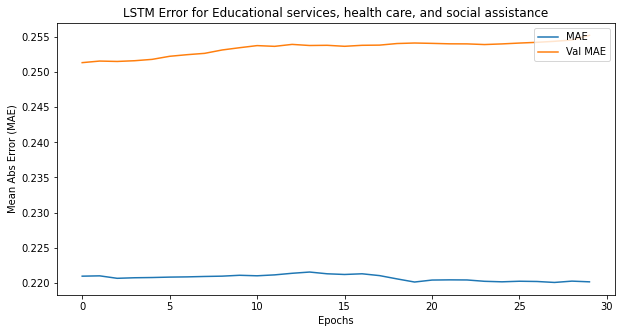

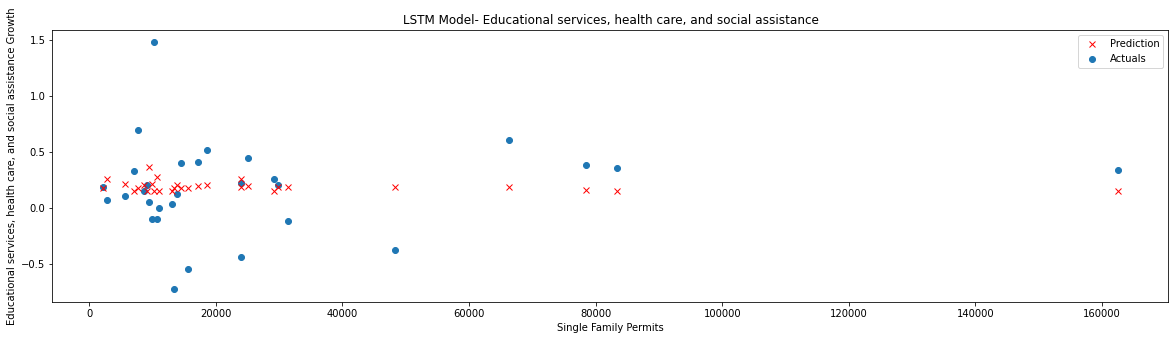

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 429us/sample - loss: 0.0475 - mae: 0.2194
Epoch 2/30
3861/3861 [==============================] - 1s 320us/sample - loss: 0.0475 - mae: 0.2196
Epoch 3/30
3861/3861 [==============================] - 1s 321us/sample - loss: 0.0476 - mae: 0.2199
Epoch 4/30
3861/3861 [==============================] - 1s 312us/sample - loss: 0.0477 - mae: 0.2200
Epoch 5/30
3861/3861 [==============================] - 1s 319us/sample - loss: 0.0476 - mae: 0.2201
Epoch 6/30
3861/3861 [==============================] - 1s 306us/sample - loss: 0.0475 - mae: 0.2197
Epoch 7/30
3861/3861 [==============================] - 1s 307us/sample - loss: 0.0475 - mae: 0.2197
Epoch 8/30
3861/3861 [==============================] - 1s 305us/sample - loss: 0.0475 - mae: 0.2196
Epoch 9/30
3861/3861 [==============================] - 1s 310us/sample - loss: 0.0475 - mae: 0.2196
Epoch 10/30
3861/3861 [==============================] - 1s 307us/sam

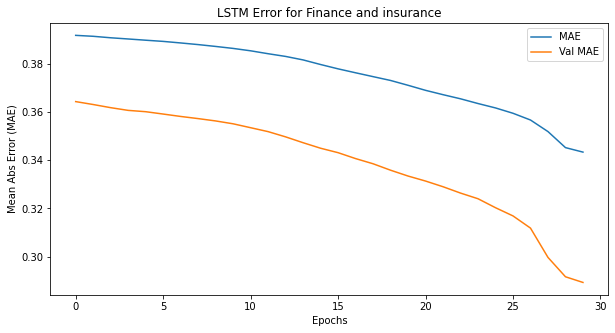

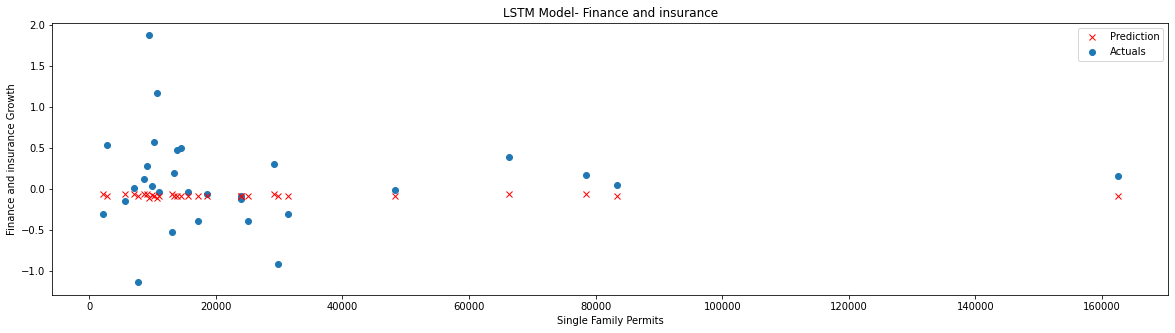

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 495us/sample - loss: 0.1272 - mae: 0.3407
Epoch 2/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.1268 - mae: 0.3394
Epoch 3/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.1264 - mae: 0.3381
Epoch 4/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.1260 - mae: 0.3369
Epoch 5/30
3861/3861 [==============================] - 1s 359us/sample - loss: 0.1256 - mae: 0.3357
Epoch 6/30
3861/3861 [==============================] - 1s 356us/sample - loss: 0.1252 - mae: 0.3347
Epoch 7/30
3861/3861 [==============================] - 1s 355us/sample - loss: 0.1248 - mae: 0.3336
Epoch 8/30
3861/3861 [==============================] - 1s 356us/sample - loss: 0.1244 - mae: 0.3327
Epoch 9/30
3861/3861 [==============================] - 1s 348us/sample - loss: 0.1242 - mae: 0.3319
Epoch 10/30
3861/3861 [==============================] - 1s 357us/sam

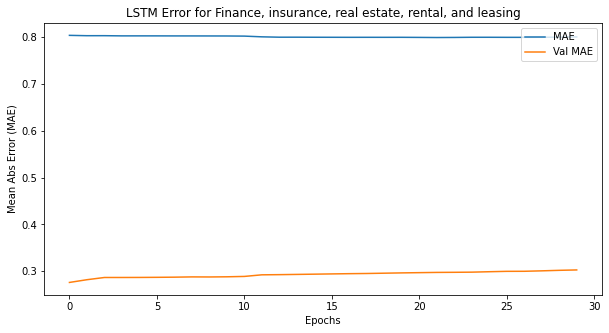

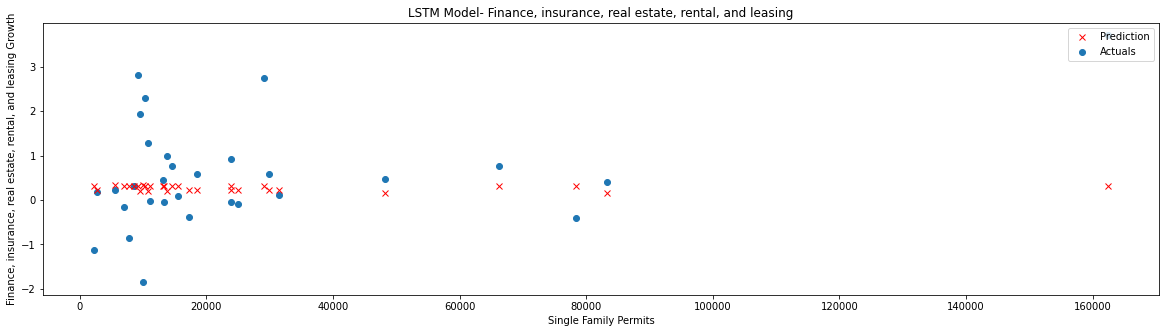

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 489us/sample - loss: 0.4676 - mae: 0.7953
Epoch 2/30
3861/3861 [==============================] - 1s 365us/sample - loss: 0.4675 - mae: 0.7954
Epoch 3/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.4683 - mae: 0.7975
Epoch 4/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.4693 - mae: 0.7986
Epoch 5/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.4696 - mae: 0.7989
Epoch 6/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.4692 - mae: 0.7983
Epoch 7/30
3861/3861 [==============================] - 1s 367us/sample - loss: 0.4688 - mae: 0.7981
Epoch 8/30
3861/3861 [==============================] - 1s 365us/sample - loss: 0.4673 - mae: 0.7974
Epoch 9/30
3861/3861 [==============================] - 1s 360us/sample - loss: 0.4674 - mae: 0.7980
Epoch 10/30
3861/3861 [==============================] - 1s 368us/sam

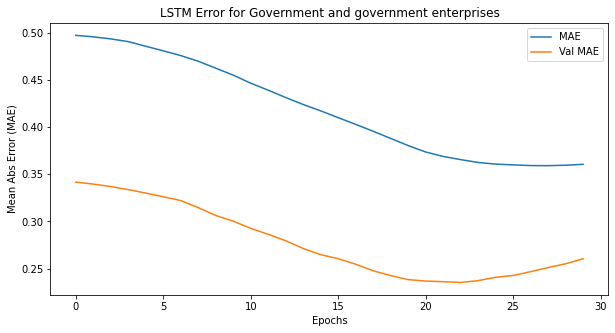

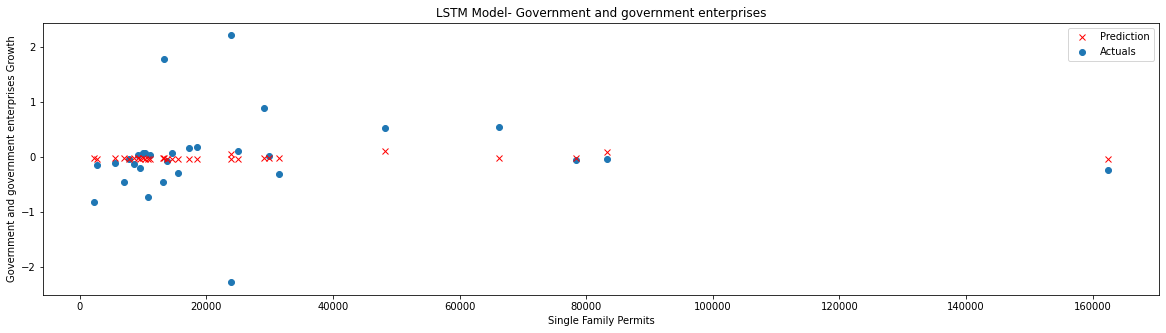

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 510us/sample - loss: 0.1486 - mae: 0.3602
Epoch 2/30
3861/3861 [==============================] - 1s 371us/sample - loss: 0.1495 - mae: 0.3627
Epoch 3/30
3861/3861 [==============================] - 1s 367us/sample - loss: 0.1505 - mae: 0.3653
Epoch 4/30
3861/3861 [==============================] - 1s 370us/sample - loss: 0.1514 - mae: 0.3680
Epoch 5/30
3861/3861 [==============================] - 1s 367us/sample - loss: 0.1522 - mae: 0.3703
Epoch 6/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.1532 - mae: 0.3735
Epoch 7/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.1542 - mae: 0.3763
Epoch 8/30
3861/3861 [==============================] - 1s 366us/sample - loss: 0.1553 - mae: 0.3794
Epoch 9/30
3861/3861 [==============================] - 1s 367us/sample - loss: 0.1562 - mae: 0.3821
Epoch 10/30
3861/3861 [==============================] - 1s 365us/sam

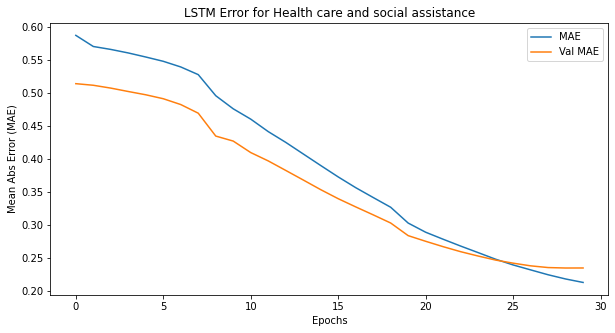

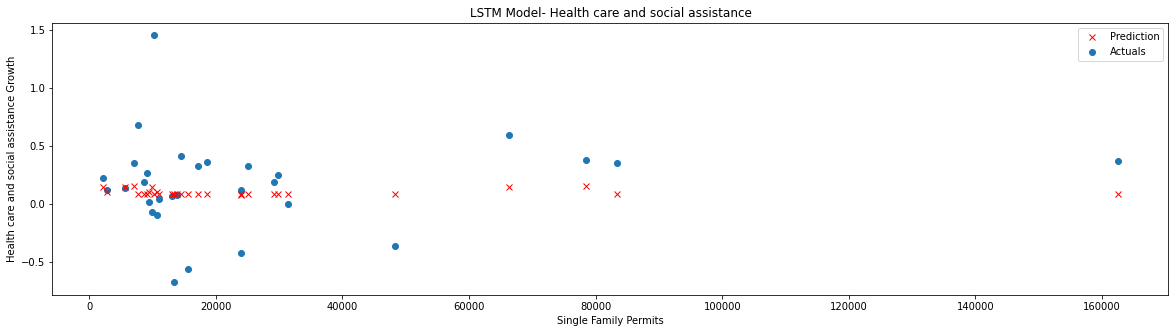

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 531us/sample - loss: 0.0422 - mae: 0.2077
Epoch 2/30
3861/3861 [==============================] - 1s 384us/sample - loss: 0.0410 - mae: 0.2052
Epoch 3/30
3861/3861 [==============================] - 1s 379us/sample - loss: 0.0401 - mae: 0.2041
Epoch 4/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.0398 - mae: 0.2050
Epoch 5/30
3861/3861 [==============================] - 1s 367us/sample - loss: 0.0409 - mae: 0.2101
Epoch 6/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.0420 - mae: 0.2144
Epoch 7/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.0437 - mae: 0.2221
Epoch 8/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.0447 - mae: 0.2255
Epoch 9/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.0456 - mae: 0.2292
Epoch 10/30
3861/3861 [==============================] - 1s 372us/sam

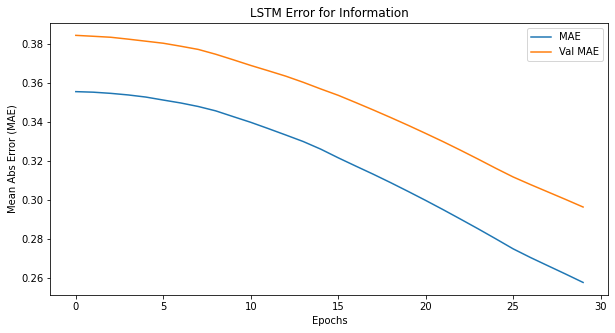

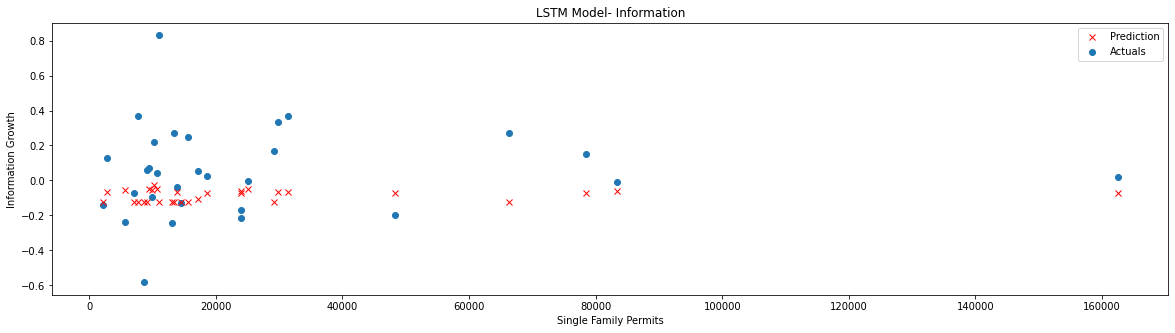

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 522us/sample - loss: 0.0728 - mae: 0.2557
Epoch 2/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.0715 - mae: 0.2506
Epoch 3/30
3861/3861 [==============================] - 1s 371us/sample - loss: 0.0703 - mae: 0.2460
Epoch 4/30
3861/3861 [==============================] - 1s 374us/sample - loss: 0.0693 - mae: 0.2418
Epoch 5/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.0683 - mae: 0.2377
Epoch 6/30
3861/3861 [==============================] - 1s 374us/sample - loss: 0.0673 - mae: 0.2336
Epoch 7/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.0663 - mae: 0.2296
Epoch 8/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.0653 - mae: 0.2255
Epoch 9/30
3861/3861 [==============================] - 1s 365us/sample - loss: 0.0644 - mae: 0.2221
Epoch 10/30
3861/3861 [==============================] - 1s 371us/sam

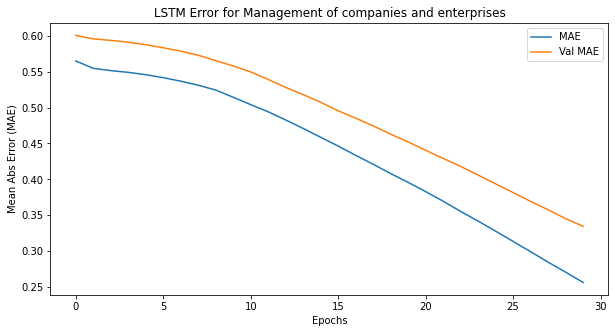

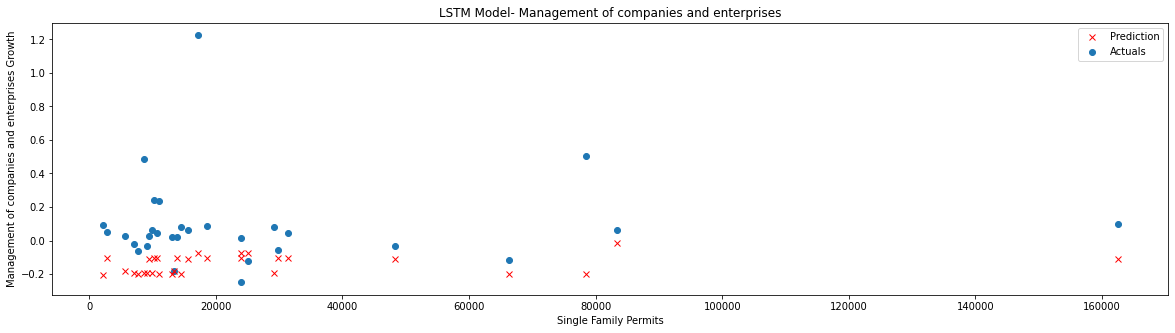

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 525us/sample - loss: 0.0576 - mae: 0.2401
Epoch 2/30
3861/3861 [==============================] - 1s 375us/sample - loss: 0.0538 - mae: 0.2234
Epoch 3/30
3861/3861 [==============================] - 1s 369us/sample - loss: 0.0504 - mae: 0.2079
Epoch 4/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.0474 - mae: 0.1925
Epoch 5/30
3861/3861 [==============================] - 1s 365us/sample - loss: 0.0447 - mae: 0.1779
Epoch 6/30
3861/3861 [==============================] - 1s 370us/sample - loss: 0.0426 - mae: 0.1661
Epoch 7/30
3861/3861 [==============================] - 1s 374us/sample - loss: 0.0410 - mae: 0.1569
Epoch 8/30
3861/3861 [==============================] - 1s 374us/sample - loss: 0.0398 - mae: 0.1498
Epoch 9/30
3861/3861 [==============================] - 1s 369us/sample - loss: 0.0389 - mae: 0.1466
Epoch 10/30
3861/3861 [==============================] - 1s 371us/sam

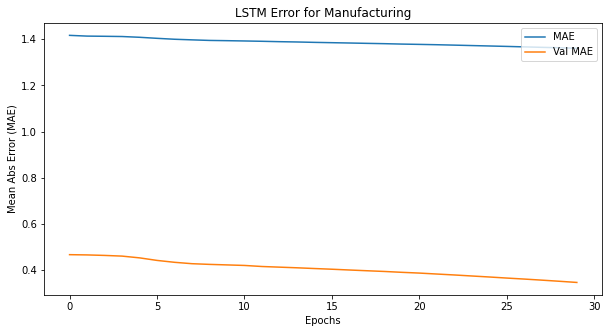

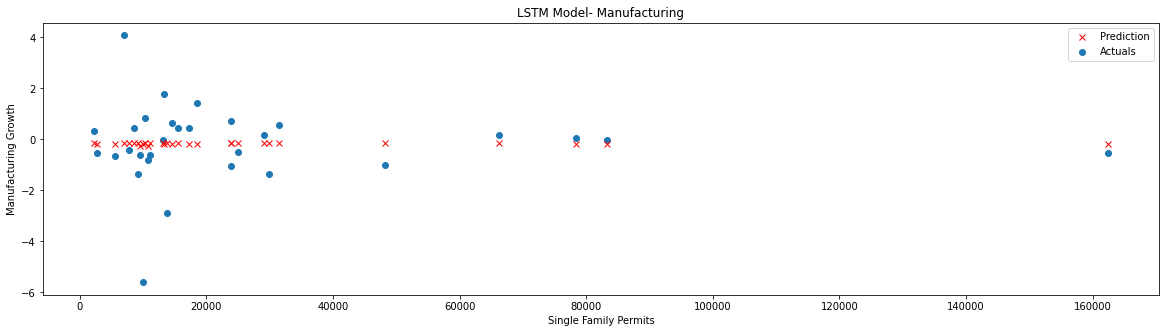

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 516us/sample - loss: 0.9642 - mae: 1.3415
Epoch 2/30
3861/3861 [==============================] - 1s 371us/sample - loss: 0.9621 - mae: 1.3382
Epoch 3/30
3861/3861 [==============================] - 1s 366us/sample - loss: 0.9598 - mae: 1.3347
Epoch 4/30
3861/3861 [==============================] - 1s 380us/sample - loss: 0.9586 - mae: 1.3325
Epoch 5/30
3861/3861 [==============================] - 1s 369us/sample - loss: 0.9564 - mae: 1.3290
Epoch 6/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.9547 - mae: 1.3261
Epoch 7/30
3861/3861 [==============================] - 1s 373us/sample - loss: 0.9531 - mae: 1.3234
Epoch 8/30
3861/3861 [==============================] - 1s 366us/sample - loss: 0.9514 - mae: 1.3205
Epoch 9/30
3861/3861 [==============================] - 1s 371us/sample - loss: 0.9494 - mae: 1.3174
Epoch 10/30
3861/3861 [==============================] - 1s 371us/sam

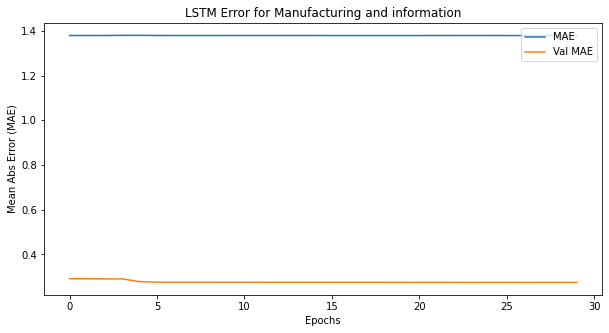

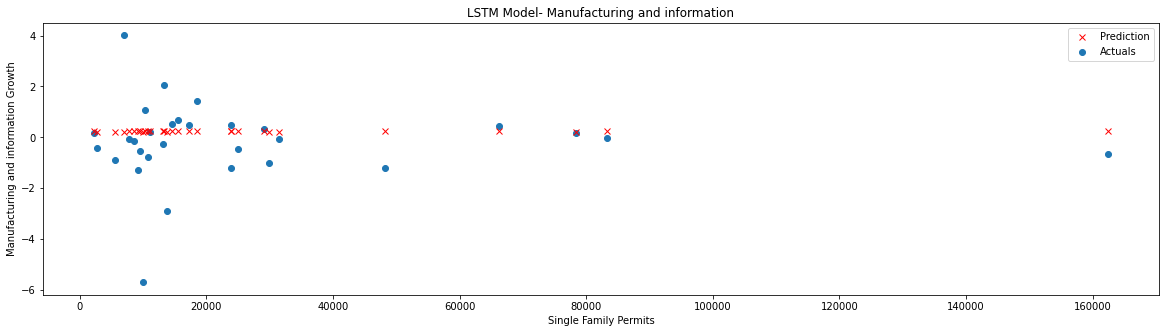

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 526us/sample - loss: 0.9853 - mae: 1.3579
Epoch 2/30
3861/3861 [==============================] - 1s 375us/sample - loss: 0.9854 - mae: 1.3580
Epoch 3/30
3861/3861 [==============================] - 1s 374us/sample - loss: 0.9854 - mae: 1.3580
Epoch 4/30
3861/3861 [==============================] - 1s 371us/sample - loss: 0.9854 - mae: 1.3581
Epoch 5/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.9854 - mae: 1.3581
Epoch 6/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.9854 - mae: 1.3581
Epoch 7/30
3861/3861 [==============================] - 1s 366us/sample - loss: 0.9854 - mae: 1.3581
Epoch 8/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.9854 - mae: 1.3580
Epoch 9/30
3861/3861 [==============================] - 1s 365us/sample - loss: 0.9854 - mae: 1.3580
Epoch 10/30
3861/3861 [==============================] - 1s 371us/sam

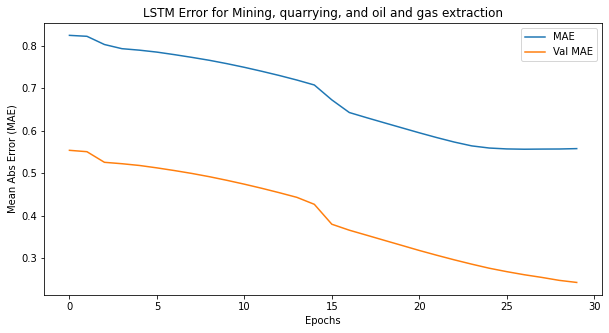

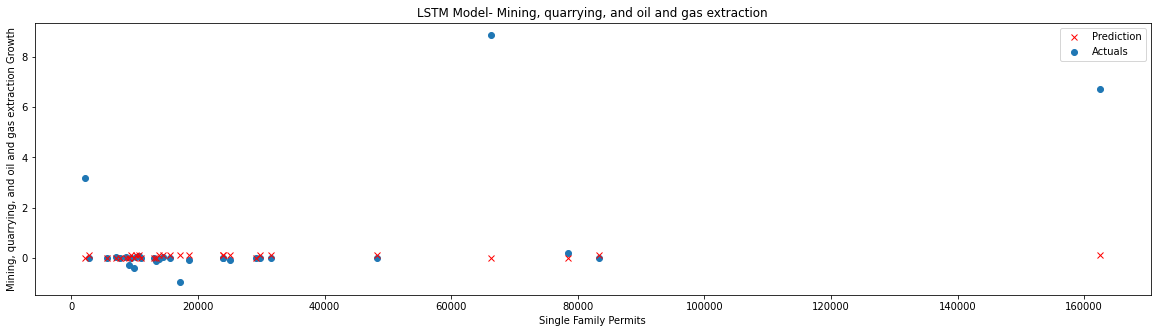

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 518us/sample - loss: 0.3924 - mae: 0.5562
Epoch 2/30
3861/3861 [==============================] - 1s 373us/sample - loss: 0.3938 - mae: 0.5682
Epoch 3/30
3861/3861 [==============================] - 1s 366us/sample - loss: 0.3955 - mae: 0.5814
Epoch 4/30
3861/3861 [==============================] - 1s 376us/sample - loss: 0.3976 - mae: 0.5957
Epoch 5/30
3861/3861 [==============================] - 1s 376us/sample - loss: 0.4001 - mae: 0.6102
Epoch 6/30
3861/3861 [==============================] - 1s 369us/sample - loss: 0.4028 - mae: 0.6244
Epoch 7/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.4057 - mae: 0.6382
Epoch 8/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.4085 - mae: 0.6502
Epoch 9/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.4098 - mae: 0.6549
Epoch 10/30
3861/3861 [==============================] - 1s 370us/sam

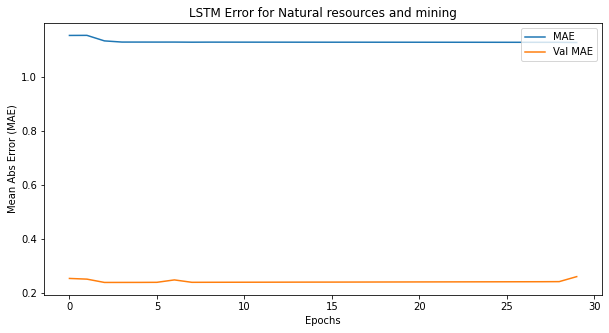

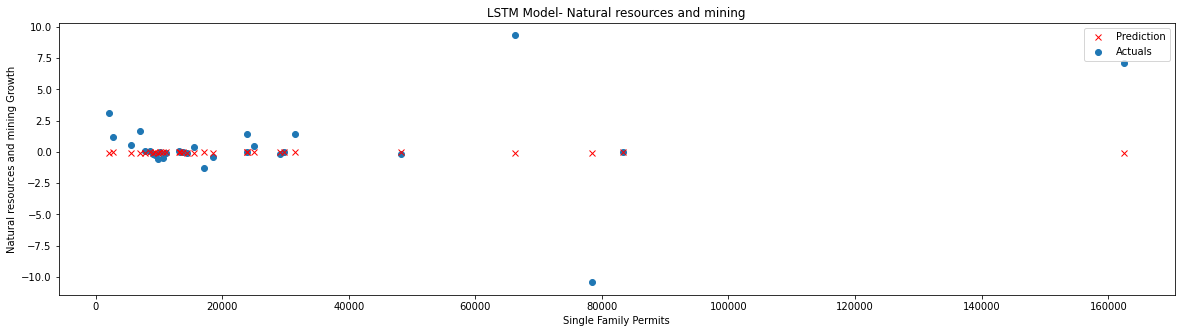

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 494us/sample - loss: 0.8743 - mae: 1.1660
Epoch 2/30
3861/3861 [==============================] - 1s 367us/sample - loss: 0.8745 - mae: 1.1668
Epoch 3/30
3861/3861 [==============================] - 1s 373us/sample - loss: 0.8745 - mae: 1.1666
Epoch 4/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.8744 - mae: 1.1686
Epoch 5/30
3861/3861 [==============================] - 1s 369us/sample - loss: 0.8761 - mae: 1.1778
Epoch 6/30
3861/3861 [==============================] - 1s 370us/sample - loss: 0.8757 - mae: 1.1785
Epoch 7/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.8757 - mae: 1.1784
Epoch 8/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.8756 - mae: 1.1782
Epoch 9/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.8753 - mae: 1.1771
Epoch 10/30
3861/3861 [==============================] - 1s 365us/sam

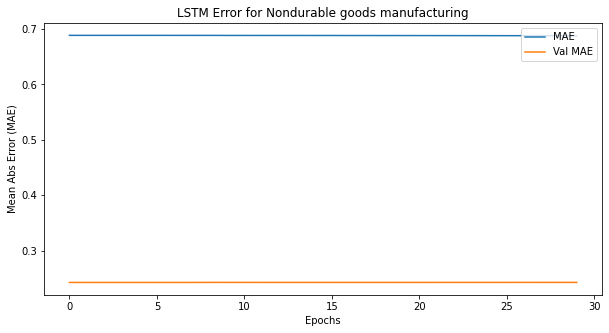

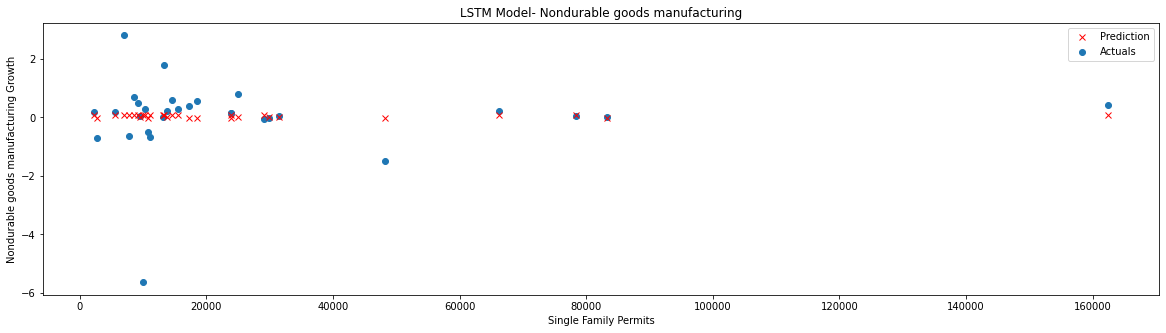

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 492us/sample - loss: 0.4163 - mae: 0.6793
Epoch 2/30
3861/3861 [==============================] - 1s 371us/sample - loss: 0.4162 - mae: 0.6793
Epoch 3/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.4162 - mae: 0.6792
Epoch 4/30
3861/3861 [==============================] - 1s 359us/sample - loss: 0.4162 - mae: 0.6792
Epoch 5/30
3861/3861 [==============================] - 1s 357us/sample - loss: 0.4162 - mae: 0.6791
Epoch 6/30
3861/3861 [==============================] - 1s 356us/sample - loss: 0.4162 - mae: 0.6791
Epoch 7/30
3861/3861 [==============================] - 1s 354us/sample - loss: 0.4162 - mae: 0.6790
Epoch 8/30
3861/3861 [==============================] - 1s 356us/sample - loss: 0.4162 - mae: 0.6790
Epoch 9/30
3861/3861 [==============================] - 1s 353us/sample - loss: 0.4161 - mae: 0.6789
Epoch 10/30
3861/3861 [==============================] - 1s 363us/sam

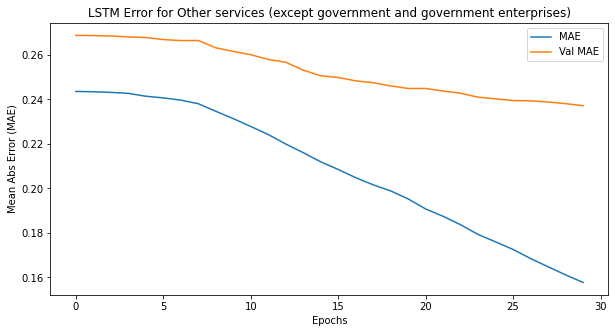

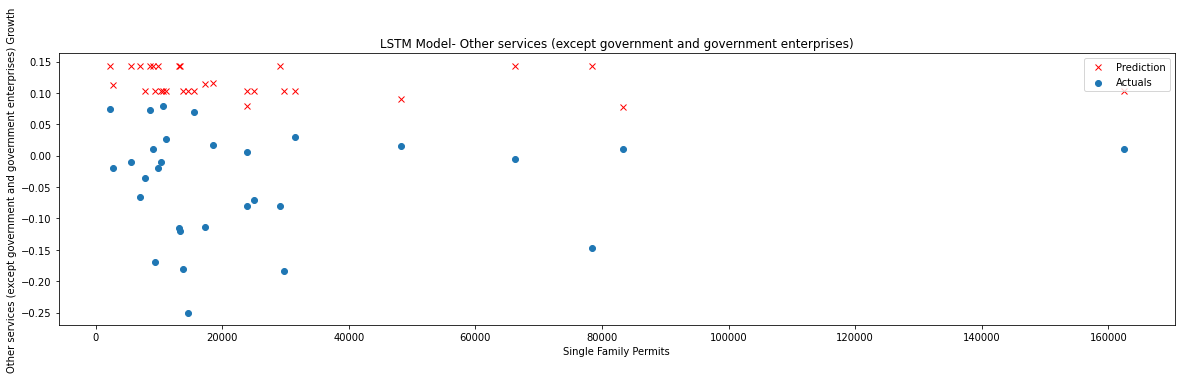

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 504us/sample - loss: 0.0178 - mae: 0.1527
Epoch 2/30
3861/3861 [==============================] - 1s 357us/sample - loss: 0.0169 - mae: 0.1477
Epoch 3/30
3861/3861 [==============================] - 1s 354us/sample - loss: 0.0162 - mae: 0.1429
Epoch 4/30
3861/3861 [==============================] - 1s 357us/sample - loss: 0.0155 - mae: 0.1383
Epoch 5/30
3861/3861 [==============================] - 1s 359us/sample - loss: 0.0149 - mae: 0.1343
Epoch 6/30
3861/3861 [==============================] - 1s 359us/sample - loss: 0.0142 - mae: 0.1299
Epoch 7/30
3861/3861 [==============================] - 1s 349us/sample - loss: 0.0136 - mae: 0.1259
Epoch 8/30
3861/3861 [==============================] - 1s 354us/sample - loss: 0.0132 - mae: 0.1227
Epoch 9/30
3861/3861 [==============================] - 1s 352us/sample - loss: 0.0127 - mae: 0.1196
Epoch 10/30
3861/3861 [==============================] - 1s 355us/sam

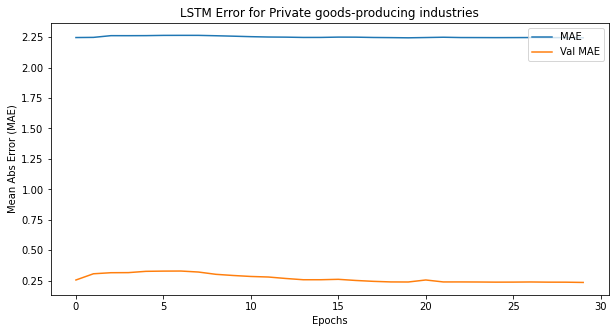

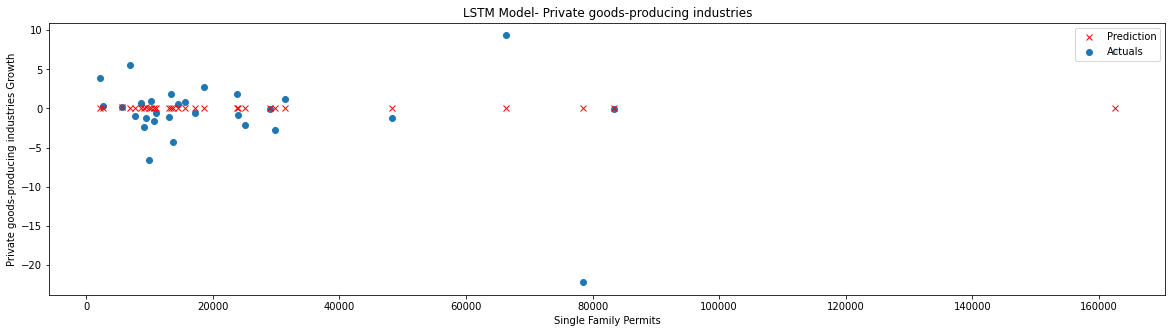

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 466us/sample - loss: 1.8366 - mae: 2.2562
Epoch 2/30
3861/3861 [==============================] - 1s 354us/sample - loss: 1.8373 - mae: 2.2570
Epoch 3/30
3861/3861 [==============================] - 1s 352us/sample - loss: 1.8370 - mae: 2.2565
Epoch 4/30
3861/3861 [==============================] - 1s 359us/sample - loss: 1.8377 - mae: 2.2580
Epoch 5/30
3861/3861 [==============================] - 1s 358us/sample - loss: 1.8385 - mae: 2.2589
Epoch 6/30
3861/3861 [==============================] - 1s 362us/sample - loss: 1.8392 - mae: 2.2598
Epoch 7/30
3861/3861 [==============================] - 1s 361us/sample - loss: 1.8376 - mae: 2.2573
Epoch 8/30
3861/3861 [==============================] - 1s 353us/sample - loss: 1.8388 - mae: 2.2589
Epoch 9/30
3861/3861 [==============================] - 1s 355us/sample - loss: 1.8366 - mae: 2.2562
Epoch 10/30
3861/3861 [==============================] - 1s 354us/sam

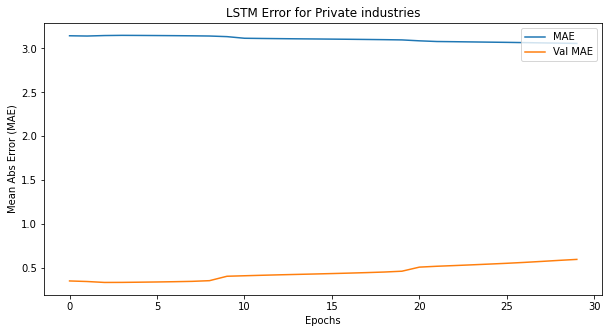

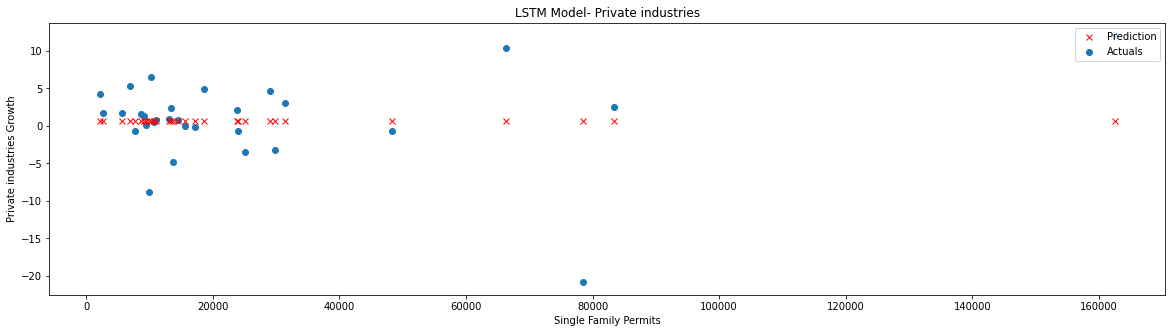

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 467us/sample - loss: 2.5757 - mae: 3.0310
Epoch 2/30
3861/3861 [==============================] - 1s 352us/sample - loss: 2.5725 - mae: 3.0274
Epoch 3/30
3861/3861 [==============================] - 1s 353us/sample - loss: 2.5688 - mae: 3.0234
Epoch 4/30
3861/3861 [==============================] - 1s 353us/sample - loss: 2.5654 - mae: 3.0198
Epoch 5/30
3861/3861 [==============================] - 1s 355us/sample - loss: 2.5622 - mae: 3.0161
Epoch 6/30
3861/3861 [==============================] - 1s 348us/sample - loss: 2.5589 - mae: 3.0126
Epoch 7/30
3861/3861 [==============================] - 1s 358us/sample - loss: 2.5555 - mae: 3.0088
Epoch 8/30
3861/3861 [==============================] - 1s 347us/sample - loss: 2.5518 - mae: 3.0047
Epoch 9/30
3861/3861 [==============================] - 1s 350us/sample - loss: 2.5484 - mae: 3.0010
Epoch 10/30
3861/3861 [==============================] - 1s 350us/sam

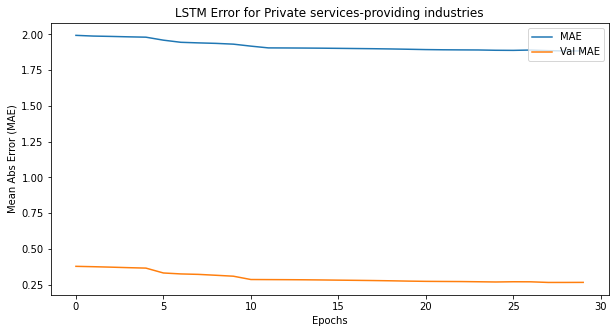

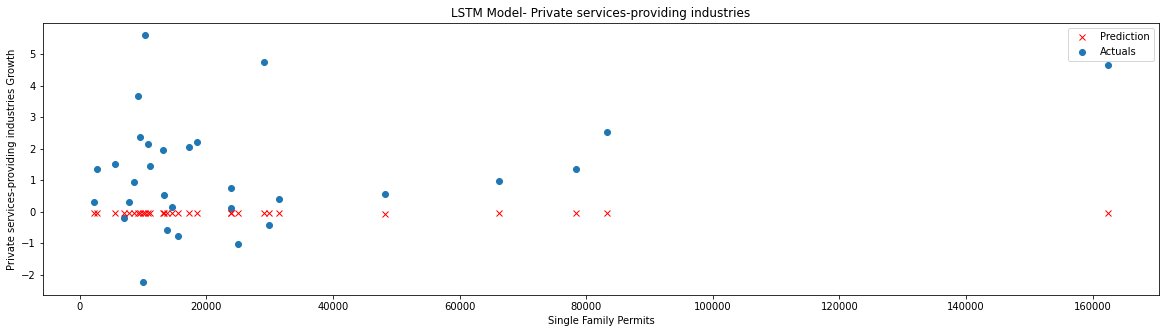

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 453us/sample - loss: 1.4096 - mae: 1.8482
Epoch 2/30
3861/3861 [==============================] - 1s 351us/sample - loss: 1.4084 - mae: 1.8469
Epoch 3/30
3861/3861 [==============================] - 1s 351us/sample - loss: 1.4067 - mae: 1.8451
Epoch 4/30
3861/3861 [==============================] - 1s 343us/sample - loss: 1.4050 - mae: 1.8433
Epoch 5/30
3861/3861 [==============================] - 1s 348us/sample - loss: 1.4032 - mae: 1.8413
Epoch 6/30
3861/3861 [==============================] - 1s 343us/sample - loss: 1.4015 - mae: 1.8394
Epoch 7/30
3861/3861 [==============================] - 1s 350us/sample - loss: 1.3996 - mae: 1.8373
Epoch 8/30
3861/3861 [==============================] - 1s 354us/sample - loss: 1.3977 - mae: 1.8352
Epoch 9/30
3861/3861 [==============================] - 1s 353us/sample - loss: 1.3957 - mae: 1.8330
Epoch 10/30
3861/3861 [==============================] - 1s 353us/sam

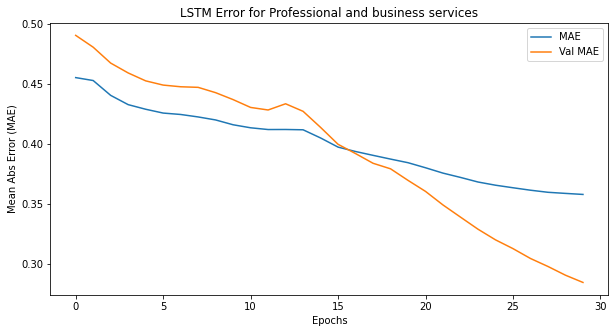

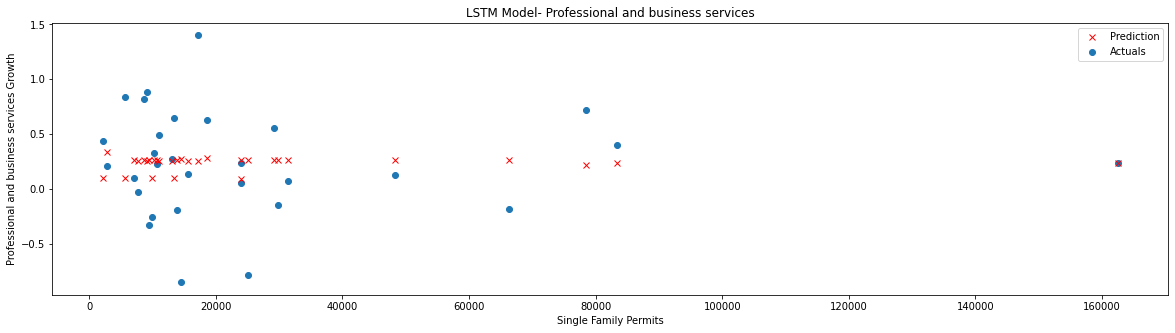

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 452us/sample - loss: 0.1215 - mae: 0.3578
Epoch 2/30
3861/3861 [==============================] - 1s 348us/sample - loss: 0.1216 - mae: 0.3576
Epoch 3/30
3861/3861 [==============================] - 1s 347us/sample - loss: 0.1218 - mae: 0.3576
Epoch 4/30
3861/3861 [==============================] - 1s 354us/sample - loss: 0.1222 - mae: 0.3582
Epoch 5/30
3861/3861 [==============================] - 1s 352us/sample - loss: 0.1227 - mae: 0.3592
Epoch 6/30
3861/3861 [==============================] - 1s 342us/sample - loss: 0.1234 - mae: 0.3607
Epoch 7/30
3861/3861 [==============================] - 1s 343us/sample - loss: 0.1243 - mae: 0.3626
Epoch 8/30
3861/3861 [==============================] - 1s 348us/sample - loss: 0.1252 - mae: 0.3647
Epoch 9/30
3861/3861 [==============================] - 1s 344us/sample - loss: 0.1264 - mae: 0.3673
Epoch 10/30
3861/3861 [==============================] - 1s 347us/sam

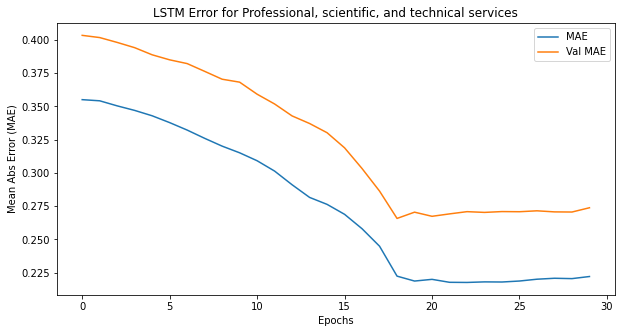

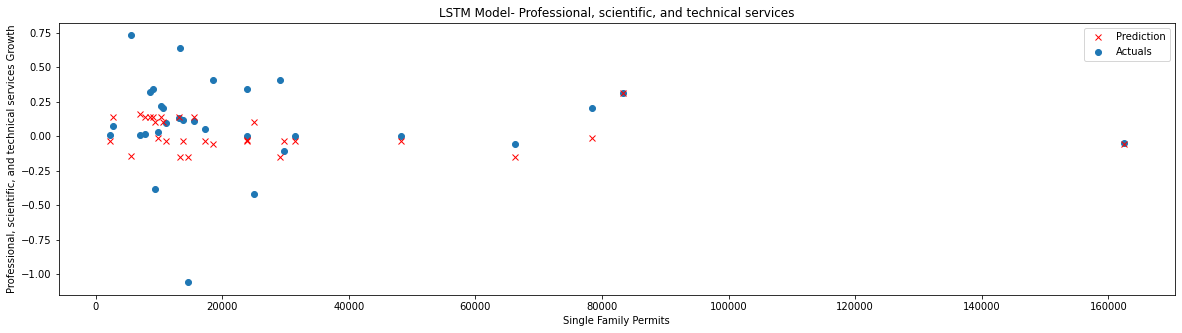

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 452us/sample - loss: 0.0498 - mae: 0.2256
Epoch 2/30
3861/3861 [==============================] - 1s 341us/sample - loss: 0.0500 - mae: 0.2264
Epoch 3/30
3861/3861 [==============================] - 1s 354us/sample - loss: 0.0504 - mae: 0.2274
Epoch 4/30
3861/3861 [==============================] - 1s 345us/sample - loss: 0.0509 - mae: 0.2288
Epoch 5/30
3861/3861 [==============================] - 1s 347us/sample - loss: 0.0516 - mae: 0.2313
Epoch 6/30
3861/3861 [==============================] - 1s 345us/sample - loss: 0.0521 - mae: 0.2330
Epoch 7/30
3861/3861 [==============================] - 1s 348us/sample - loss: 0.0529 - mae: 0.2354
Epoch 8/30
3861/3861 [==============================] - 1s 346us/sample - loss: 0.0534 - mae: 0.2379
Epoch 9/30
3861/3861 [==============================] - 1s 345us/sample - loss: 0.0539 - mae: 0.2394
Epoch 10/30
3861/3861 [==============================] - 1s 339us/sam

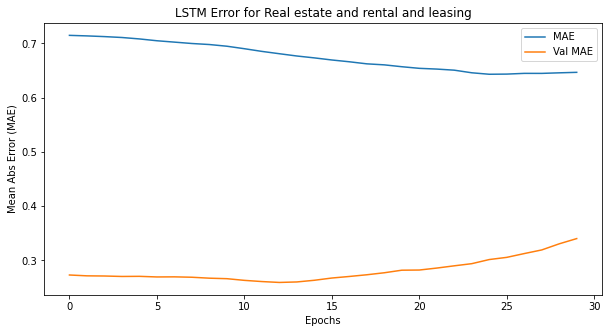

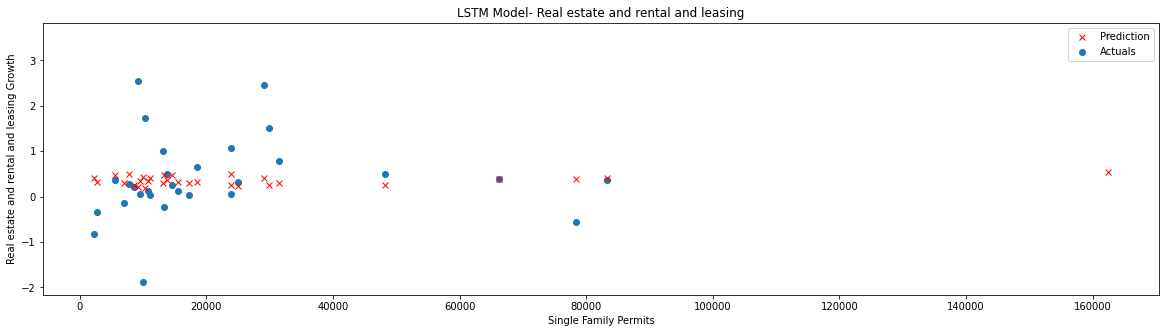

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 451us/sample - loss: 0.3461 - mae: 0.6445
Epoch 2/30
3861/3861 [==============================] - 1s 352us/sample - loss: 0.3477 - mae: 0.6496
Epoch 3/30
3861/3861 [==============================] - 1s 348us/sample - loss: 0.3487 - mae: 0.6534
Epoch 4/30
3861/3861 [==============================] - 1s 354us/sample - loss: 0.3469 - mae: 0.6542
Epoch 5/30
3861/3861 [==============================] - 1s 347us/sample - loss: 0.3489 - mae: 0.6586
Epoch 6/30
3861/3861 [==============================] - 1s 347us/sample - loss: 0.3500 - mae: 0.6605
Epoch 7/30
3861/3861 [==============================] - 1s 345us/sample - loss: 0.3531 - mae: 0.6667
Epoch 8/30
3861/3861 [==============================] - 1s 371us/sample - loss: 0.3557 - mae: 0.6717
Epoch 9/30
3861/3861 [==============================] - 2s 408us/sample - loss: 0.3572 - mae: 0.6751
Epoch 10/30
3861/3861 [==============================] - 1s 356us/sam

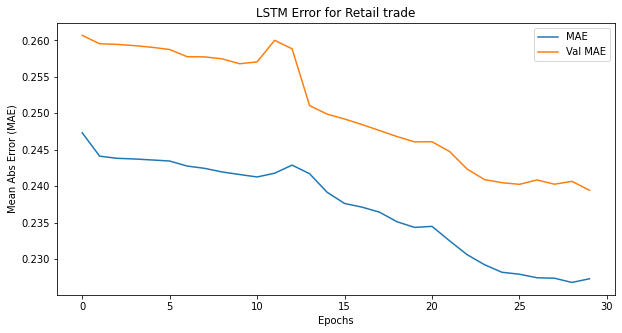

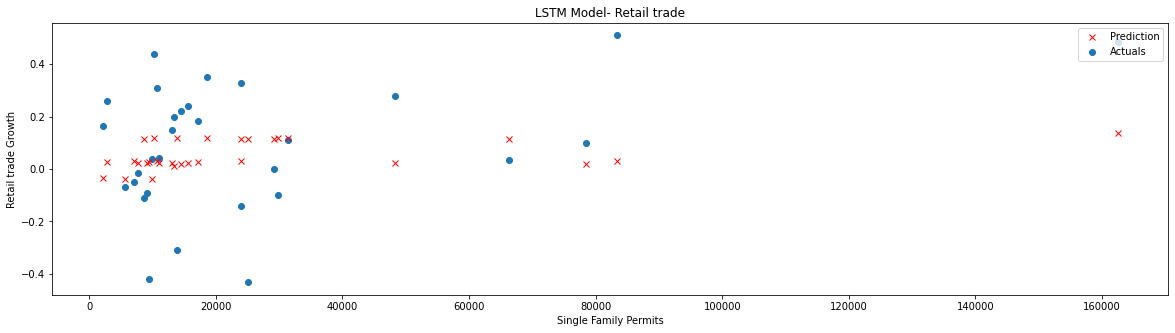

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 451us/sample - loss: 0.0497 - mae: 0.2244
Epoch 2/30
3861/3861 [==============================] - 1s 352us/sample - loss: 0.0497 - mae: 0.2241
Epoch 3/30
3861/3861 [==============================] - 1s 349us/sample - loss: 0.0497 - mae: 0.2239
Epoch 4/30
3861/3861 [==============================] - 1s 356us/sample - loss: 0.0497 - mae: 0.2237
Epoch 5/30
3861/3861 [==============================] - 1s 346us/sample - loss: 0.0494 - mae: 0.2229
Epoch 6/30
3861/3861 [==============================] - 1s 352us/sample - loss: 0.0493 - mae: 0.2225
Epoch 7/30
3861/3861 [==============================] - 1s 350us/sample - loss: 0.0494 - mae: 0.2231
Epoch 8/30
3861/3861 [==============================] - 1s 349us/sample - loss: 0.0493 - mae: 0.2228
Epoch 9/30
3861/3861 [==============================] - 1s 354us/sample - loss: 0.0492 - mae: 0.2221
Epoch 10/30
3861/3861 [==============================] - 1s 347us/sam

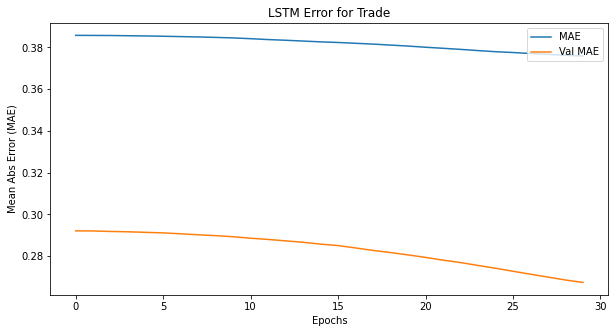

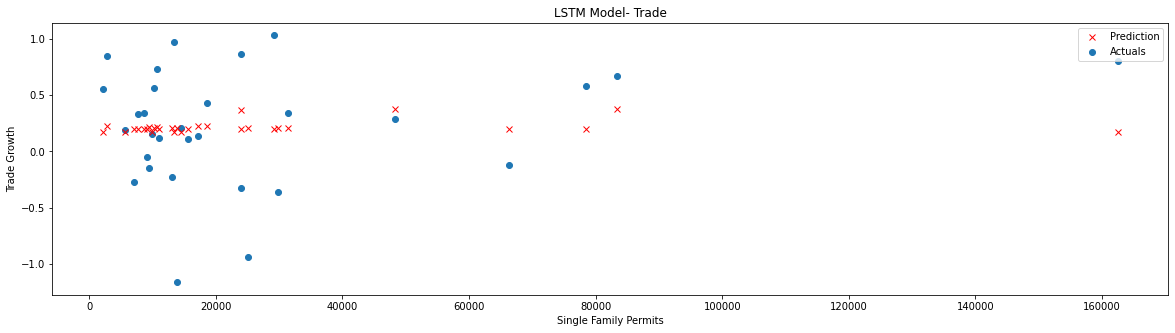

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 453us/sample - loss: 0.1318 - mae: 0.3728
Epoch 2/30
3861/3861 [==============================] - 1s 355us/sample - loss: 0.1315 - mae: 0.3724
Epoch 3/30
3861/3861 [==============================] - 1s 353us/sample - loss: 0.1312 - mae: 0.3720
Epoch 4/30
3861/3861 [==============================] - 1s 350us/sample - loss: 0.1309 - mae: 0.3717
Epoch 5/30
3861/3861 [==============================] - 1s 352us/sample - loss: 0.1305 - mae: 0.3715
Epoch 6/30
3861/3861 [==============================] - 1s 349us/sample - loss: 0.1302 - mae: 0.3711
Epoch 7/30
3861/3861 [==============================] - 1s 350us/sample - loss: 0.1299 - mae: 0.3707
Epoch 8/30
3861/3861 [==============================] - 1s 357us/sample - loss: 0.1296 - mae: 0.3705
Epoch 9/30
3861/3861 [==============================] - 1s 353us/sample - loss: 0.1295 - mae: 0.3705
Epoch 10/30
3861/3861 [==============================] - 1s 351us/sam

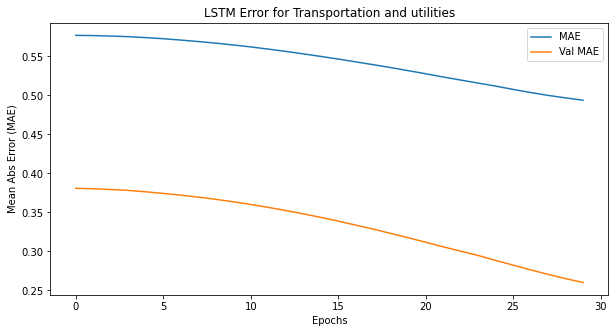

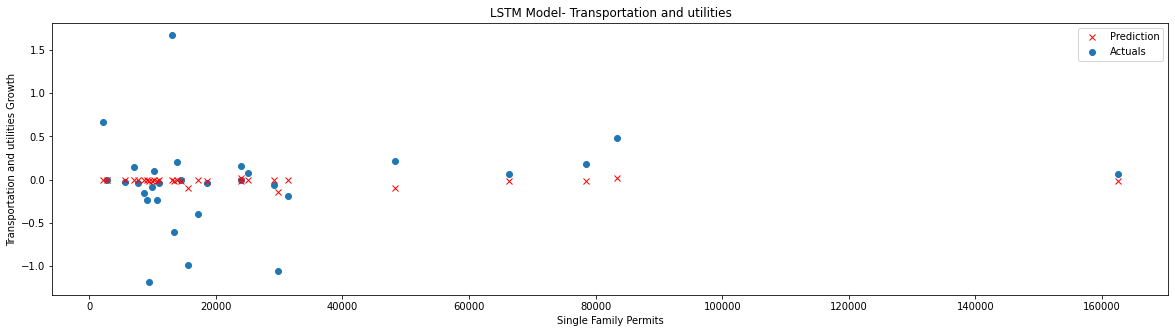

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 464us/sample - loss: 0.2584 - mae: 0.4818
Epoch 2/30
3861/3861 [==============================] - 1s 356us/sample - loss: 0.2575 - mae: 0.4796
Epoch 3/30
3861/3861 [==============================] - 1s 361us/sample - loss: 0.2566 - mae: 0.4776
Epoch 4/30
3861/3861 [==============================] - 1s 382us/sample - loss: 0.2555 - mae: 0.4760
Epoch 5/30
3861/3861 [==============================] - 2s 441us/sample - loss: 0.2553 - mae: 0.4759
Epoch 6/30
3861/3861 [==============================] - 1s 367us/sample - loss: 0.2550 - mae: 0.4757
Epoch 7/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.2549 - mae: 0.4764
Epoch 8/30
3861/3861 [==============================] - 1s 360us/sample - loss: 0.2552 - mae: 0.4790
Epoch 9/30
3861/3861 [==============================] - 1s 358us/sample - loss: 0.2557 - mae: 0.4820
Epoch 10/30
3861/3861 [==============================] - 1s 358us/sam

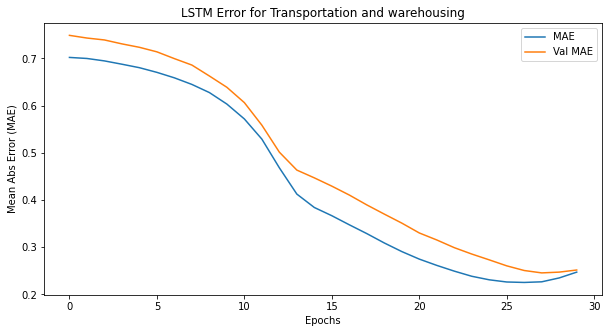

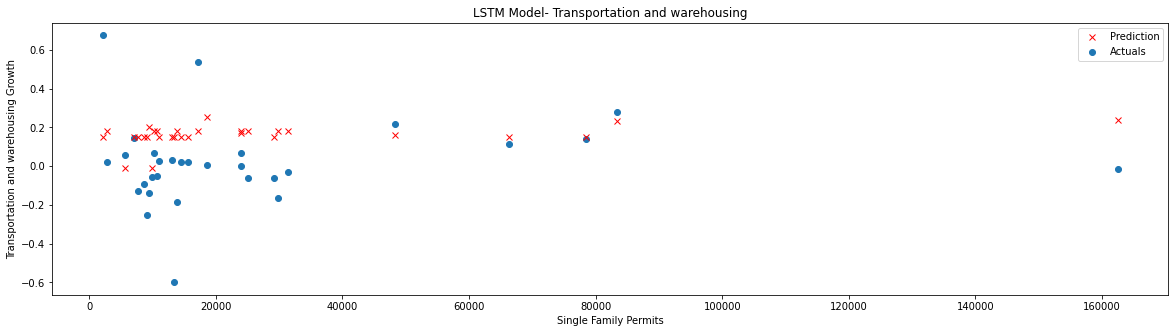

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 468us/sample - loss: 0.0684 - mae: 0.2634
Epoch 2/30
3861/3861 [==============================] - 1s 376us/sample - loss: 0.0724 - mae: 0.2797
Epoch 3/30
3861/3861 [==============================] - 1s 371us/sample - loss: 0.0767 - mae: 0.2961
Epoch 4/30
3861/3861 [==============================] - 1s 376us/sample - loss: 0.0816 - mae: 0.3127
Epoch 5/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.0864 - mae: 0.3288
Epoch 6/30
3861/3861 [==============================] - 1s 354us/sample - loss: 0.0913 - mae: 0.3439
Epoch 7/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.0960 - mae: 0.3581
Epoch 8/30
3861/3861 [==============================] - 1s 360us/sample - loss: 0.1011 - mae: 0.3725
Epoch 9/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.1060 - mae: 0.3857
Epoch 10/30
3861/3861 [==============================] - 1s 356us/sam

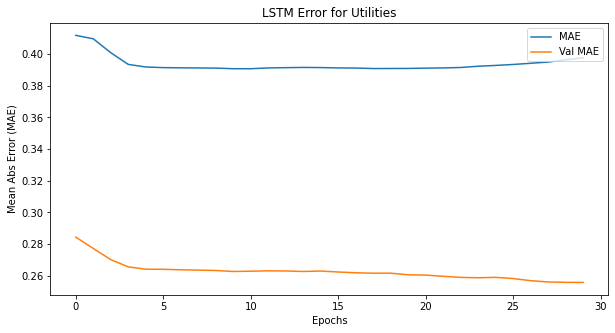

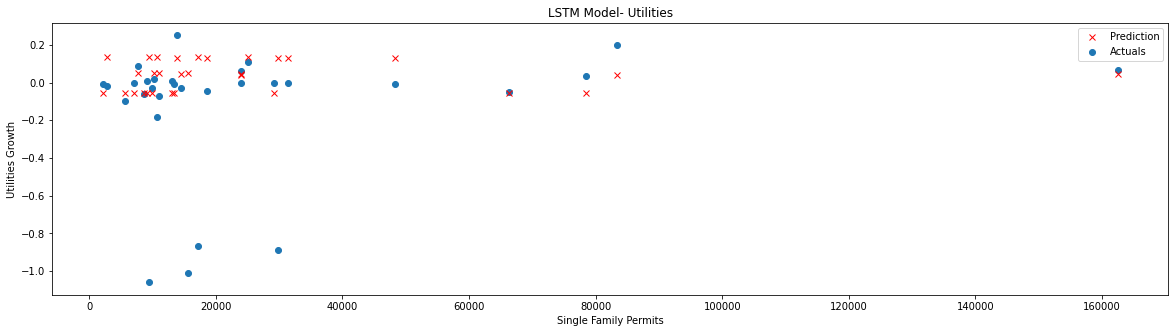

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 472us/sample - loss: 0.2125 - mae: 0.3882
Epoch 2/30
3861/3861 [==============================] - 1s 362us/sample - loss: 0.2129 - mae: 0.3934
Epoch 3/30
3861/3861 [==============================] - 1s 361us/sample - loss: 0.2134 - mae: 0.3973
Epoch 4/30
3861/3861 [==============================] - 1s 360us/sample - loss: 0.2134 - mae: 0.3986
Epoch 5/30
3861/3861 [==============================] - 1s 367us/sample - loss: 0.2134 - mae: 0.3988
Epoch 6/30
3861/3861 [==============================] - 1s 365us/sample - loss: 0.2134 - mae: 0.3988
Epoch 7/30
3861/3861 [==============================] - 1s 363us/sample - loss: 0.2135 - mae: 0.3984
Epoch 8/30
3861/3861 [==============================] - 1s 359us/sample - loss: 0.2134 - mae: 0.3983
Epoch 9/30
3861/3861 [==============================] - 1s 382us/sample - loss: 0.2134 - mae: 0.3975
Epoch 10/30
3861/3861 [==============================] - 2s 391us/sam

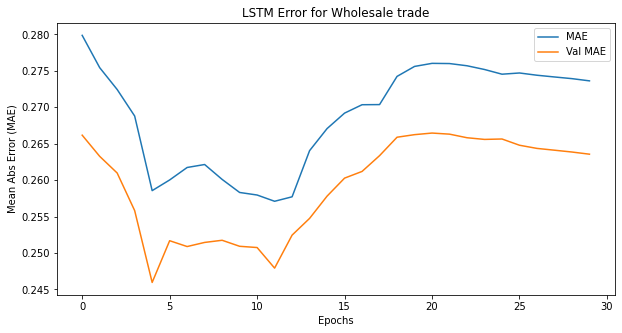

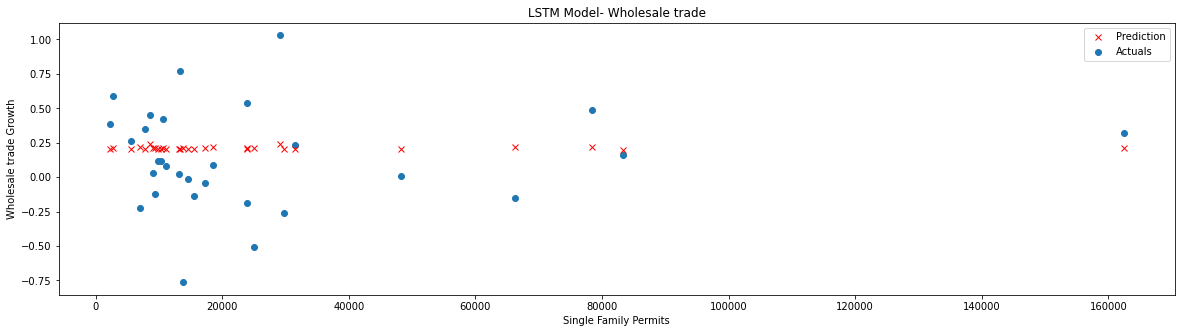

Train on 3861 samples
Epoch 1/30
3861/3861 [==============================] - 2s 472us/sample - loss: 0.0750 - mae: 0.2713
Epoch 2/30
3861/3861 [==============================] - 1s 372us/sample - loss: 0.0749 - mae: 0.2708
Epoch 3/30
3861/3861 [==============================] - 1s 368us/sample - loss: 0.0747 - mae: 0.2704
Epoch 4/30
3861/3861 [==============================] - 1s 364us/sample - loss: 0.0746 - mae: 0.2698
Epoch 5/30
3861/3861 [==============================] - 1s 363us/sample - loss: 0.0744 - mae: 0.2694
Epoch 6/30
3861/3861 [==============================] - 1s 365us/sample - loss: 0.0743 - mae: 0.2688
Epoch 7/30
3861/3861 [==============================] - 1s 363us/sample - loss: 0.0740 - mae: 0.2682
Epoch 8/30
3861/3861 [==============================] - 1s 361us/sample - loss: 0.0735 - mae: 0.2666
Epoch 9/30
3861/3861 [==============================] - 1s 363us/sample - loss: 0.0730 - mae: 0.2653
Epoch 10/30
3861/3861 [==============================] - 1s 361us/sam

In [137]:
################################################ LSTM & DNN
os.chdir(LSTM_img)
var=var_pca
df_pred_lstm=pd.DataFrame()
epoch=30
for label in var_bed:
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding='causal',activation='relu',input_shape=(16,1)),
    #tf.keras.layers.LSTM(128, input_shape=(16,1),return_sequences=True),
    tf.keras.layers.LSTM(64),#, return_sequences=True),
   # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
    ])

  optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=1)
  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])


#ds = ds.map(lambda window: (window[:-1], window[-1:])) #All but the last entry; The last entry
#ds = ds.batch(10).prefetch(1)
  history = model.fit(dt,df_train[label],epochs=epoch,validation_data=(dv,df_val_label))
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(epoch),history.history["mae"],label="MAE")
  plt.plot(np.arange(epoch),history.history["val_mae"],label="Val MAE")
  plt.legend(loc="upper right")
  plt.title("LSTM Error for {}".format(label))
  plt.xlabel("Epochs")
  plt.ylabel("Mean Abs Error (MAE)")
  plt.savefig("{}.png".format(label))
    #'Total Construction Spending',
  plt_var='Single Family Permits'
  plt.figure(figsize=(20, 5))
  plt.title('LSTM Model- {}'.format(label))
  plt.scatter(df_val[0:30][plt_var], df_val[label][0:30],label="Actuals")
  plt.plot(df_val[0:30][plt_var], model.predict(dv[0:30]),'x',color='r',label="Prediction")
  plt.xlabel(plt_var)
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("LSTM_predictions_{}.png".format(label))
  plt.show()
  #########REFIT DATA WITH ENTIRE DATASET
  model.fit(dt_whole,df_final_rand[label],epochs=epoch)
  mod=model.predict(dtest)
  df_pred_lstm=pd.concat([df_pred_lstm,pd.DataFrame(mod,columns=[label])],axis=1) ####OUTPUT DATA
  

In [0]:

df_pred_lstm_final=pd.concat([df_complete_pca_test.reset_index()[["Year","Geo (MSA)","State"]],df_pred_lstm],axis=1)
df_pred_lstm_final=df_pred_lstm_final.sort_values(["Geo (MSA)","Year"])

os.chdir(base_dir)
df_pred_lstm_final.to_csv("LSTM_predictions.csv",index=False)

In [139]:
df_pred_lstm_final

Year         Geo (MSA)  ... Utilities  Wholesale trade
120  2019       Abilene, TX  ...  0.077007         0.143765
96   2020       Abilene, TX  ...  0.077184         0.143765
72   2021       Abilene, TX  ...  0.077184         0.143765
48   2022       Abilene, TX  ...  0.077184         0.143765
24   2023       Abilene, TX  ...  0.077184         0.143765
..    ...               ...  ...       ...              ...
535  2020  York-Hanover, PA  ...  0.080833         0.142874
519  2021  York-Hanover, PA  ...  0.080833         0.142874
503  2022  York-Hanover, PA  ...  0.080832         0.142874
487  2023  York-Hanover, PA  ...  0.080832         0.142874
471  2024  York-Hanover, PA  ...  0.080832         0.142874

[1782 rows x 37 columns]

In [90]:
df_pred_lstm_final

Year  MSA  ... Utilities  Wholesale trade
120   2019  NaN  ...  0.118931         0.117556
121   2019  NaN  ...  0.118931         0.117556
122   2019  NaN  ...  0.118931         0.117556
123   2019  NaN  ...  0.118931         0.117556
124   2019  NaN  ...  0.118931         0.117556
...    ...  ...  ...       ...              ...
1747  2024  NaN  ...  0.116833         0.117408
1748  2024  NaN  ...  0.116833         0.117408
1749  2024  NaN  ...  0.116833         0.117408
1770  2024  NaN  ...  0.116812         0.117007
1771  2024  NaN  ...  0.116812         0.117007

[1782 rows x 37 columns]

In [80]:
df_complete_pca_test

Unnamed: 0                  Geo (MSA)  ... Utilities  Wholesale trade
0              0                Abilene, TX  ...       NaN              NaN
1              1               Amarillo, TX  ...       NaN              NaN
2              2      Austin-Round Rock, TX  ...       NaN              NaN
3              3   Beaumont-Port Arthur, TX  ...       NaN              NaN
4              4  Brownsville-Harlingen, TX  ...       NaN              NaN
...          ...                        ...  ...       ...              ...
1777        5612            Sioux Falls, SD  ...       NaN              NaN
1778        5613             Rapid City, SD  ...       NaN              NaN
1779        5614            Sioux Falls, SD  ...       NaN              NaN
1780        5615             Rapid City, SD  ...       NaN              NaN
1781        5616            Sioux Falls, SD  ...       NaN              NaN

[1782 rows x 57 columns]

Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 90us/sample - loss: 27706.8565 - mae: 27706.9844 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 41us/sample - loss: 4.0187 - mae: 4.1165 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.8011 - mae: 0.8989 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0184 - mae: 0.1161 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0184 - mae: 0.1161 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0184 - mae: 0.1161 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3088/3088 [==============================] - 0s 42us/sample - loss: 0.0184 - mae: 0.1161 - val_loss: 0.3891 - va

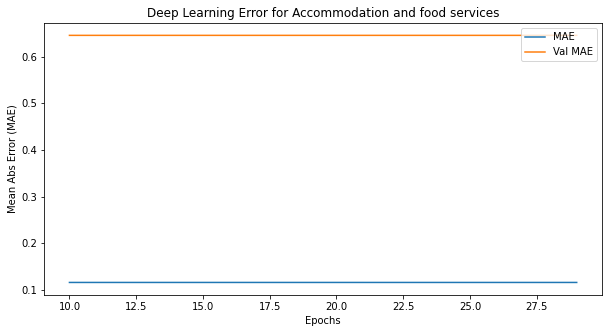

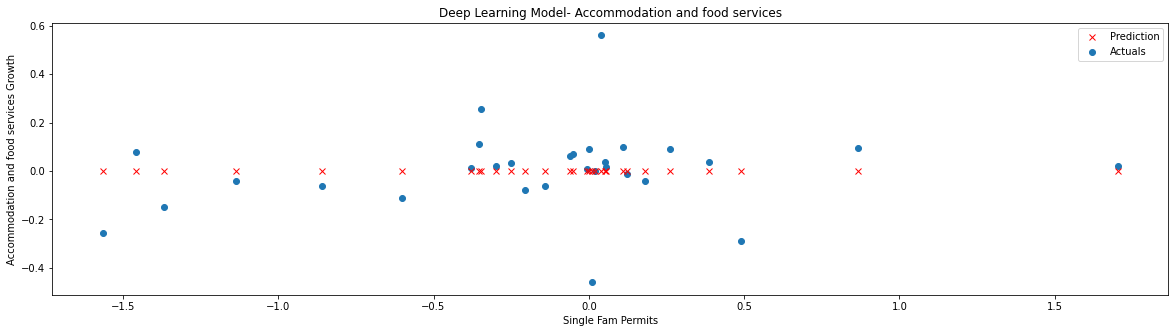

Train on 3861 samples
3861/3861 [==============================] - 0s 42us/sample - loss: 0.0206 - mae: 0.1179
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 84us/sample - loss: 64214.0173 - mae: 64214.0898 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0305 - mae: 0.1699 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0305 - mae: 0.1699 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0305 - mae: 0.1699 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.0305 - mae: 0.1699 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0305 - mae: 0.1699 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

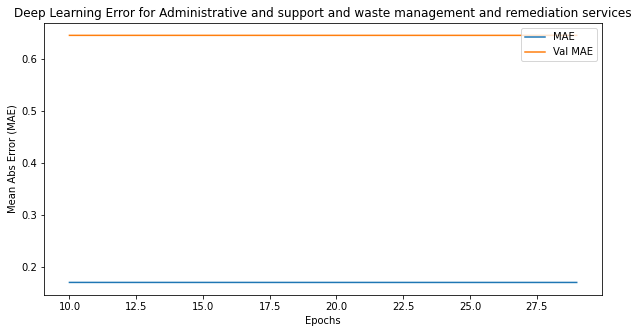

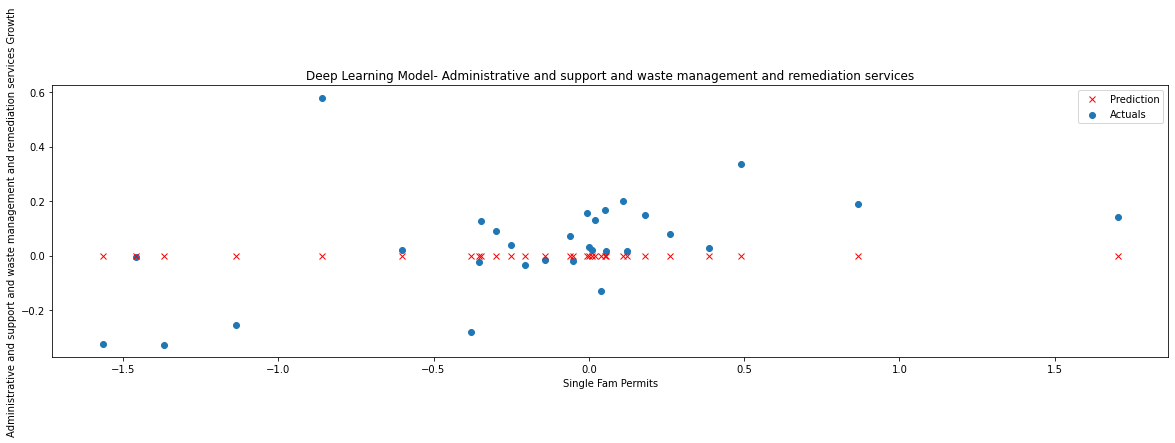

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.0299 - mae: 0.1680
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 83us/sample - loss: 45458.7740 - mae: 45459.0312 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.5154 - mae: 0.7667 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.5154 - mae: 0.7667 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.5154 - mae: 0.7667 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.5154 - mae: 0.7667 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.5154 - mae: 0.7667 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

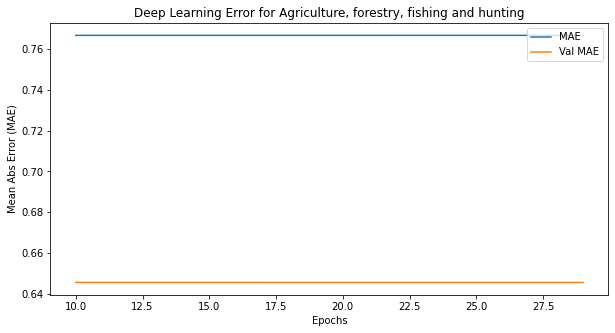

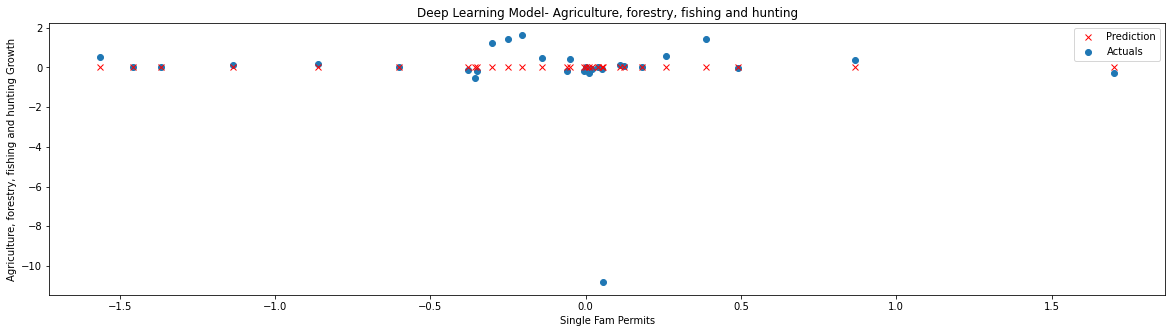

Train on 3861 samples
3861/3861 [==============================] - 0s 45us/sample - loss: 0.5369 - mae: 0.7880
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 81us/sample - loss: 50326.1754 - mae: 50326.6484 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 2.8841 - mae: 3.3504 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 36us/sample - loss: 2.8841 - mae: 3.3503 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 2.8841 - mae: 3.3503 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 36us/sample - loss: 2.8841 - mae: 3.3503 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 2.8841 - mae: 3.3503 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

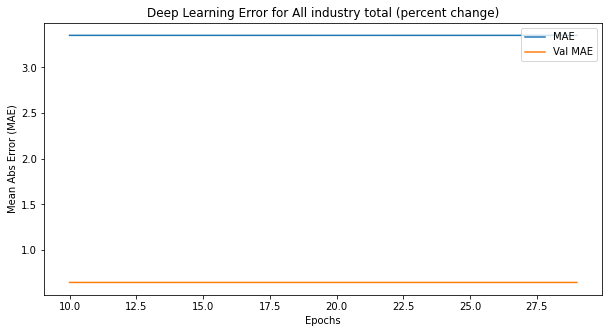

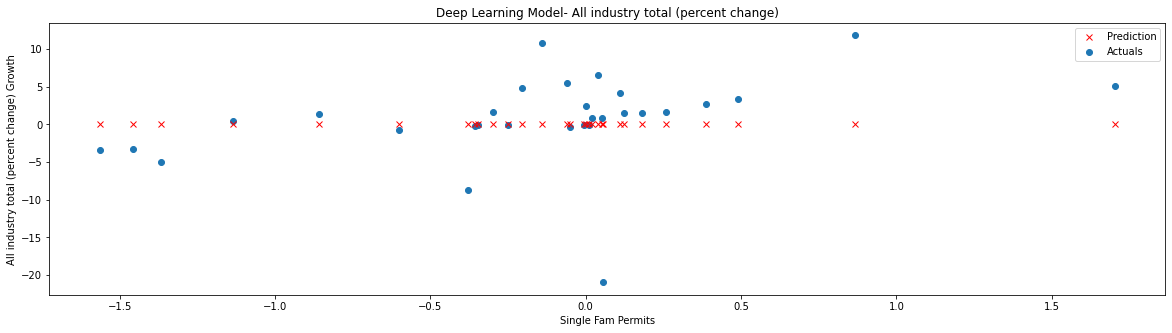

Train on 3861 samples
3861/3861 [==============================] - 0s 40us/sample - loss: 2.8541 - mae: 3.3194
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 86us/sample - loss: 38686.6557 - mae: 38686.7266 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.0092 - mae: 0.0622 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0092 - mae: 0.0622 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0092 - mae: 0.0622 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0092 - mae: 0.0622 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.0092 - mae: 0.0622 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

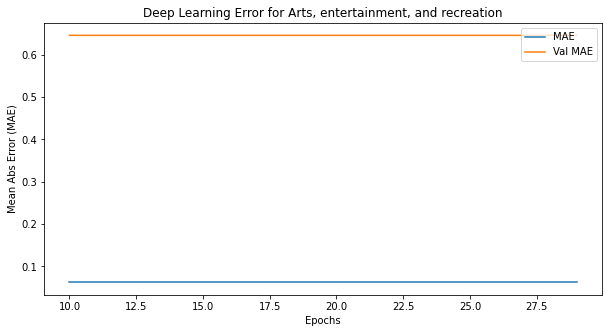

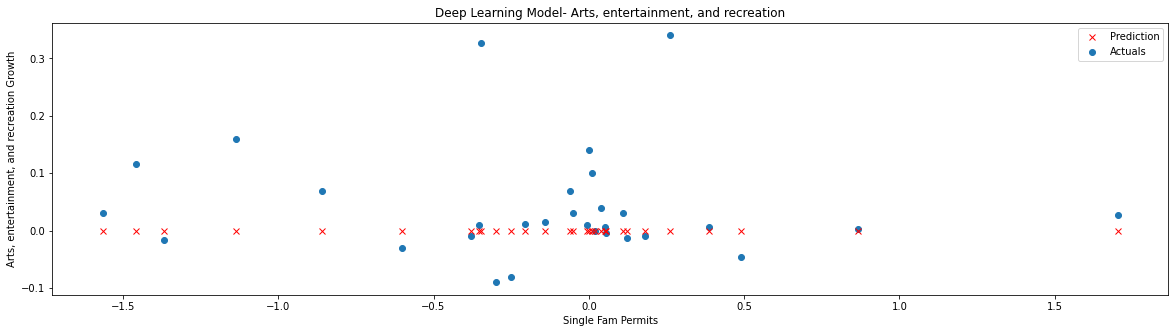

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.0103 - mae: 0.0646
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 92us/sample - loss: 38815.2510 - mae: 38815.4414 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 41us/sample - loss: 0.1366 - mae: 0.2521 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.1150 - mae: 0.2303 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0579 - mae: 0.1733 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0579 - mae: 0.1732 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.0363 - mae: 0.1515 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

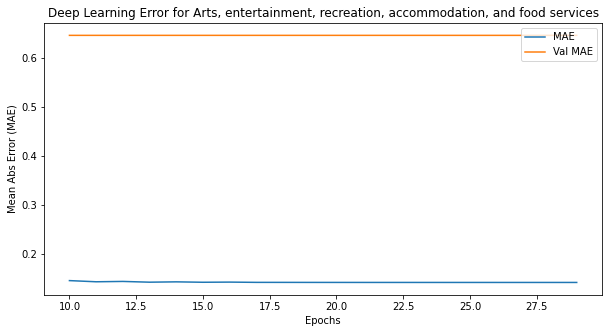

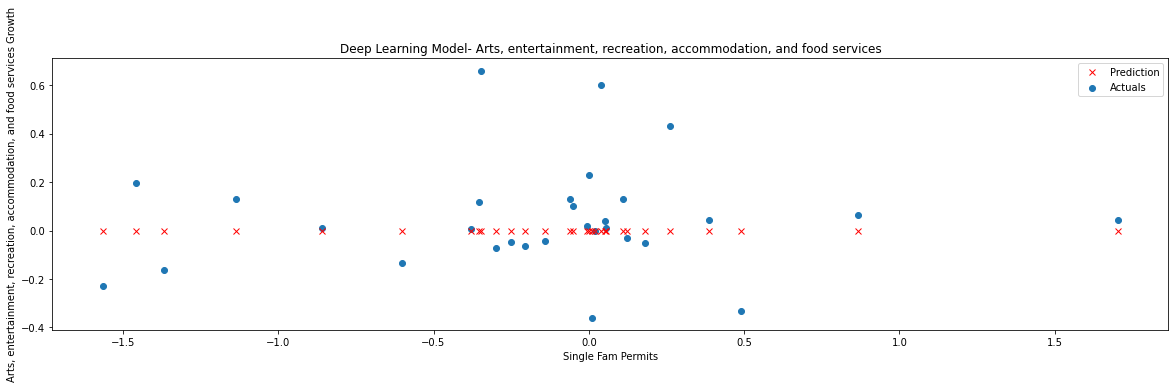

Train on 3861 samples
3861/3861 [==============================] - 0s 42us/sample - loss: 0.0313 - mae: 0.1463
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 90us/sample - loss: 45980.4121 - mae: 45980.7500 - val_loss: 0.5003 - val_mae: 0.7580
Epoch 2/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.2275 - mae: 0.4854 - val_loss: 0.3908 - val_mae: 0.6484
Epoch 3/30
3088/3088 [==============================] - 0s 40us/sample - loss: 0.2055 - mae: 0.4629 - val_loss: 0.3908 - val_mae: 0.6484
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.2052 - mae: 0.4628 - val_loss: 0.4064 - val_mae: 0.6642
Epoch 5/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.2078 - mae: 0.4655 - val_loss: 0.3903 - val_mae: 0.6479
Epoch 6/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.2041 - mae: 0.4616 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

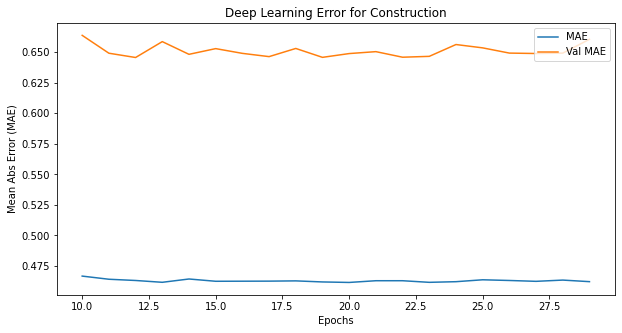

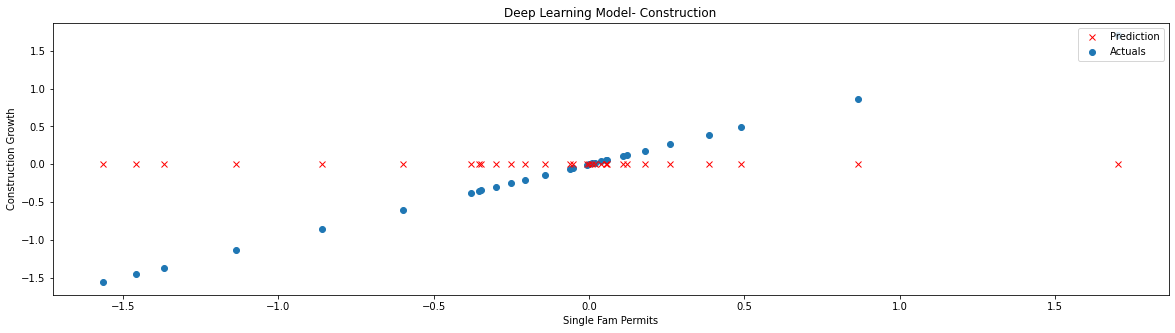

Train on 3861 samples
3861/3861 [==============================] - 0s 43us/sample - loss: 0.2061 - mae: 0.4623
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 84us/sample - loss: 56041.5147 - mae: 56041.8398 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.5987 - mae: 0.8967 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.5987 - mae: 0.8967 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.5987 - mae: 0.8967 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.5987 - mae: 0.8967 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.5987 - mae: 0.8967 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

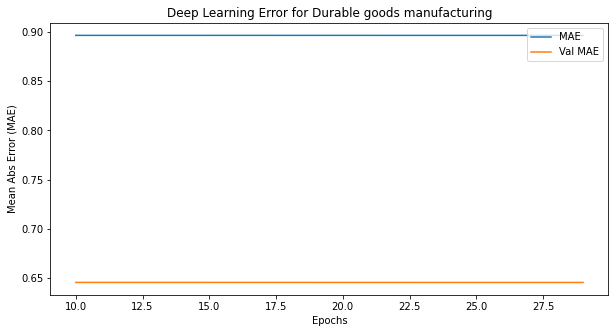

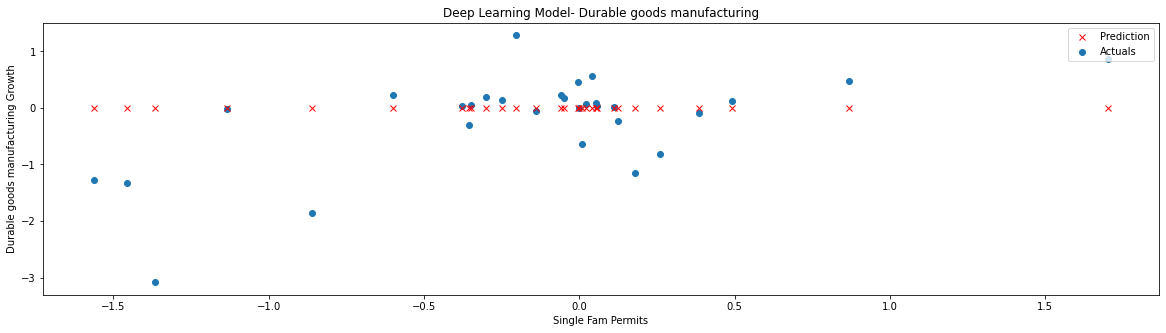

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.5898 - mae: 0.8867
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 88us/sample - loss: 34997.3162 - mae: 34997.3945 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.0050 - mae: 0.0432 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0050 - mae: 0.0432 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 42us/sample - loss: 0.0050 - mae: 0.0432 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 33us/sample - loss: 0.0050 - mae: 0.0432 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 34us/sample - loss: 0.0050 - mae: 0.0432 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

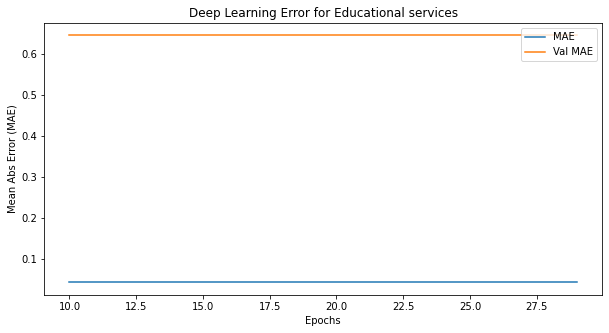

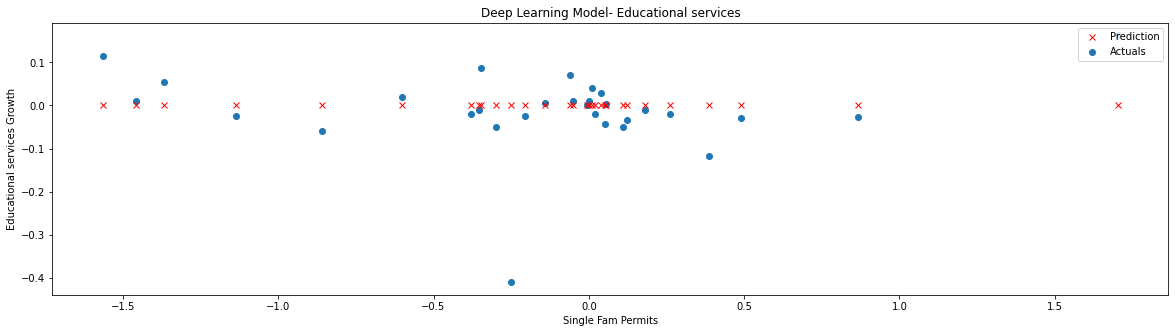

Train on 3861 samples
3861/3861 [==============================] - 0s 39us/sample - loss: 0.0052 - mae: 0.0436
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 81us/sample - loss: 34001.3746 - mae: 34001.6289 - val_loss: 0.4100 - val_mae: 0.6668
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.1035 - mae: 0.3050 - val_loss: 0.3849 - val_mae: 0.6417
Epoch 3/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.1115 - mae: 0.3130 - val_loss: 0.3867 - val_mae: 0.6435
Epoch 4/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.1136 - mae: 0.3149 - val_loss: 0.3886 - val_mae: 0.6450
Epoch 5/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.0898 - mae: 0.2909 - val_loss: 0.3902 - val_mae: 0.6466
Epoch 6/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0867 - mae: 0.2877 - val_loss: 0.3915 - val_mae: 0.6479
Epoch 7/30
3

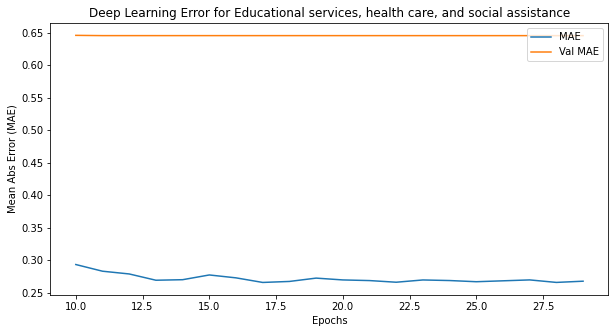

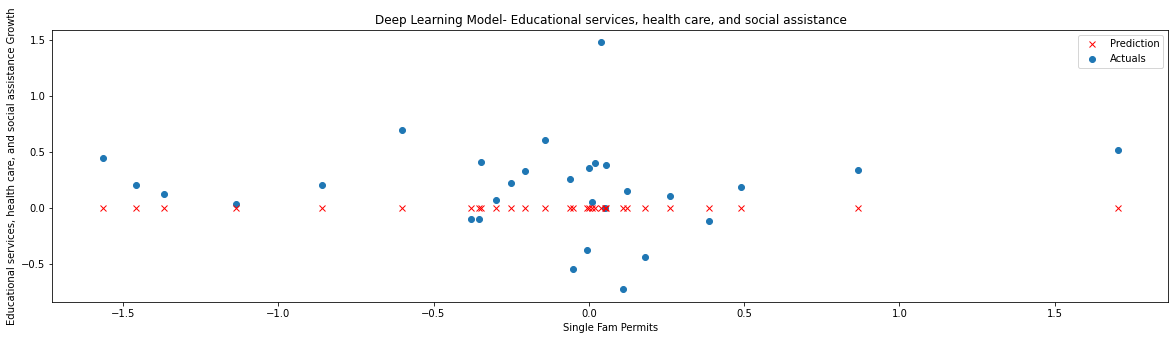

Train on 3861 samples
3861/3861 [==============================] - 0s 42us/sample - loss: 0.0652 - mae: 0.2647
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 87us/sample - loss: 78290.1422 - mae: 78290.4219 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 42us/sample - loss: 0.1263 - mae: 0.3317 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.1263 - mae: 0.3317 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.1263 - mae: 0.3317 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 43us/sample - loss: 0.1263 - mae: 0.3317 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.1263 - mae: 0.3317 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

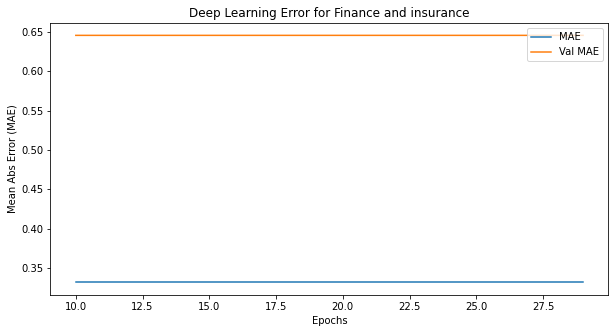

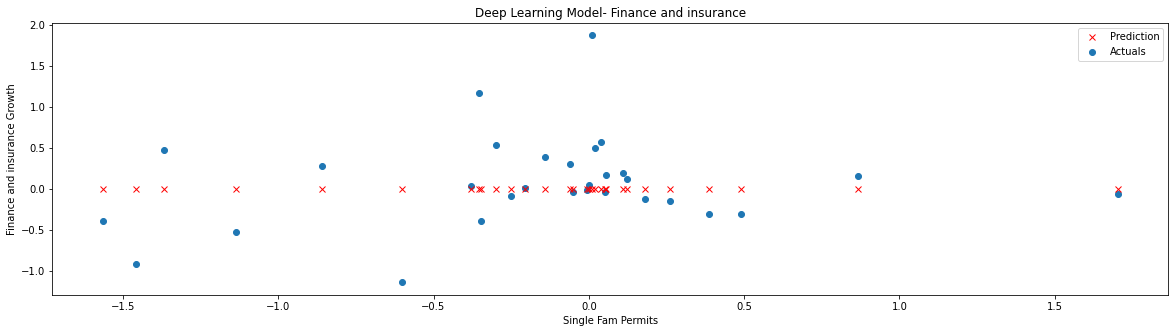

Train on 3861 samples
3861/3861 [==============================] - 0s 44us/sample - loss: 0.1232 - mae: 0.3298
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 92us/sample - loss: 43697.2391 - mae: 43697.6133 - val_loss: 10.4066 - val_mae: 10.6740
Epoch 2/30
3088/3088 [==============================] - 0s 38us/sample - loss: 17.1806 - mae: 17.5234 - val_loss: 0.5915 - val_mae: 0.8565
Epoch 3/30
3088/3088 [==============================] - 0s 35us/sample - loss: 2.0399 - mae: 2.3822 - val_loss: 0.5066 - val_mae: 0.7703
Epoch 4/30
3088/3088 [==============================] - 0s 38us/sample - loss: 1.3553 - mae: 1.6975 - val_loss: 0.3948 - val_mae: 0.6548
Epoch 5/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.7796 - mae: 1.1214 - val_loss: 0.5675 - val_mae: 0.8283
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.6395 - mae: 0.9811 - val_loss: 0.4455 - val_mae: 0.7054
Epoch 7/

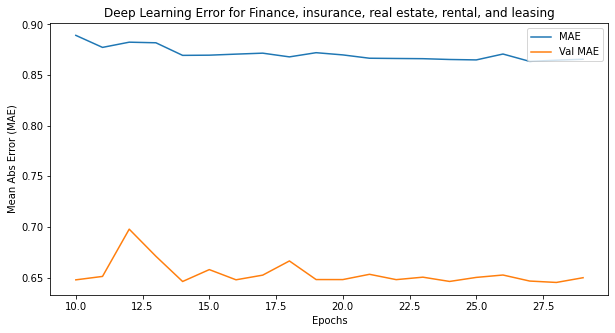

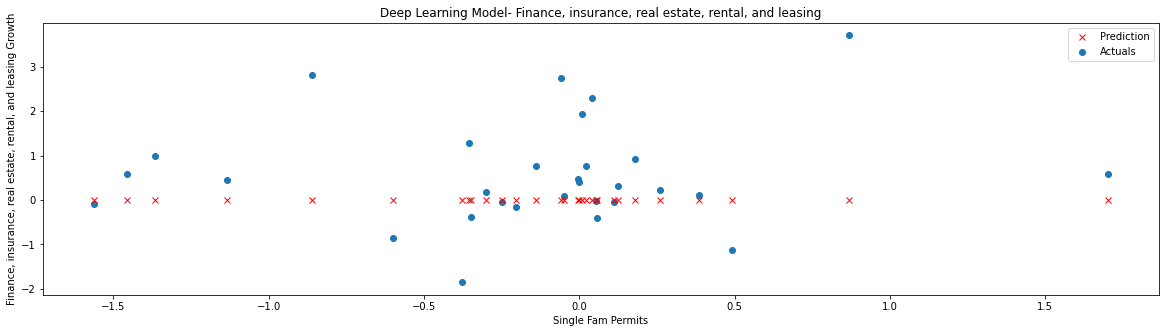

Train on 3861 samples
3861/3861 [==============================] - 0s 43us/sample - loss: 0.5169 - mae: 0.8580
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 82us/sample - loss: 34978.4401 - mae: 34978.6602 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.1486 - mae: 0.3605 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.1486 - mae: 0.3605 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.1486 - mae: 0.3605 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 34us/sample - loss: 0.1486 - mae: 0.3605 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.1486 - mae: 0.3605 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

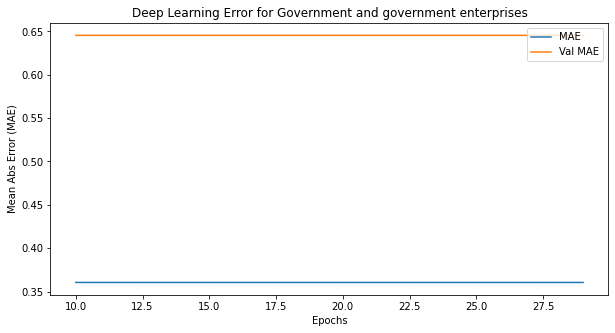

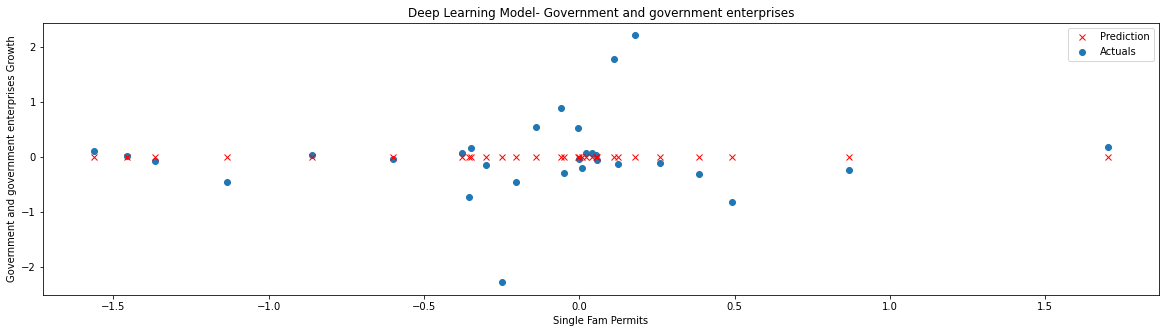

Train on 3861 samples
3861/3861 [==============================] - 0s 40us/sample - loss: 0.1485 - mae: 0.3591
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 83us/sample - loss: 64995.8834 - mae: 64996.0977 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0554 - mae: 0.2474 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0554 - mae: 0.2474 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0554 - mae: 0.2474 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0554 - mae: 0.2474 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0554 - mae: 0.2474 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

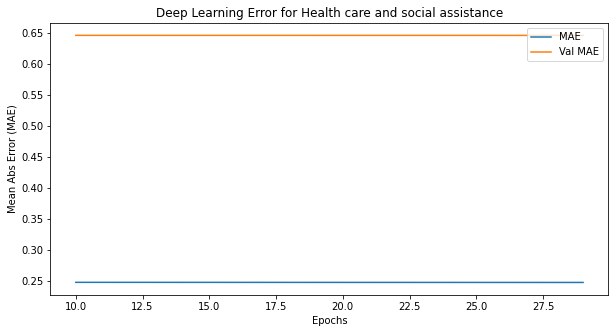

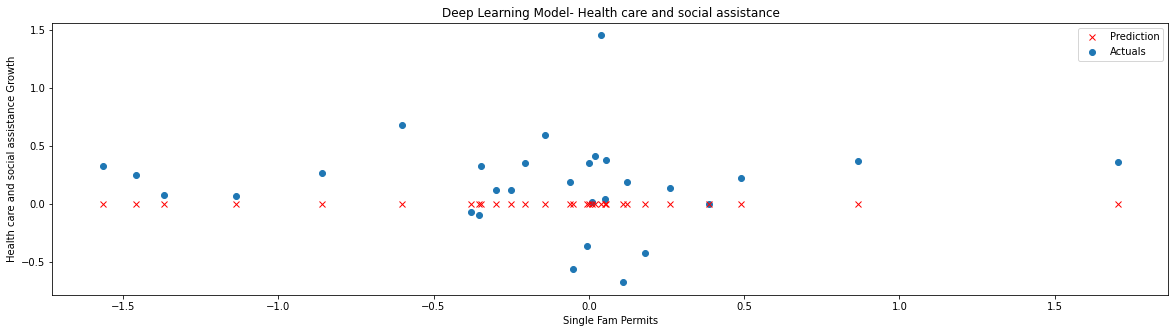

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.0548 - mae: 0.2461
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 80us/sample - loss: 52770.1779 - mae: 52770.3047 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.0601 - mae: 0.2068 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.0601 - mae: 0.2068 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0601 - mae: 0.2068 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0601 - mae: 0.2068 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 43us/sample - loss: 0.0601 - mae: 0.2068 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

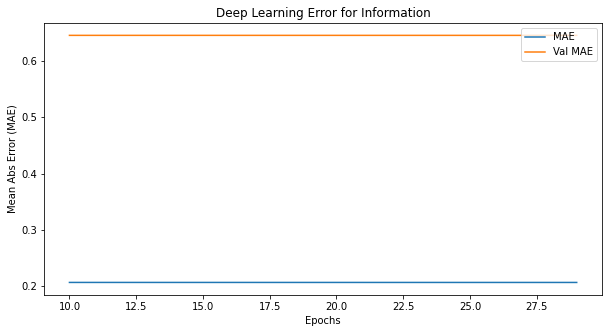

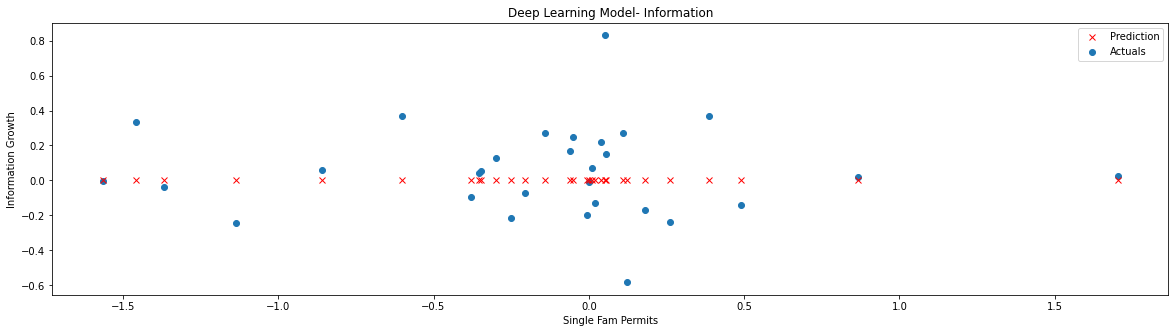

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.0615 - mae: 0.2105
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 83us/sample - loss: 43912.0090 - mae: 43912.0586 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0398 - mae: 0.1470 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.0398 - mae: 0.1470 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0398 - mae: 0.1470 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0398 - mae: 0.1470 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.0398 - mae: 0.1470 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

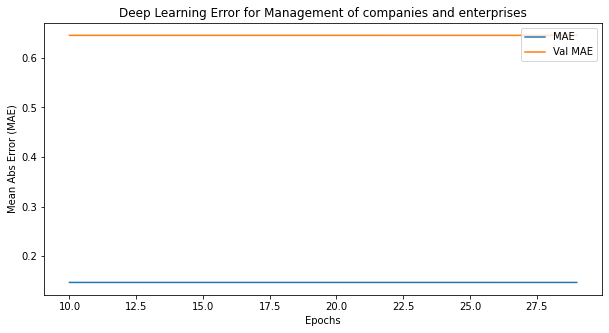

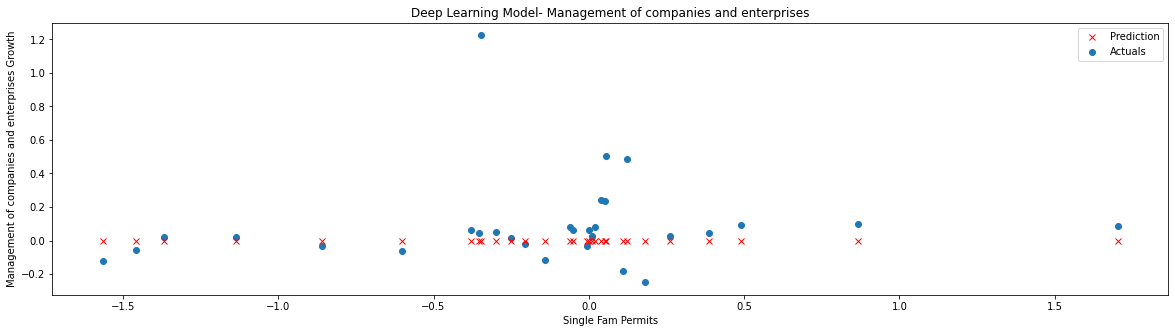

Train on 3861 samples
3861/3861 [==============================] - 0s 43us/sample - loss: 0.0393 - mae: 0.1463
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 87us/sample - loss: 52227.5792 - mae: 52227.9414 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.9588 - mae: 1.3216 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.9588 - mae: 1.3216 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.9588 - mae: 1.3216 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.9588 - mae: 1.3216 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.9588 - mae: 1.3216 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

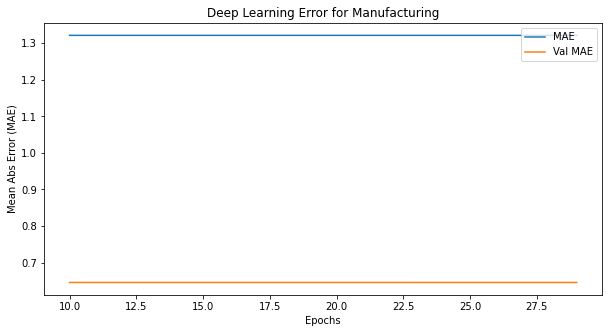

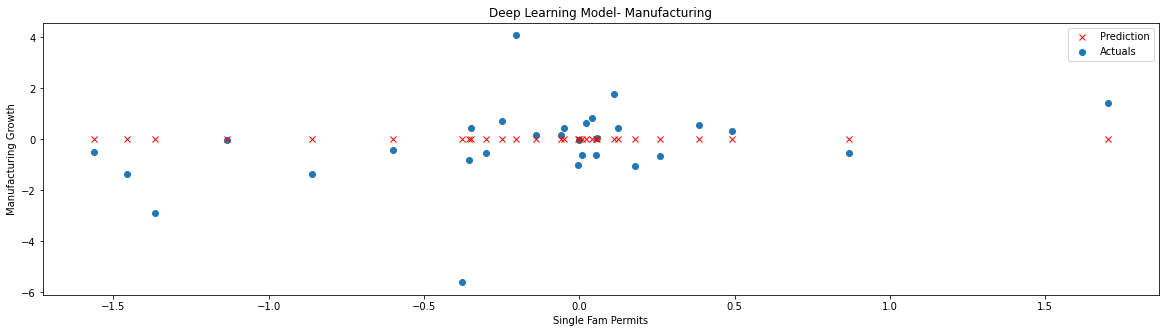

Train on 3861 samples
3861/3861 [==============================] - 0s 38us/sample - loss: 0.9408 - mae: 1.3033
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 87us/sample - loss: 33465.5905 - mae: 33465.9961 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 3.9381 - mae: 4.3209 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 37us/sample - loss: 1.1394 - mae: 1.5222 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 34us/sample - loss: 1.1799 - mae: 1.5626 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 33us/sample - loss: 1.0673 - mae: 1.4501 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 34us/sample - loss: 1.0741 - mae: 1.4568 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

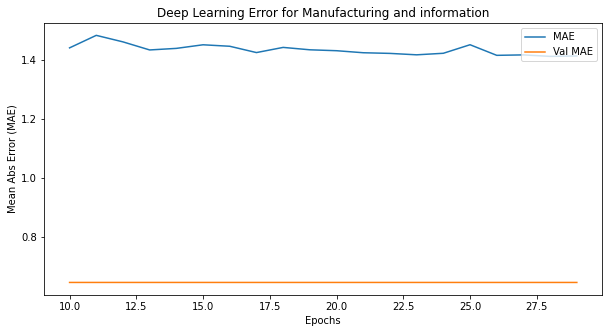

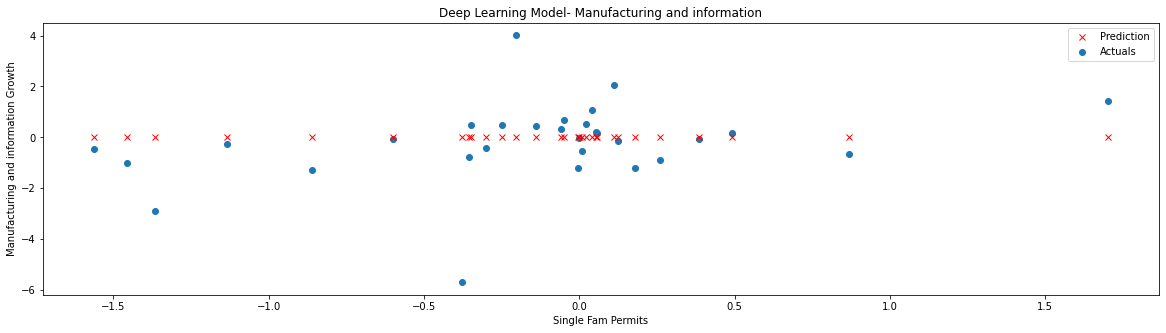

Train on 3861 samples
3861/3861 [==============================] - 0s 39us/sample - loss: 1.0122 - mae: 1.3937
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 86us/sample - loss: 27655.0662 - mae: 27655.2461 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.3951 - mae: 0.5262 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.3951 - mae: 0.5262 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.3951 - mae: 0.5262 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.3951 - mae: 0.5262 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 34us/sample - loss: 0.3951 - mae: 0.5262 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

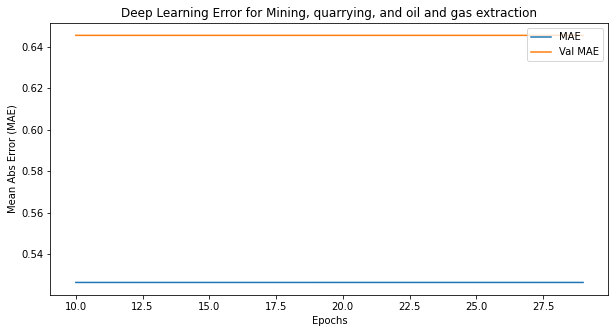

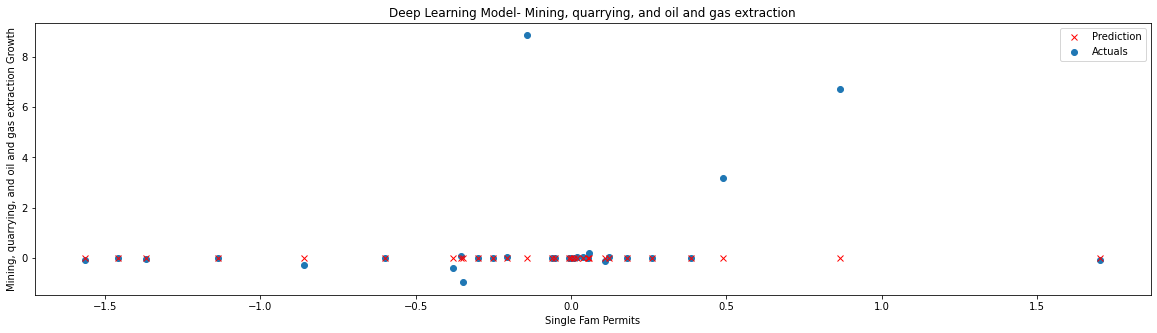

Train on 3861 samples
3861/3861 [==============================] - 0s 39us/sample - loss: 0.3889 - mae: 0.5168
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 83us/sample - loss: 50053.4465 - mae: 50053.7734 - val_loss: 0.3937 - val_mae: 0.6507
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.8567 - mae: 1.1470 - val_loss: 0.3872 - val_mae: 0.6442
Epoch 3/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.8781 - mae: 1.1682 - val_loss: 0.4056 - val_mae: 0.6627
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.8524 - mae: 1.1425 - val_loss: 0.3920 - val_mae: 0.6491
Epoch 5/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.8807 - mae: 1.1710 - val_loss: 0.3861 - val_mae: 0.6425
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.8532 - mae: 1.1431 - val_loss: 0.3969 - val_mae: 0.6534
Epoch 7/30
3

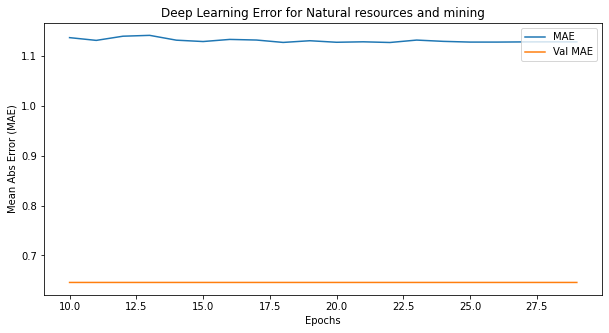

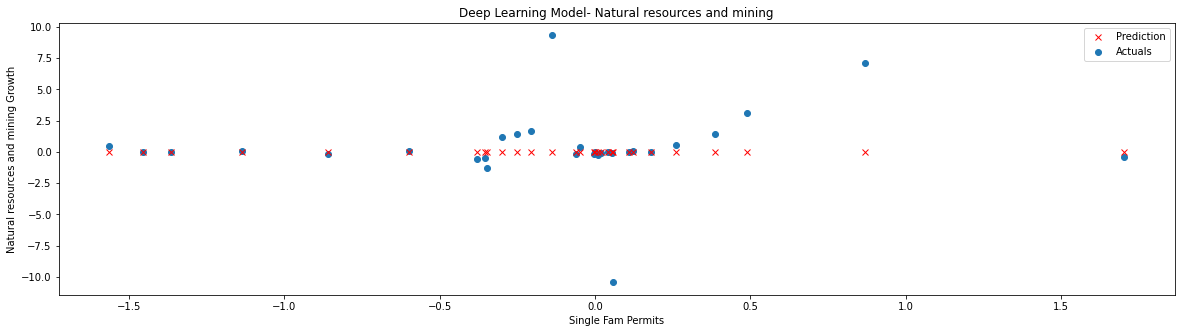

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.8738 - mae: 1.1631
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 84us/sample - loss: 23906.4390 - mae: 23906.7539 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.4226 - mae: 0.6843 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.4226 - mae: 0.6843 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.4226 - mae: 0.6843 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.4226 - mae: 0.6843 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.4226 - mae: 0.6843 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

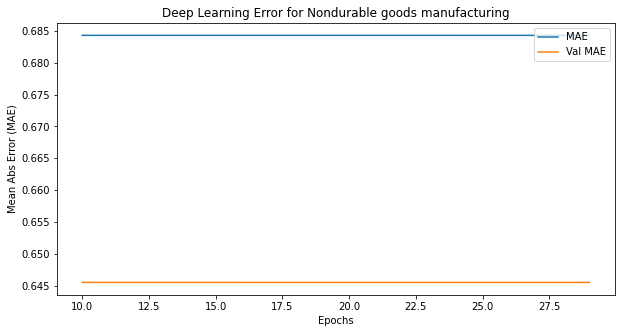

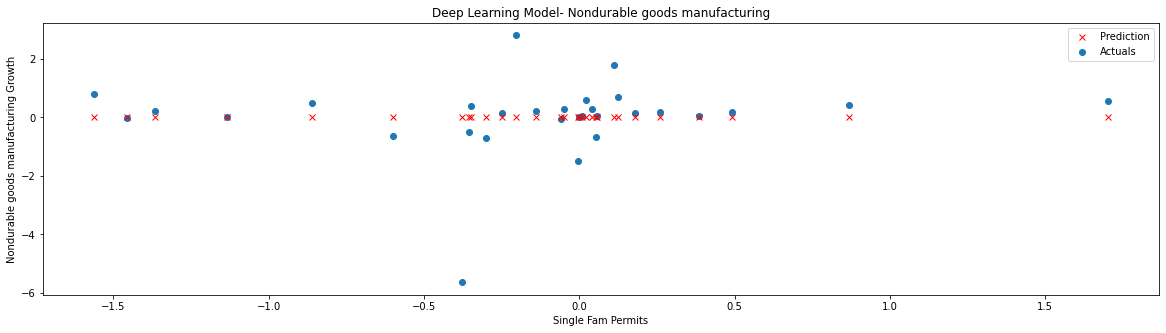

Train on 3861 samples
3861/3861 [==============================] - 0s 40us/sample - loss: 0.4159 - mae: 0.6765
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 85us/sample - loss: 25736.8157 - mae: 25736.8789 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.0081 - mae: 0.0870 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0081 - mae: 0.0870 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 43us/sample - loss: 0.0081 - mae: 0.0870 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 40us/sample - loss: 0.0081 - mae: 0.0870 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0081 - mae: 0.0870 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

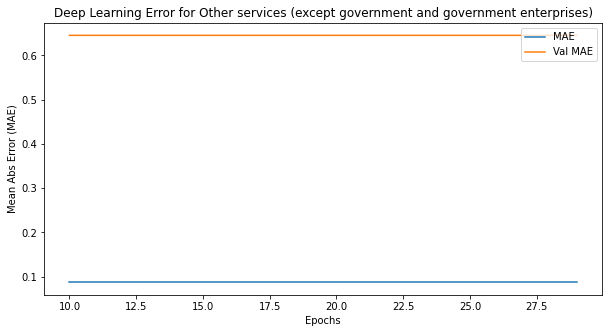

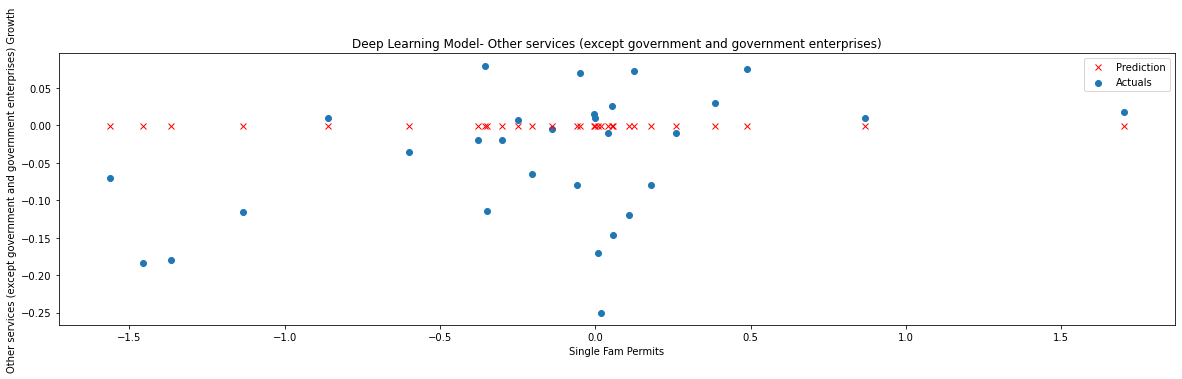

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.0079 - mae: 0.0862
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 85us/sample - loss: 47819.7188 - mae: 47820.1445 - val_loss: 0.5689 - val_mae: 0.8257
Epoch 2/30
3088/3088 [==============================] - 0s 38us/sample - loss: 2.6916 - mae: 3.1137 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 35us/sample - loss: 1.9316 - mae: 2.3536 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 1.9023 - mae: 2.3244 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 35us/sample - loss: 1.8658 - mae: 2.2878 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 1.8483 - mae: 2.2704 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

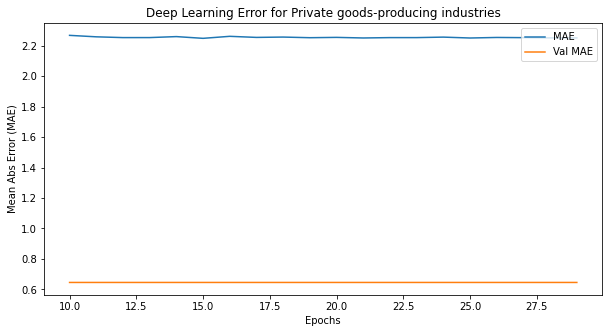

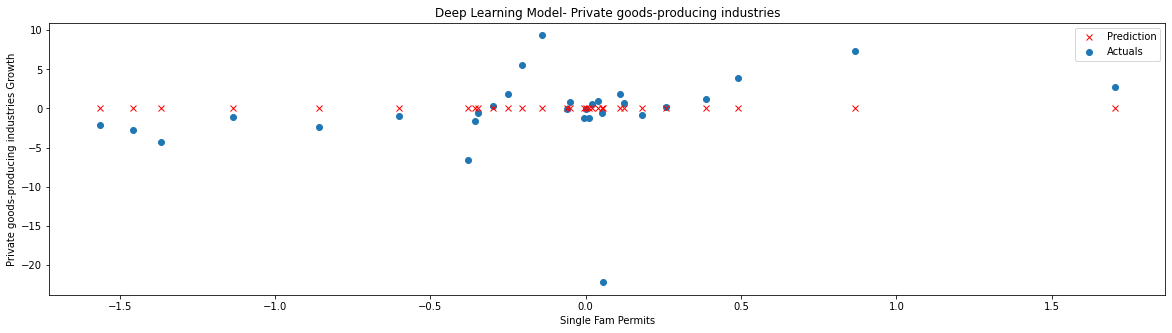

Train on 3861 samples
3861/3861 [==============================] - 0s 42us/sample - loss: 1.8443 - mae: 2.2658
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 84us/sample - loss: 34467.3423 - mae: 34467.8125 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 38us/sample - loss: 2.8082 - mae: 3.2749 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 37us/sample - loss: 2.8082 - mae: 3.2749 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 2.8082 - mae: 3.2749 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 36us/sample - loss: 2.8082 - mae: 3.2749 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 41us/sample - loss: 2.8082 - mae: 3.2749 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

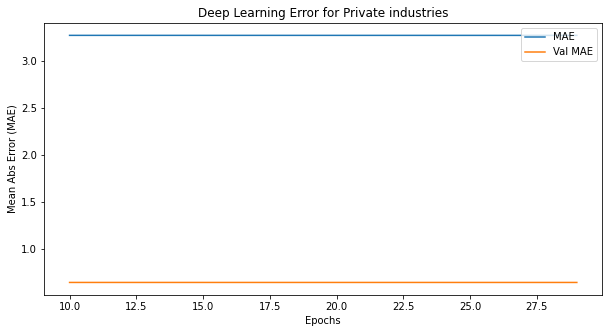

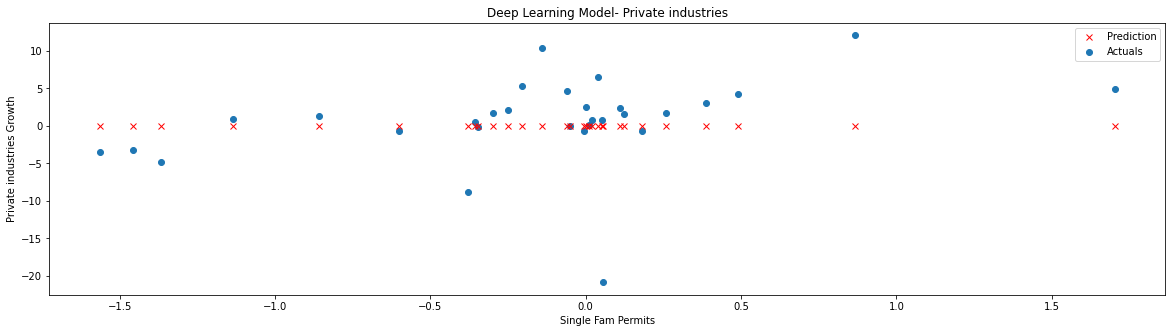

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 2.7805 - mae: 3.2463
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 84us/sample - loss: 34107.1920 - mae: 34107.6406 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 38us/sample - loss: 1.4248 - mae: 1.8644 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 38us/sample - loss: 1.4248 - mae: 1.8643 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 1.4247 - mae: 1.8643 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 35us/sample - loss: 1.4247 - mae: 1.8643 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 1.4247 - mae: 1.8643 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

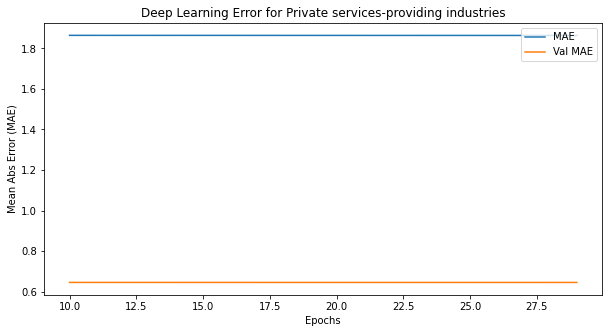

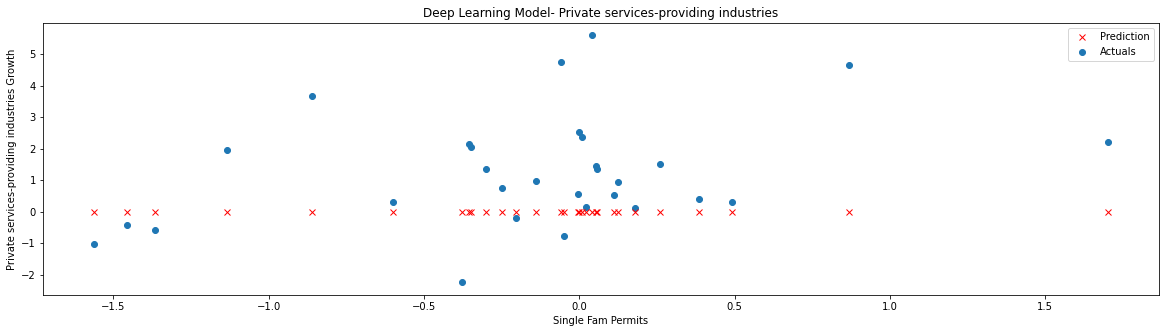

Train on 3861 samples
3861/3861 [==============================] - 0s 39us/sample - loss: 1.3890 - mae: 1.8257
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 84us/sample - loss: 52322.2915 - mae: 52322.6133 - val_loss: 1.2639 - val_mae: 1.5243
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 1.9285 - mae: 2.1932 - val_loss: 0.7429 - val_mae: 1.0018
Epoch 3/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.7729 - mae: 1.0374 - val_loss: 0.7193 - val_mae: 0.9775
Epoch 4/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.8261 - mae: 1.0904 - val_loss: 0.5016 - val_mae: 0.7592
Epoch 5/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.7924 - mae: 1.0565 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.4253 - mae: 0.6892 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

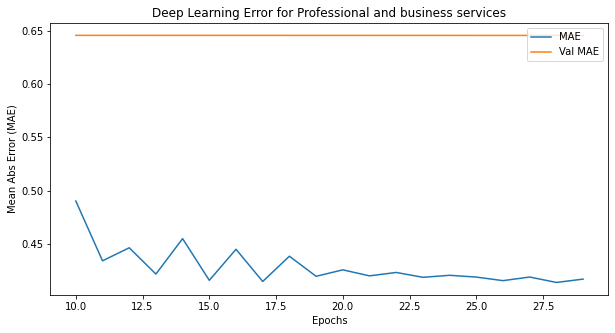

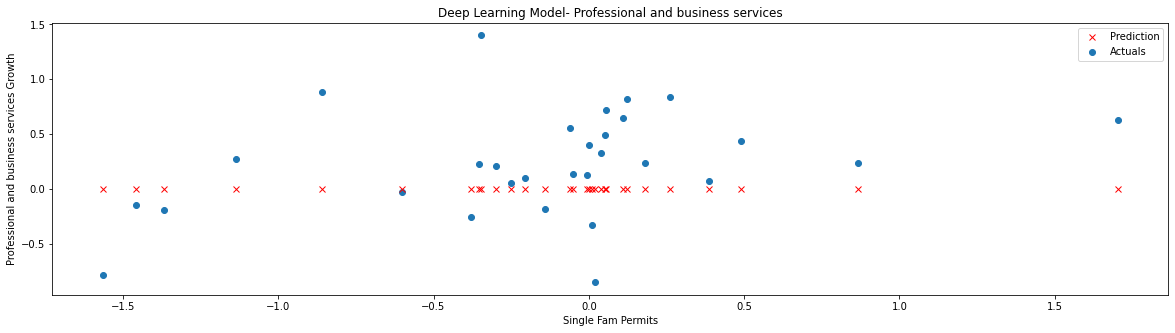

Train on 3861 samples
3861/3861 [==============================] - 0s 43us/sample - loss: 0.1488 - mae: 0.4131
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 83us/sample - loss: 38736.6229 - mae: 38736.8477 - val_loss: 0.5556 - val_mae: 0.8131
Epoch 2/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.6593 - mae: 0.8190 - val_loss: 0.4425 - val_mae: 0.7003
Epoch 3/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.3882 - mae: 0.5477 - val_loss: 0.7378 - val_mae: 0.9957
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.1704 - mae: 0.3298 - val_loss: 0.4088 - val_mae: 0.6664
Epoch 5/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.2070 - mae: 0.3659 - val_loss: 0.4627 - val_mae: 0.7203
Epoch 6/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.2720 - mae: 0.4310 - val_loss: 0.4425 - val_mae: 0.7001
Epoch 7/30
3

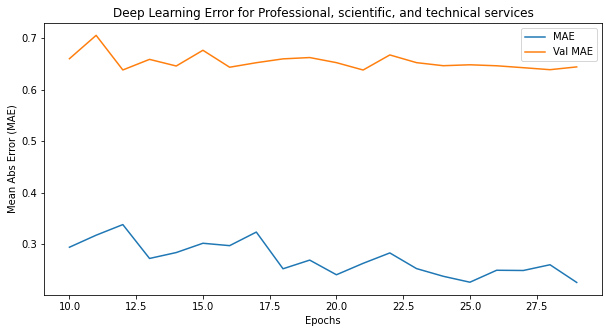

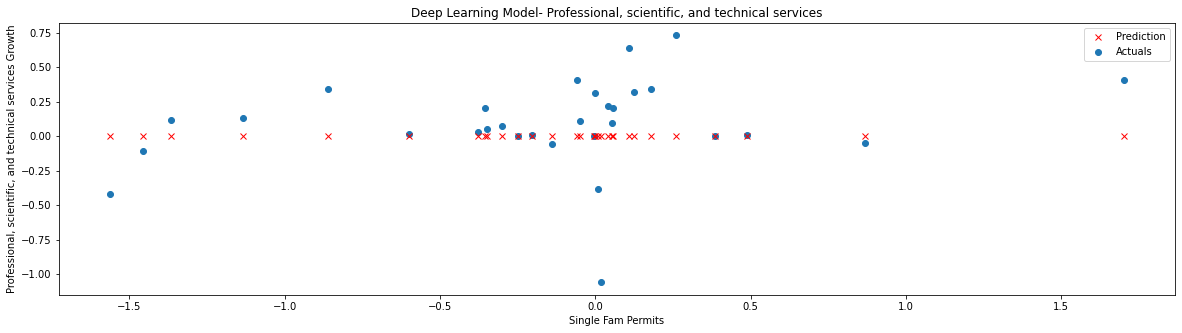

Train on 3861 samples
3861/3861 [==============================] - 0s 38us/sample - loss: 0.0640 - mae: 0.2224
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 87us/sample - loss: 57340.5331 - mae: 57340.8516 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.4014 - mae: 0.7114 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 42us/sample - loss: 0.4014 - mae: 0.7114 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.4014 - mae: 0.7114 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.4014 - mae: 0.7114 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.4014 - mae: 0.7114 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

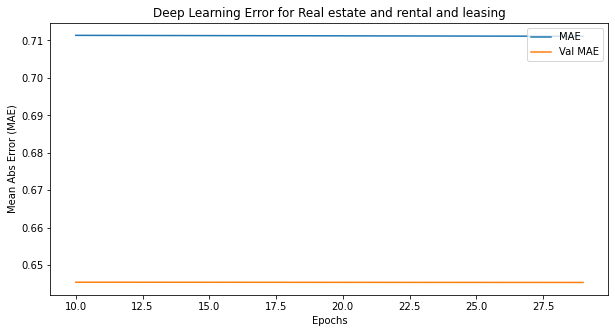

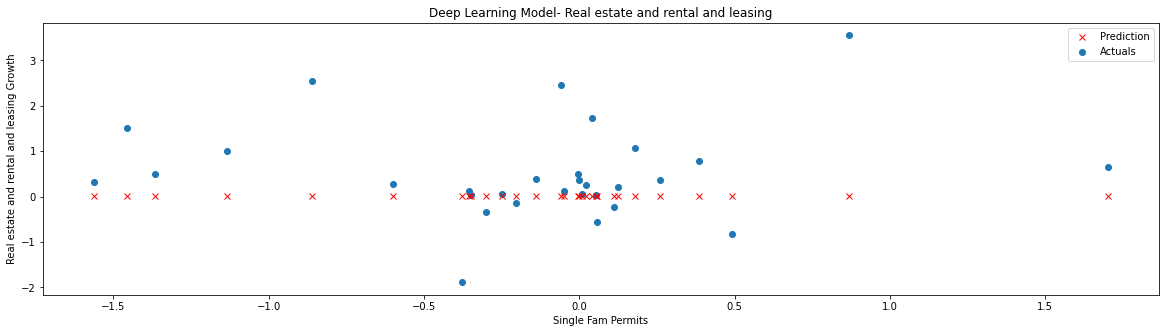

Train on 3861 samples
3861/3861 [==============================] - 0s 37us/sample - loss: 0.3945 - mae: 0.7030
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 82us/sample - loss: 41140.8083 - mae: 41141.0391 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 41us/sample - loss: 0.0519 - mae: 0.2295 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0519 - mae: 0.2295 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0519 - mae: 0.2295 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0519 - mae: 0.2295 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0519 - mae: 0.2295 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

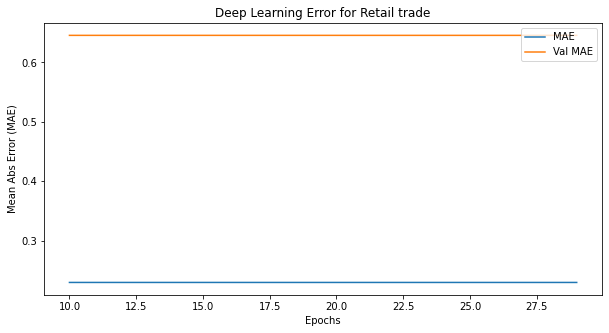

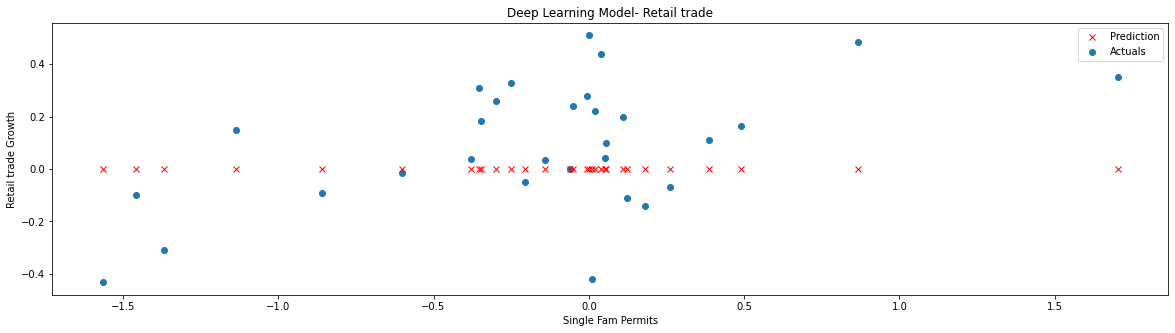

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.0501 - mae: 0.2277
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 85us/sample - loss: 50427.1729 - mae: 50427.5078 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.8103 - mae: 1.0705 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.1389 - mae: 0.3989 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.1389 - mae: 0.3989 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.1389 - mae: 0.3989 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.1389 - mae: 0.3989 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

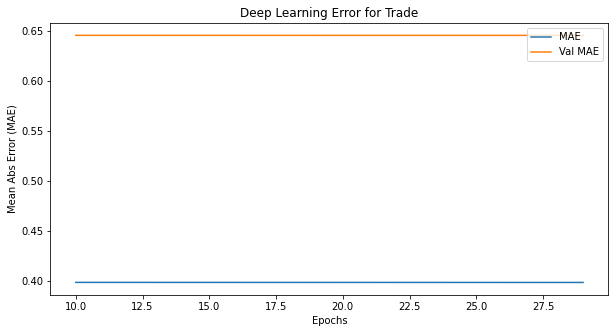

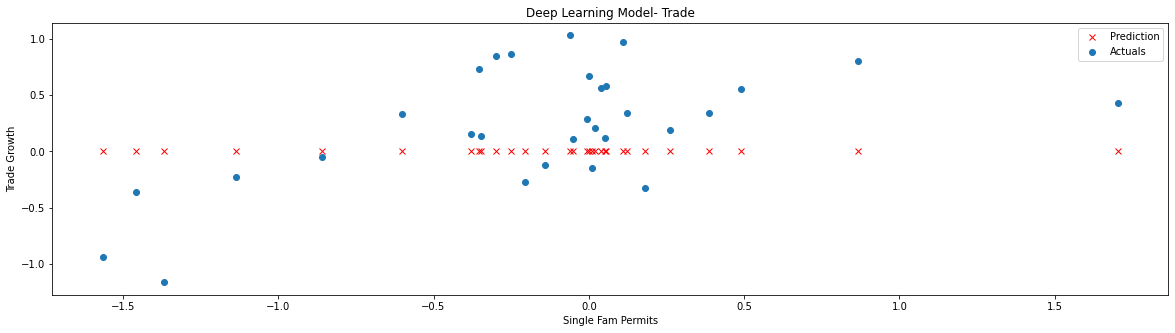

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.1367 - mae: 0.3965
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 88us/sample - loss: 41573.3084 - mae: 41573.5664 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.8158 - mae: 1.0379 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.4291 - mae: 0.6510 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.3988 - mae: 0.6207 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 34us/sample - loss: 0.3078 - mae: 0.5297 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.3280 - mae: 0.5500 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

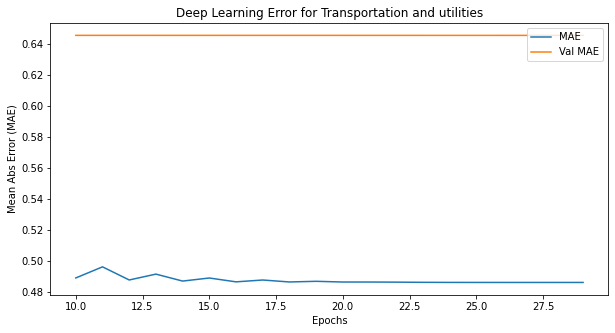

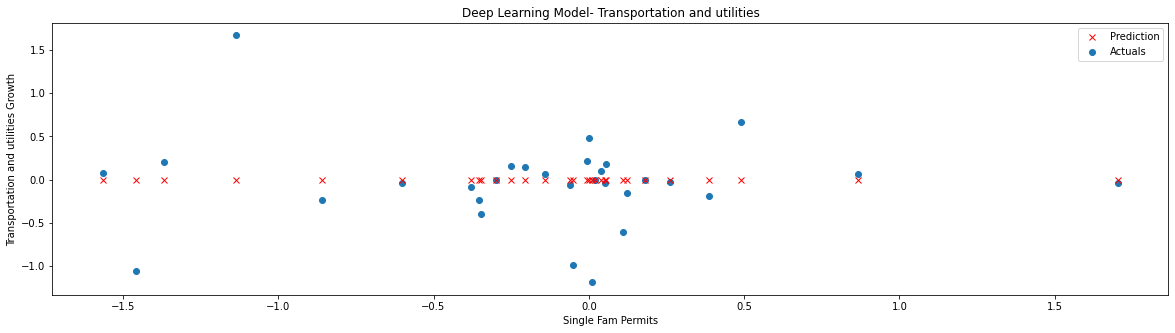

Train on 3861 samples
3861/3861 [==============================] - 0s 38us/sample - loss: 0.2562 - mae: 0.4770
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 83us/sample - loss: 65791.5104 - mae: 65791.5938 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.1284 - mae: 0.2687 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 39us/sample - loss: 0.0545 - mae: 0.1946 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0545 - mae: 0.1946 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.0545 - mae: 0.1946 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.0545 - mae: 0.1946 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

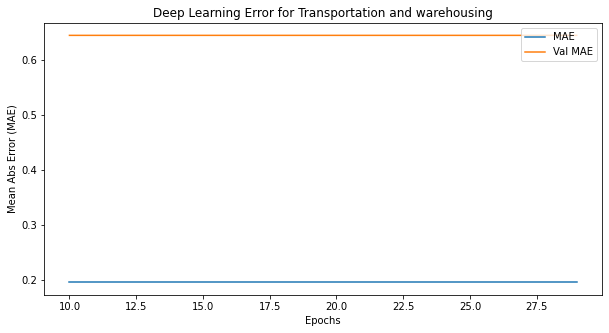

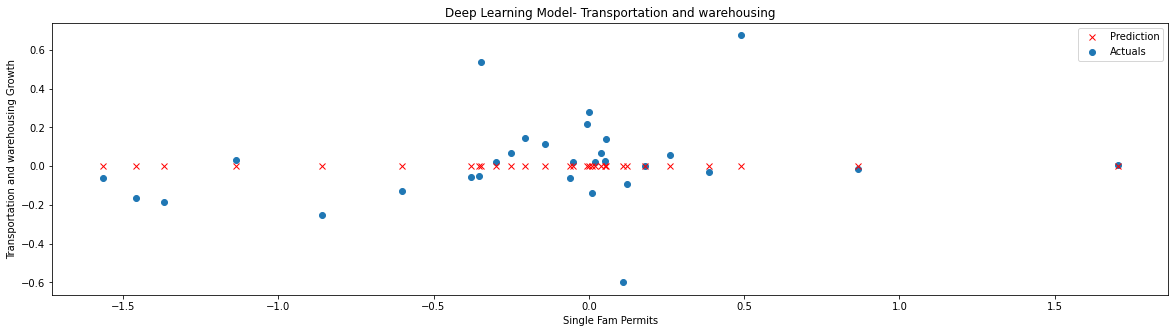

Train on 3861 samples
3861/3861 [==============================] - 0s 41us/sample - loss: 0.0560 - mae: 0.1954
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 81us/sample - loss: 71995.8147 - mae: 71996.0312 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.2197 - mae: 0.3750 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 34us/sample - loss: 0.2197 - mae: 0.3750 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.2197 - mae: 0.3750 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.2197 - mae: 0.3750 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 35us/sample - loss: 0.2197 - mae: 0.3750 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

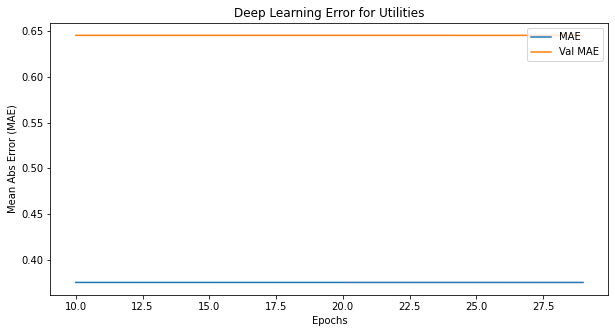

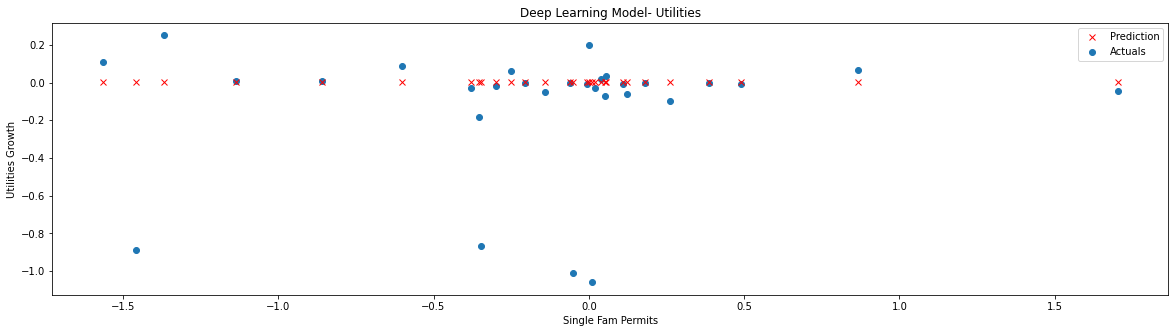

Train on 3861 samples
3861/3861 [==============================] - 0s 38us/sample - loss: 0.2096 - mae: 0.3644
Train on 3088 samples, validate on 773 samples
Epoch 1/30
3088/3088 [==============================] - 0s 86us/sample - loss: 64517.0728 - mae: 64517.3125 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 2/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0682 - mae: 0.2552 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 3/30
3088/3088 [==============================] - 0s 38us/sample - loss: 0.0682 - mae: 0.2551 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 4/30
3088/3088 [==============================] - 0s 36us/sample - loss: 0.0682 - mae: 0.2551 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 5/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0682 - mae: 0.2551 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 6/30
3088/3088 [==============================] - 0s 37us/sample - loss: 0.0682 - mae: 0.2551 - val_loss: 0.3891 - val_mae: 0.6455
Epoch 7/30
3

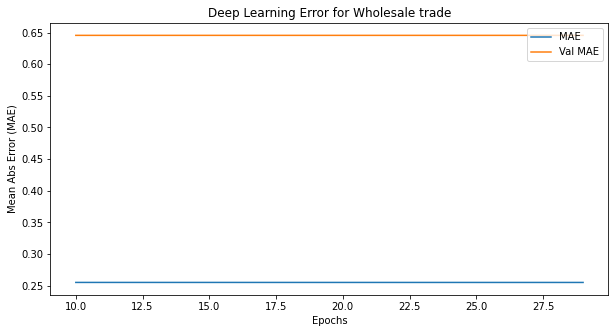

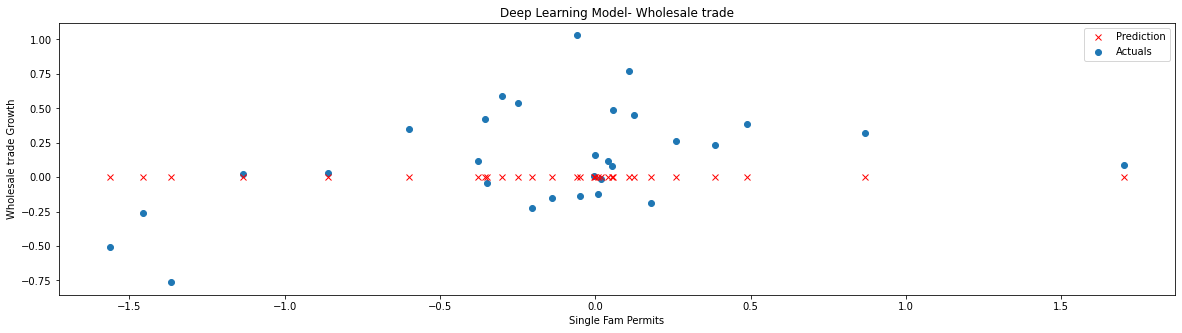

Train on 3861 samples
3861/3861 [==============================] - 0s 40us/sample - loss: 0.0675 - mae: 0.2540


In [129]:
################################################## DEEP NEURAL NETWORKS 

os.chdir(deep_learning_img)
df_train_label=df_train[label]
df_val_label=df_val[label]


var=var_pca
df_pred_dl=pd.DataFrame()
epoch=30

for label in var_bed:
  model = tf.keras.models.Sequential([
   # tf.keras.layers.LSTM(64, input_shape=(16,1),return_sequences=True),
   # tf.keras.layers.LSTM(32, return_sequences=True),
    #tf.keras.layers.GlobalAveragePooling1D(),
  #  tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation="relu",input_shape=(16,)),
  #  tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 400)
    ])

  optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])



  history = model.fit(df_train[var_pca],df_train[label],epochs=epoch,validation_data=(df_val[var_pca],df_val_label))
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(10,epoch),history.history["mae"][10:epoch],label="MAE") #######Plot only after epoch #5
  plt.plot(np.arange(10,epoch),history.history["val_mae"][10:epoch],label="Val MAE")
  plt.legend(loc="upper right")
  plt.title("Deep Learning Error for {}".format(label))
  plt.xlabel("Epochs")
  plt.ylabel("Mean Abs Error (MAE)")
  plt.savefig("{}.png".format(label))

    #'Total Construction Spending',
  plt_var='Construction'
  plt.figure(figsize=(20, 5))
  plt.title('Deep Learning Model- {}'.format(label))
  #plt.scatter(df_train[plt_var][0:30], df_train[label][0:30],label="Actuals")
 # plt.plot(df_train[plt_var][0:30], model.predict(df_train[var_pca][0:30]),'x',color='r',label="Prediction")
  plt.scatter(df_val[plt_var][0:30], df_val[label][0:30],label="Actuals")
  plt.plot(df_val[plt_var][0:30], model.predict(df_val[var_pca][0:30]),'x',color='r',label="Prediction")
  plt.xlabel("Single Fam Permits")
  plt.ylabel("{} Growth".format(label))
  plt.legend(loc="upper right")
  plt.savefig("Deep_Learning_predictions_{}.png".format(label))
  plt.show()
  model.fit(df_final_rand[var_pca],df_final_rand[label]) ######## fit the full dataset
  mod=model.predict(df_pca_test)
  df_pred_dl=pd.concat([df_pred_dl,pd.DataFrame(mod,columns=[label])],axis=1)


In [0]:
df_pred_dl_final=pd.concat([df_complete_pca_test.reset_index()[["Year","Geo (MSA)","State"]],df_pred_dl],axis=1)
df_pred_dl_final=df_pred_dl_final.sort_values(["Geo (MSA)","Year"])

os.chdir(base_dir)
df_pred_dl_final.to_csv("Deep_learning_predictions.csv",index=False)

In [121]:
df_pred_grad_boost_final
df_pred_lstm_final
df_pred_dl_final



Year         Geo (MSA)  ... Utilities  Wholesale trade
120  2019       Abilene, TX  ...  0.000012         0.000027
96   2020       Abilene, TX  ...  0.000012         0.000027
72   2021       Abilene, TX  ...  0.000012         0.000027
48   2022       Abilene, TX  ...  0.000012         0.000027
24   2023       Abilene, TX  ...  0.000012         0.000027
..    ...               ...  ...       ...              ...
535  2020  York-Hanover, PA  ...  0.000012         0.000027
519  2021  York-Hanover, PA  ...  0.000012         0.000027
503  2022  York-Hanover, PA  ...  0.000012         0.000027
487  2023  York-Hanover, PA  ...  0.000012         0.000027
471  2024  York-Hanover, PA  ...  0.000012         0.000027

[1782 rows x 37 columns]

In [122]:
df_complete["Year"].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006])

In [0]:
# Poisson regression code
import statsmodels.api as sm

#exog, endog = sm.add_constant(df_train_array), df_train_label
mod = sm.OLS(df_train_label,df_train_array).fit()

mod.summary()


NameError: ignored

In [0]:
####CREATE THE DATASET.  CLEAN. TRANSPOSE. FILTER DATASETS WITH OIL&GAS>20 MIL IN AT LEAST 9 YEARS OUT OF 16.
years=9 #Number of years 
amt=5

msa_files=pd.DataFrame()
for file in input_files:
    msa_file=pd.read_csv(file)
    keep_indices=[0,1,4,5,9,10,14,34,50,56,65,78]
    column_keep=["Description", "2001","2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']
    msa_file=msa_file[column_keep].iloc[keep_indices,:]
    msa_file_T=pd.DataFrame(msa_file.T[1:]).reset_index()
    msa_file_T=msa_file_T.rename(columns={"index":"Year",0:"All industries",1:"Private industries",4:"Forestry,fishing",5:"Oil_gas",9:"Utilities",
                                          10:"Manufacturing",14:"Non-metal miner manufac",34:"Retail",
                                          50:"Finance_Ins",56:"Real_estate",65:"Education",78:"Government"})*1
    for var in msa_file_T.columns:
        msa_file_T[var]=msa_file_T[var].replace("(D)",np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan)*1
        msa_file_T[var]=msa_file_T[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)
        #####CREATE AN INDICATOR IF THERE'S DATA IN OIL & GAS FIELD
        if var=="Oil_gas":
          msa_file_T["dset_keep"]=np.where(msa_file_T["Oil_gas"].astype('float')>amt,1,0) ###ONLY YEARS WITH $20 MILLION OUTPUT
        msa_file_T[var]=msa_file_T[var].fillna(method='ffill')
        msa_file_T[var]=msa_file_T[var].fillna(method='bfill')
        msa_file_T[var]=msa_file_T[var].replace(np.nan,0)
    #CREATE A FILTER WHERE THERE'S MORE THAN 9 YEARS OF DATA OUT OF 16 YEARS FOR OIL & GAS WITH $20 MILLION OUTPUT
    if msa_file_T["dset_keep"].astype('float').sum()>years:
      msa_files=pd.concat([msa_files,msa_file_T],axis=0)






In [0]:

msa_list=[]
for file in input_files:
  msa_list.append(file[7:])
os.chdir(base_dir)
msa_list=pd.DataFrame(msa_list)
msa_list.to_csv("MSA_list.csv")

os.chdir(msa_dir)

In [0]:
msa_files.shape
os.chdir(base_dir)
msa_files.to_excel("msa_files.xlsx")

os.chdir(msa_dir)

In [0]:
msa_files.columns

Index(['Year', 'All industries', 'Private industries', 'Forestry,fishing',
       'Oil_gas', 'Utilities', 'Manufacturing', 'Non-metal miner manufac',
       'Retail', 'Finance_Ins', 'Real_estate', 'Education', 'Government',
       'dset_keep'],
      dtype='object')

In [0]:

USA_file=USA_gdp[column_keep].iloc[0:3]
USA_file_T=USA_file.T[1:].reset_index()
USA_file_T=USA_file_T.rename(columns={"index":"Year",0:"GDP Growth",1:"All industries_USA",2:"Private industries_USA"})
print(USA_file_T)

    Year GDP Growth All industries_USA Private industries_USA
0   2001      -0.01          9551195.1              8381322.4
1   2002     0.0174          9872503.4              8632372.4
2   2003     0.0186         10346834.9              9037613.8
3   2004      0.038           11033711              9650075.6
4   2005      0.035         11793460.1             10342186.4
5   2006     0.0286         12488192.4             10966300.6
6   2007     0.0188         13058074.8             11453293.7
7   2008     -0.014         13233095.5             11555119.5
8   2009    -0.0207         12959750.1             11231707.8
9   2010     0.0256         13421681.4             11635874.4
10  2011     0.0155         13885695.4               12076405
11  2012     0.0255         14485166.1               12652793
12  2013     0.0184           14966839               13111140
13  2014     0.0245           15628087               13723928
14  2015     0.0288         16358497.6             14391365.4
15  2016

In [0]:
MSA_files_complete=USA_file_T.merge(msa_files,left_on="Year",right_on="Year").set_index("Year")
MSA_files_complete["GDP Growth"]=MSA_files_complete["GDP Growth"].replace("(","-").replace(")","")
MSA_files_complete=MSA_files_complete.astype('float')

In [0]:
MSA_files_complete.head

<bound method NDFrame.head of       GDP Growth  All industries_USA  ...  dset_keep  Recession_indicator
Year                                  ...                                
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        1.0                    1
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        1.0                    1
...          ...                 ...  ...        ...                  ...
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0

[2040 r

In [0]:
def feature_engineering(dset_in):
    dset_out=pd.DataFrame()
    for col in dset_in.columns:
        dset_out[col]=dset_in[col]
        dset_out[col+"_log"]=dset_in[col].apply(lambda x: np.log(x+1))
        dset_out[col+"_squared"]=dset_in[col].apply(lambda x: np.square(x+1))
    return dset_out


def percent_of_msa_econ(dset_in):
  dset_out=pd.DataFrame()
  for col in dset_in.columns:
    if col !="All industries":
      #dset_out[col]=dset_in[col]
      dset_out[col+"_pct"]=[dset_in[col].iloc[i]/dset_in["All industries"].iloc[i] for i in range(len(dset_in["All industries"]))]
  return dset_out.astype(float)


In [0]:
MSA_files_complete["Recession_indicator"]=0
recession_years=['2001','2008','2009']
"""for i in range(len(MSA_files_complete)):
    if MSA_files_complete["Year"].iloc[i] in recession_years:
        MSA_files_complete["Recession_indicator"].iloc[i]=1
    else:
        MSA_files_complete["Recession_indicator"].iloc[i]=0"""
MSA_files_complete["Recession_indicator"]=np.where(MSA_files_complete.index.isin(recession_years),1,0) ####Much faster than doing a loop
        
pred_var=["All industries","Private industries","Forestry,fishing","Oil_gas",'Non-metal miner manufac',"Utilities","Manufacturing","Retail","Finance_Ins","Real_estate","Education","Government"]
label_var=["Recession_indicator"]

df_var=MSA_files_complete[pred_var].astype(float)
df_label=MSA_files_complete[label_var]
####convert it to numeric matrix
df_var_features=feature_engineering(df_var)
df_var_mat=np.matrix(df_var_features,float)
df_label_mat=np.matrix(df_label,float)




In [0]:
len(df_var_features.columns)

36

In [0]:
print(MSA_files_complete.head())

      GDP Growth  All industries_USA  ...  dset_keep  Recession_indicator
Year                                  ...                                
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        1.0                    1
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        1.0                    1

[5 rows x 17 columns]


In [0]:
#####Sklearn doesn't return p-values of coefficients
from sklearn.linear_model import LogisticRegression
import sklearn.feature_selection
clf=LogisticRegression(random_state=0,solver='lbfgs').fit(df_var,df_label)
p_value=sklearn.feature_selection.f_regression(df_var,df_label)
clf.coef_



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.19132447e-04,  1.65104967e-04, -5.16736789e-04,
        -1.72669383e-04, -8.15980396e-04,  9.55167246e-05,
         6.37646245e-04, -2.05086771e-03,  3.67783229e-04,
         2.09203530e-04, -2.50417565e-04,  6.41444836e-05]])

In [0]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model


discrete_model.Logit(df_label_mat,df_var_mat)
results=sm.Logit(df_label_mat,df_var_mat)
results_f=results.fit()
print(results_f.summary())

Optimization terminated successfully.
         Current function value: 0.448014
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2005
Method:                           MLE   Df Model:                           34
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.03860
Time:                        15:54:48   Log-Likelihood:                -913.95
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                 0.0001030
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0032      0.002     -1.611      0.107      -0.007       0.001
x2            -1.8172      1.

In [0]:
###########CORRELATION BETWEEN INDIVIDUAL INDUSTRIES & ALL INDUSTRIES
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt



In [0]:
######################################Percent of Industry in Economy

df_var_pct=percent_of_msa_econ(df_var)
df_var_pct_mat=np.matrix(df_var_pct,"float")



for i in df_var_pct.columns:
  print(i," =",pearsonr(df_var_pct[i],MSA_files_complete["All industries_USA"]))

Private industries_pct  = (0.07857607971012692, 0.0003818596064877735)
Forestry,fishing_pct  = (0.03587423931726527, 0.10526728617437976)
Oil_gas_pct  = (0.02724675517189615, 0.21865561114826834)
Non-metal miner manufac_pct  = (-0.07716121604880719, 0.0004863635416020818)
Utilities_pct  = (-0.032022712426295, 0.14822387315109725)
Manufacturing_pct  = (-0.3299386510953362, 5.275678246587498e-53)
Retail_pct  = (-0.045056924159328195, 0.04186664284876076)
Finance_Ins_pct  = (0.014912346121684825, 0.5008448783076218)
Real_estate_pct  = (0.013942160058176493, 0.5291125927832199)
Education_pct  = (0.001079475244547311, 0.9611375778615656)
Government_pct  = (-0.08229962918802992, 0.00019827031834943032)


In [0]:
################CORRELATION BETWEEN INDUSTRY PERCENTAGE OF MSA'S ECONOMY AND USA GDP GROWTH
for i in df_var_pct.columns:
  print(i," =",pearsonr(df_var_pct[i],MSA_files_complete["GDP Growth"]))

Private industries_pct  = (0.03214352496516699, 0.14669880332275434)
Forestry,fishing_pct  = (0.007664066073518147, 0.7293796338339895)
Oil_gas_pct  = (-0.009735010845500335, 0.6603457102761396)
Non-metal miner manufac_pct  = (0.0019329586461899484, 0.9304717828892327)
Utilities_pct  = (-0.00822217687775451, 0.7105299450089176)
Manufacturing_pct  = (0.001562047391223188, 0.9437887014256673)
Retail_pct  = (0.0573875713852562, 0.009527130742256171)
Finance_Ins_pct  = (0.01591392031371679, 0.4725237675937108)
Real_estate_pct  = (0.006526605923455836, 0.7682952701574847)
Education_pct  = (-0.009094727081901418, 0.6814154206563484)
Government_pct  = (-0.0327595032423046, 0.1391088920369939)


In [0]:
results_pct=sm.Logit(df_label_mat,df_var_pct_mat)
results_pct_f=results_pct.fit()
print(results_pct_f.summary())

Optimization terminated successfully.
         Current function value: 0.459813
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2029
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.01328
Time:                        15:56:28   Log-Likelihood:                -938.02
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                  0.004908
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6146      0.422     -3.827      0.000      -2.441      -0.788
x2            -2.7214      6.

In [0]:
df_oilgas_pct=feature_engineering(df_var_pct[["Oil_gas_pct","Retail_pct","Education_pct","Utilities_pct"]])
df_oil_gas_pct_mat=np.matrix(df_oilgas_pct,"float")



print(df_oilgas_pct.head())


   Oil_gas_pct  Oil_gas_pct_log  ...  Utilities_pct_log  Utilities_pct_squared
0     0.066650         0.064523  ...           0.021814               1.044593
1     0.208344         0.189251  ...           0.011113               1.022475
2     0.003812         0.003805  ...           0.012296               1.024897
3     0.005928         0.005911  ...           0.001218               1.002439
4     0.003807         0.003800  ...           0.015456               1.031394

[5 rows x 12 columns]


In [0]:
results_oil_gas_pct=sm.Logit(df_label_mat,df_oil_gas_pct_mat[:,:6])
results_oil_gas_pct_f=results_oil_gas_pct.fit()
print(results_oil_gas_pct_f.summary())

Optimization terminated successfully.
         Current function value: 0.464881
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2034
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                0.002399
Time:                        15:56:28   Log-Likelihood:                -948.36
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                    0.4717
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            90.7359    156.583      0.579      0.562    -216.160     397.632
x2           -58.0405     97.

In [0]:
from matplotlib import pyplot as plt

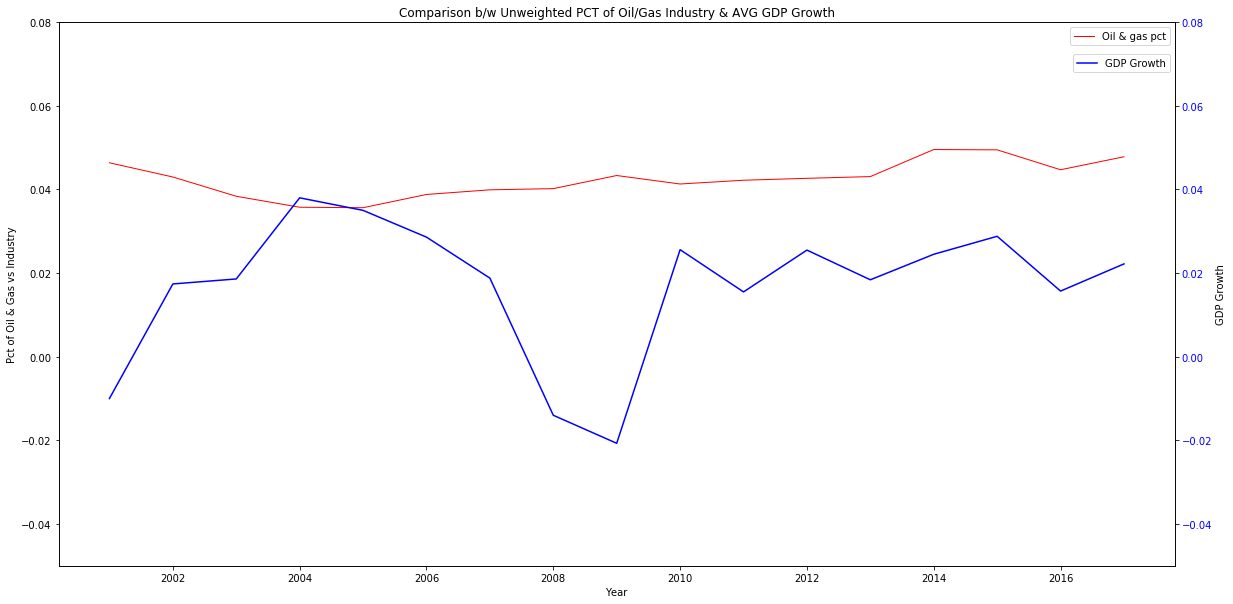

In [0]:
color = 'red'
fig1=df_var_pct["Oil_gas_pct"].groupby(df_var.index).mean()
fig2=MSA_files_complete["GDP Growth"].groupby(MSA_files_complete.index).mean()

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(2001,2018),fig1,color=color,linewidth=1.0,label='Oil & gas pct')
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
color2='blue'
ax2.plot(np.arange(2001,2018),fig2,color=color2,label='GDP Growth')
ax2.tick_params(axis='y', labelcolor=color2)
plt.title("Comparison b/w Unweighted PCT of Oil/Gas Industry & AVG GDP Growth")
ax1.set_ylabel("Pct of Oil & Gas vs Industry")
ax2.set_ylabel("GDP Growth")
ax1.legend(bbox_to_anchor = [1, 1])
ax2.legend(bbox_to_anchor = [1, .95])

ax1.set_ylim([-.05,.08])
ax2.set_ylim([-.05,.08])
plt.show()

In [0]:
wm = lambda x: np.average(x, weights=df_var_pct.loc[x.index.unique(),"Oil_gas"])

# Define a dictionary with the functions to apply for a given column:
f = { 'Oil_gas_pct': {'weighted_mean' : wm} }

# Groupby and aggregate with your dictionary:
fig1=df_var_pct.groupby(df_var_pct.index).agg(f)
fig2=MSA_files_complete["GDP Growth"].groupby(MSA_files_complete.index).mean()

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(2001,2018),fig1,color=color,linewidth=1.0,label="Weighted Oil & Gas Pct ")
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
color2='blue'
ax2.plot(np.arange(2001,2018),fig2,color=color2,label="GDP Growth")
plt.title("Comparison b/w Weighted PCT of Oil/Gas Industry & AVG GDP Growth")
ax1.set_ylabel("Pct of Oil & Gas vs Industry")
ax2.set_ylabel("GDP Growth")
ax1.legend(bbox_to_anchor = [1, 1])
ax2.legend(bbox_to_anchor = [1, .95])

ax2.set_ylim([-.05,.08])

plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


KeyError: ignored

In [0]:
for i in fig1.columns:
  print(pearsonr(fig1[i],fig2))

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [0]:
df_var_pct